In [2]:
#plot&calc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.ticker as ticker

#import Library_figure as PRM_figure

import scipy
import scipy.optimize as optimize
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

#pickle
import pickle

#ファイル管理系
import os
import glob

def make_dirs(path):
    try:
        os.makedirs(path)
        print("Correctly make dirs")
    except:
        print("Already exist or fail to make dirs")
        
def std_mean(t):
    value_return = np.sqrt(np.average((t)**2))
    return value_return
def score_mean(t):
    value_return = np.average(t)
    return value_return

plt.rcParams["font.size"] = 25
plt.rcParams['font.sans-serif'] = ['Arial']

In [9]:
Algorithm_name="NGBoost"
glob.glob("0_PRM_Model_Folder/"+ Algorithm_name +"/**")
Model_name='2023-11-26_Normal_NGBoost_Mincomb_4_ALL'
model_path = "0_PRM_Model_Folder/"+ Algorithm_name +"/" + Model_name ###### DEFINE Model path
folder_input_variation_name = glob.glob(model_path+"/**")
folder_input_variation_name[1]

glob.glob(folder_input_variation_name[1]+"/**")


["0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Al2O3",
 "0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Na2O",
 "0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/CaO",
 "0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Yb",
 "0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Pb",
 "0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/U",
 "0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/P2O5",
 "0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/MgO",
 "0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Sr",
 "0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/SiO2",
 "0_PRM_Model_Folder/NGBoost/2023-11-26_

In [12]:
model_path

'0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL'

In [30]:
#解釈するModelを選択
path = folder_input_variation_name[1] 
now_figure_path = path+'/Model_explain'
make_dirs(now_figure_path)

#elementを定義
immobile_elem = ["Zr", "Th", "Ti", "Nb"]
elem_all = ['Rb', 'Ba', 'Th', 'U', 'Nb', 'K', 'La', 'Ce', 'Pb', 'Sr', 'Nd', 'Ti', 'Y', 'Yb', "Lu"]#, 'SiO2', 'Al2O3', 'MgO', 'Na2O', 'P2O5', 'CaO', 'MnO', 'FeO', 'K2O']
#elem_all = ["Zr", "Th", "Ti", "Nb", 'SiO2', 'Al2O3', 'MgO', 'Na2O', 'P2O5', 'CaO', 'MnO', 'FeO', 'K2O']
mobile_elem_all = ['Rb', 'Ba', 'U', 'K', 'La', 'Ce', 'Pb', 'Sr', 'Nd', 'Y', 'Yb', 'Lu',] 
#mobile_elem_all = ['SiO2', 'Al2O3', 'MgO', 'Na2O', 'P2O5', 'CaO', 'MnO', 'FeO', 'K2O'] 
trace_all= ['Rb', 'Ba', 'Th', 'U', 'Nb', 'K', 'La', 'Ce', 'Pb', 'Sr', 'Nd', 'Ti', 'Y', 'Yb', "Lu"]

#Location dataのロード
Raw_Protolith_location = pd.read_excel(model_path+"/Protolith/Location_Ref_Data.xlsx", index_col=0)

#順番の定義 order
TECTONIC_replace = {
    'SPREADING_CENTER':"MORB",
    'OCEAN_ISLAND':"OIB", 
    'VOLCANIC_ARC':"VAB",
}
TECTONIC_replace_num = {
    'SPREADING_CENTER':"0",
    'OCEAN_ISLAND':"1", 
    'VOLCANIC_ARC':"2",
}
TECTONIC_list = ["OIB", "MORB", "VAB"]
c_list = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]

#normalizeのためのデータをread
for_normalize_data = pd.read_excel("List/Primitive_Mantle _ C1 Chondrite.xlsx", index_col=0, header=0).loc['PM(SM89)']#[trace_all]
normalized_element = for_normalize_data.dropna().index[1:]

Already exist or fail to make dirs


Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Rb
Rb
(593, 11)
(192,)
(300,)
(101,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Ba
Ba
(608, 11)
(204,)
(310,)
(94,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/U
U
(572, 11)
(162,)
(297,)
(113,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/K
K
(630, 11)
(202,)
(314,)
(114,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/La
La
(615, 11)
(203,)
(310,)
(102,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Ce
Ce
(597, 11)
(194,)
(296,)
(107,)
Already exist or fail to make dirs
0_PRM_Mode

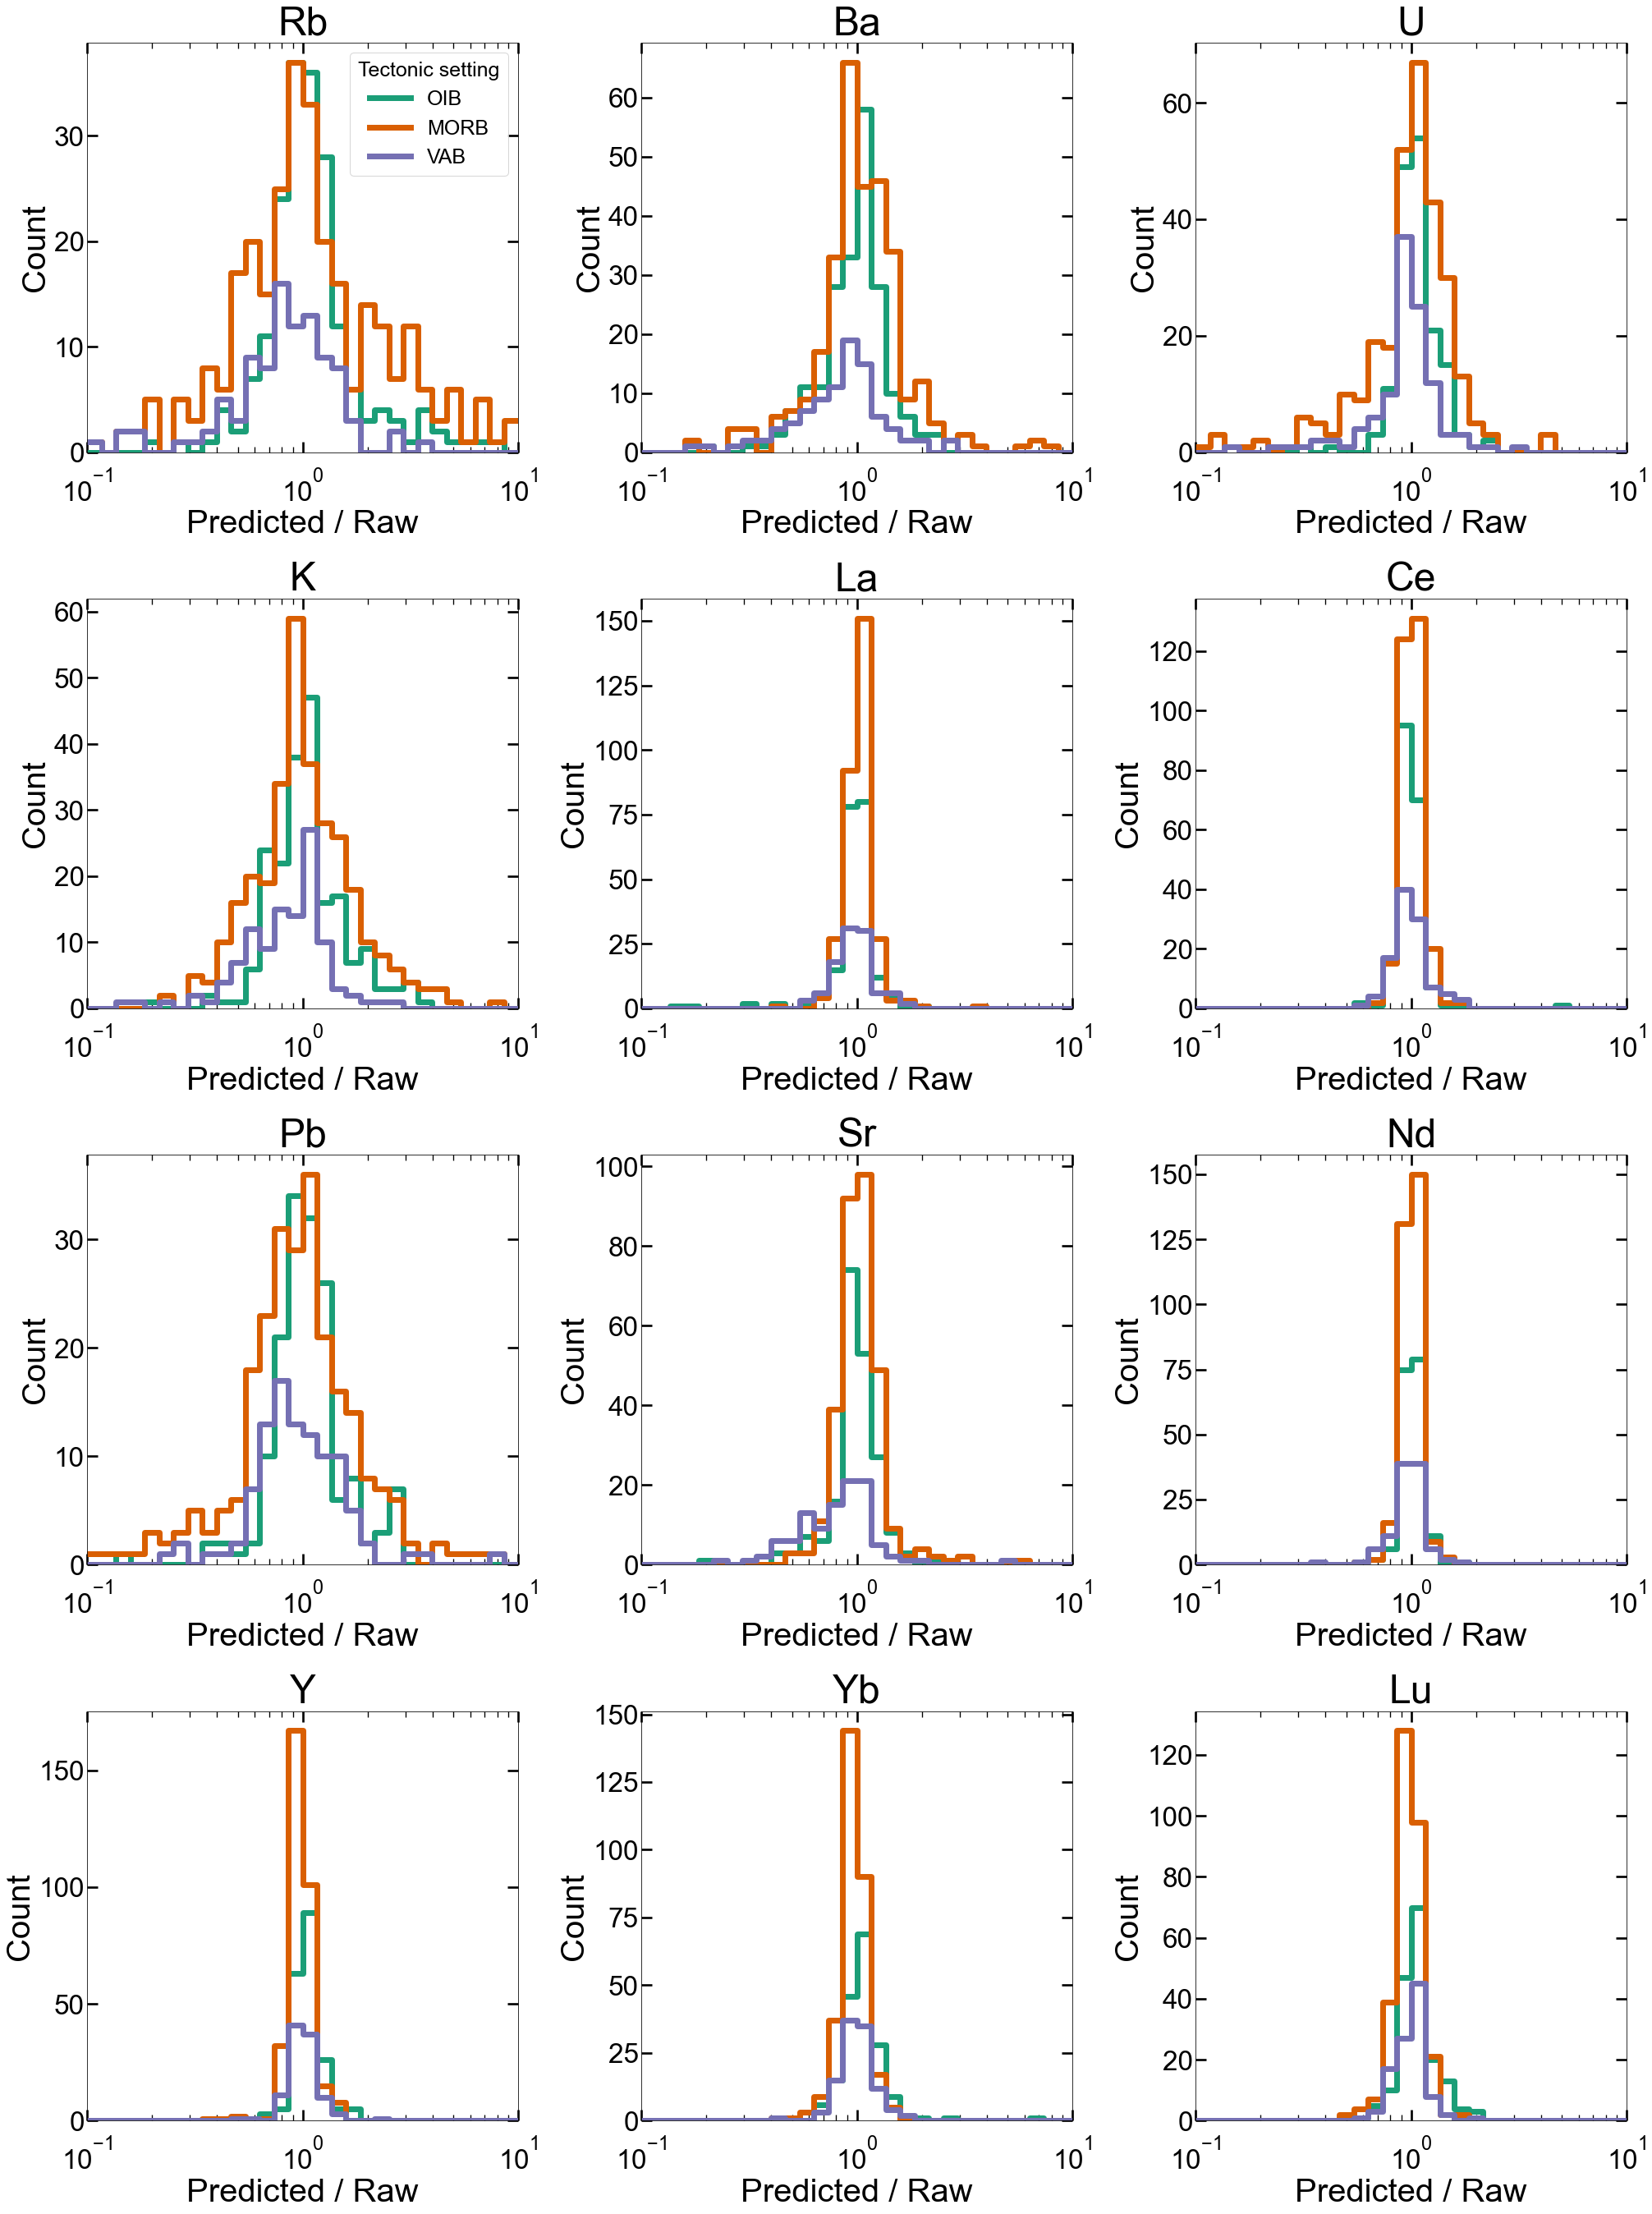

Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Rb
Rb
(593, 11)
(192,)
(300,)
(101,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Ba
Ba
(608, 11)
(204,)
(310,)
(94,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/U
U
(572, 11)
(162,)
(297,)
(113,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/K
K
(630, 11)
(202,)
(314,)
(114,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/La
La
(615, 11)
(203,)
(310,)
(102,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Ce
Ce
(597, 11)
(194,)
(296,)
(107,)
Already exist or fail to make dirs
0_PRM_Mode

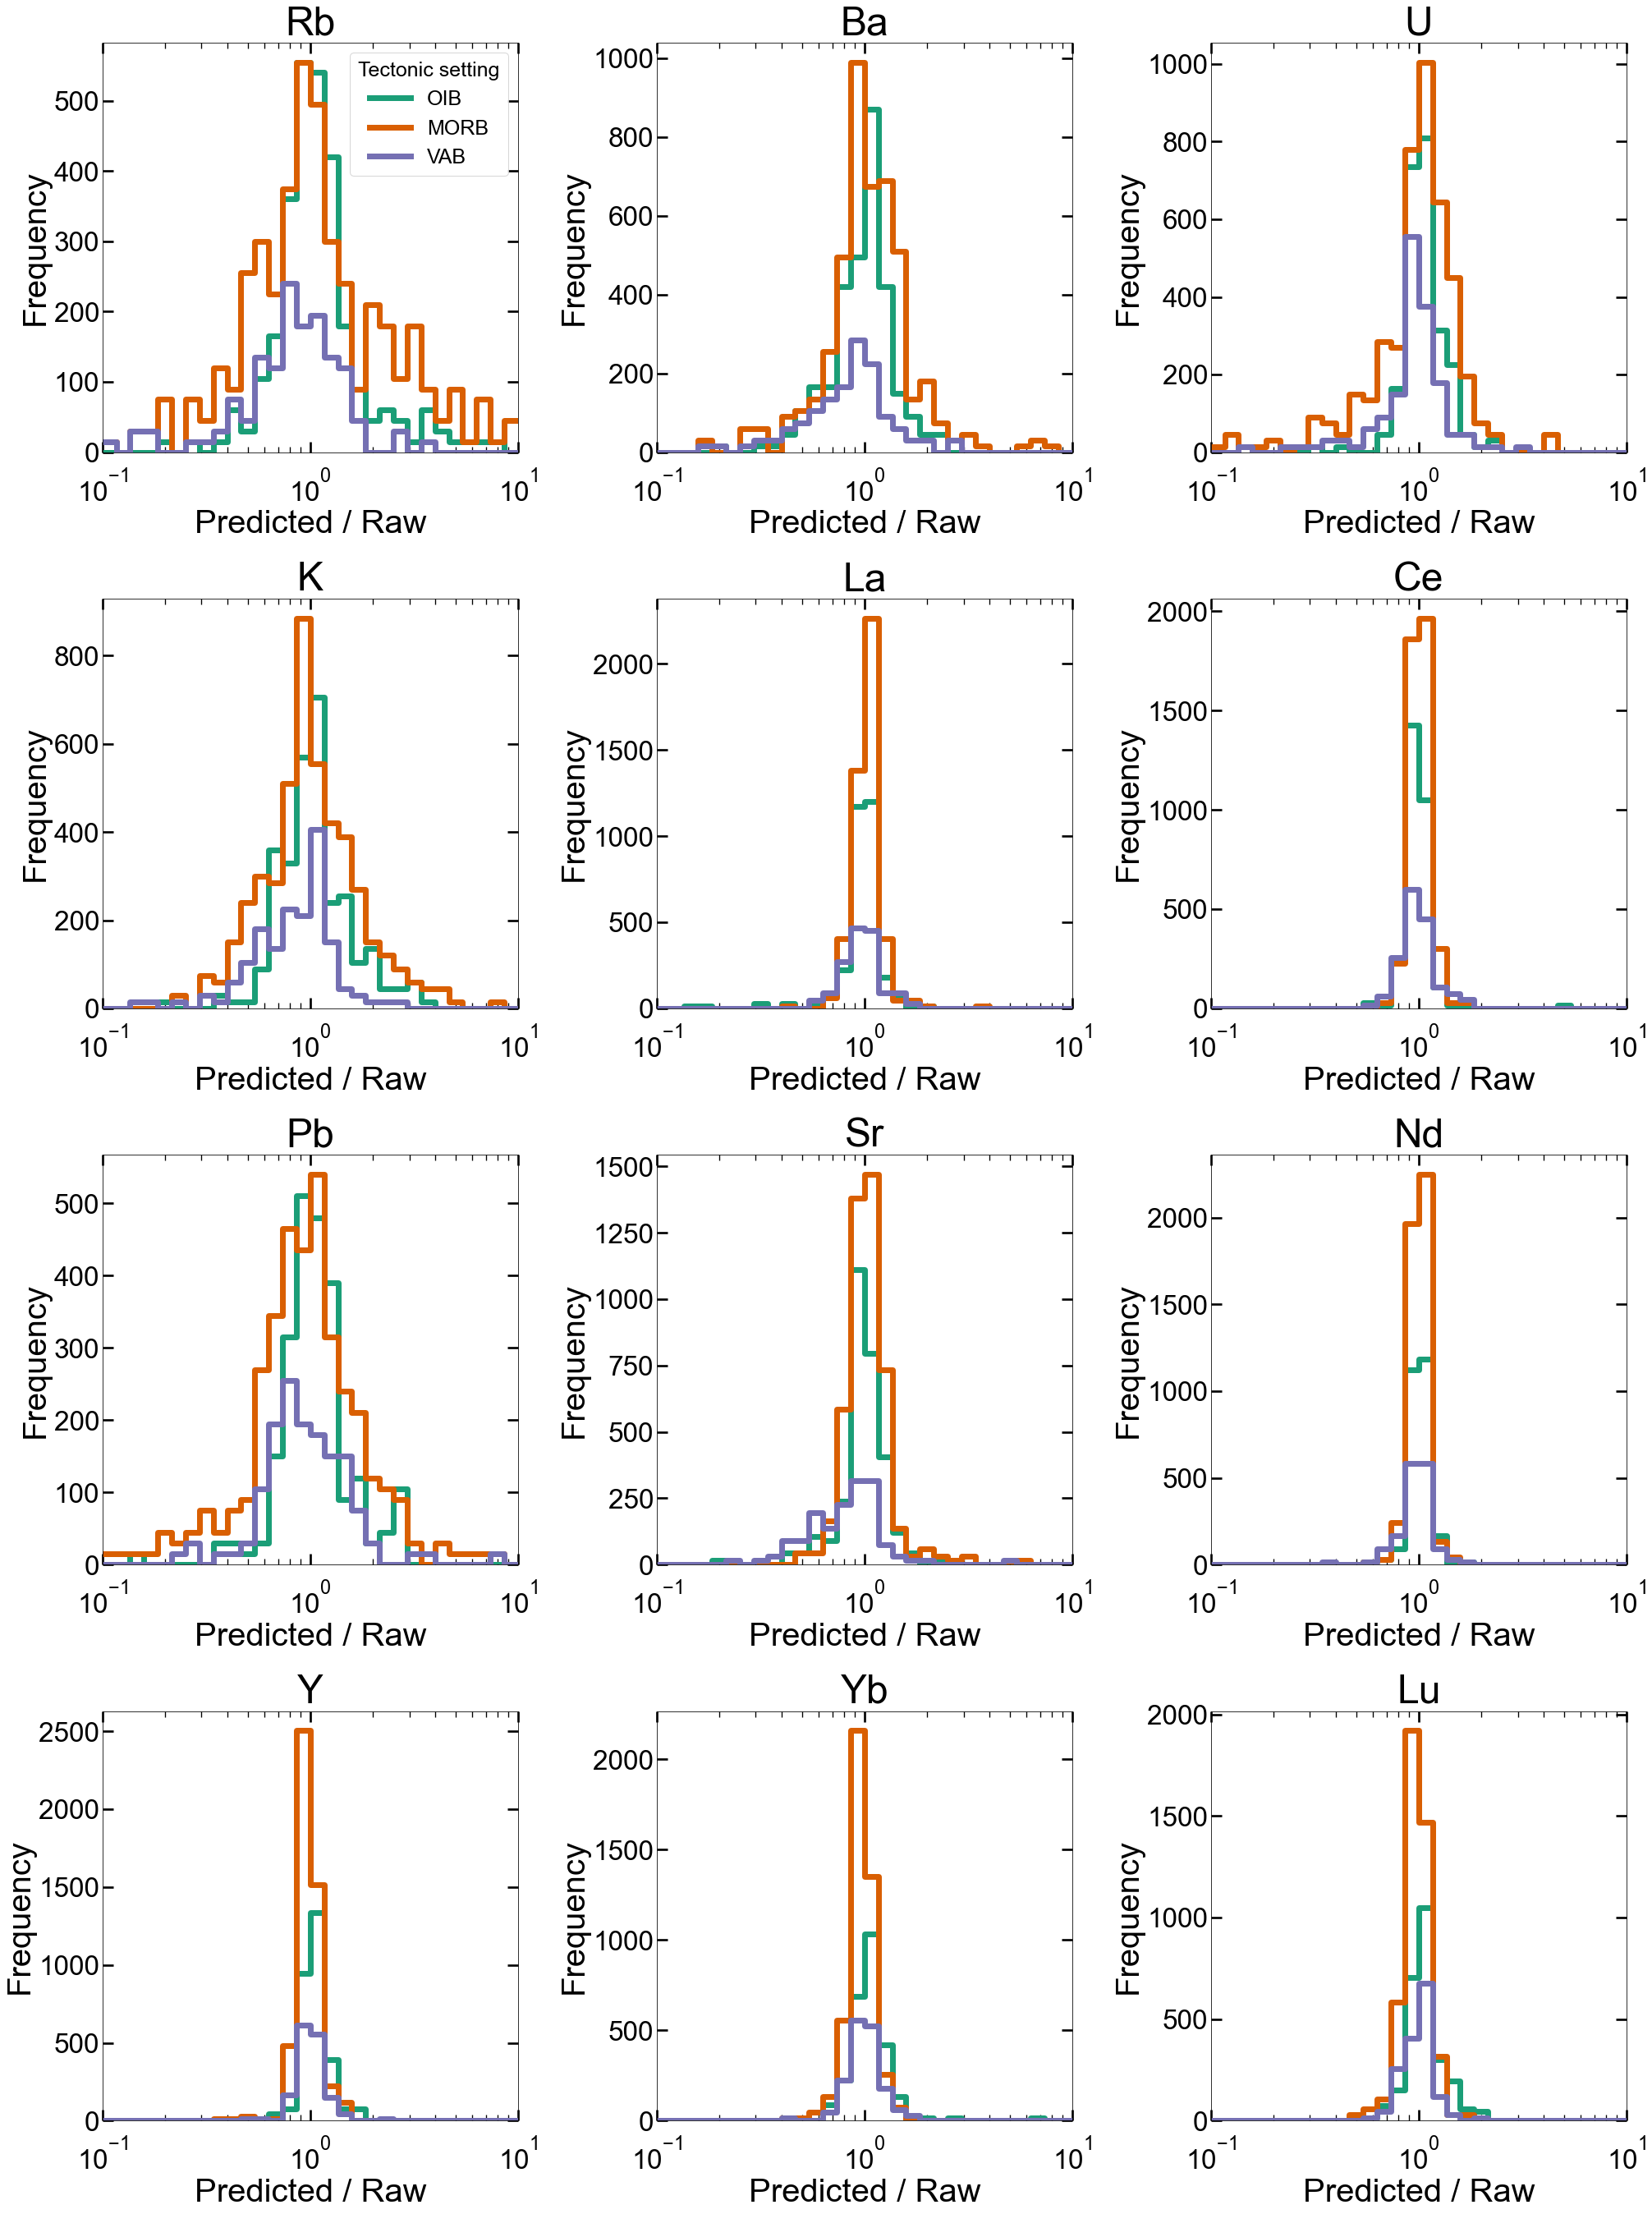

Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Rb
Rb
(593, 11)
(192,)
(300,)
(101,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Ba
Ba
(608, 11)
(204,)
(310,)
(94,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/U
U
(572, 11)
(162,)
(297,)
(113,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/K
K
(630, 11)
(202,)
(314,)
(114,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/La
La
(615, 11)
(203,)
(310,)
(102,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Ce
Ce
(597, 11)
(194,)
(296,)
(107,)
Already exist or fail to make dirs
0_PRM_Mode

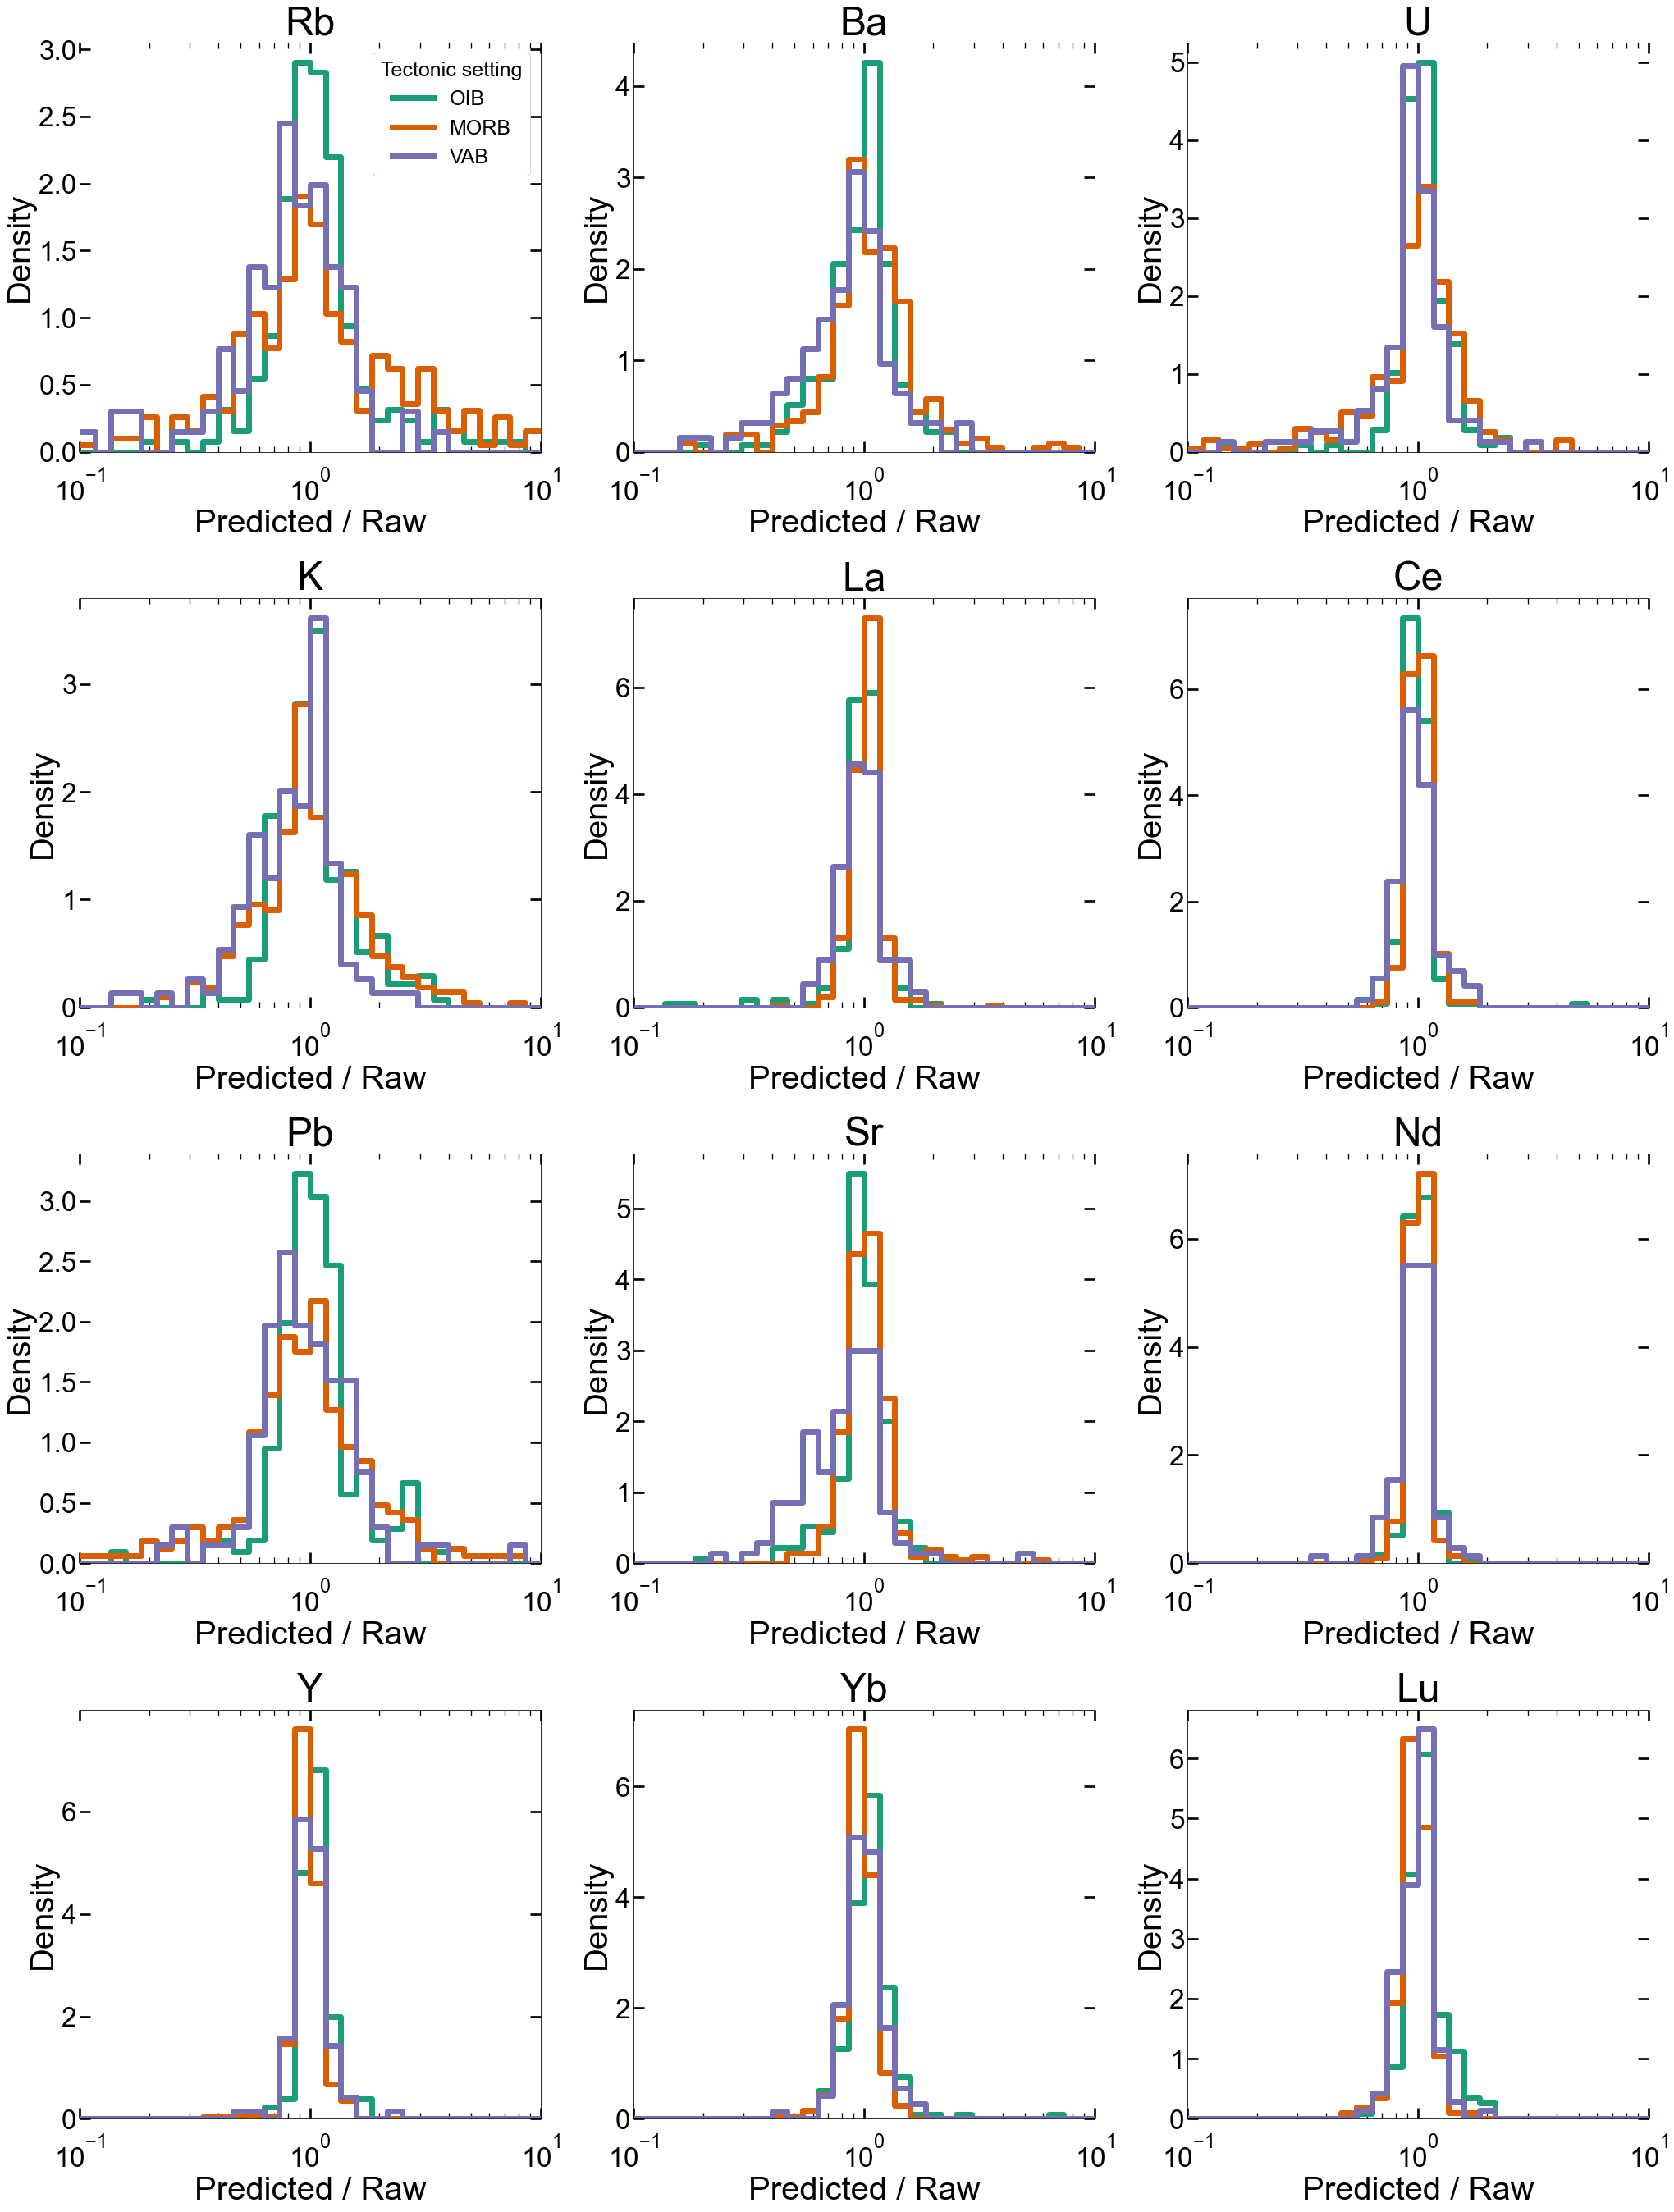

Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Rb
Rb
(593, 11)
(192,)
(300,)
(101,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Ba
Ba
(608, 11)
(204,)
(310,)
(94,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/U
U
(572, 11)
(162,)
(297,)
(113,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/K
K
(630, 11)
(202,)
(314,)
(114,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/La
La
(615, 11)
(203,)
(310,)
(102,)
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Ce
Ce
(597, 11)
(194,)
(296,)
(107,)
Already exist or fail to make dirs
0_PRM_Mode

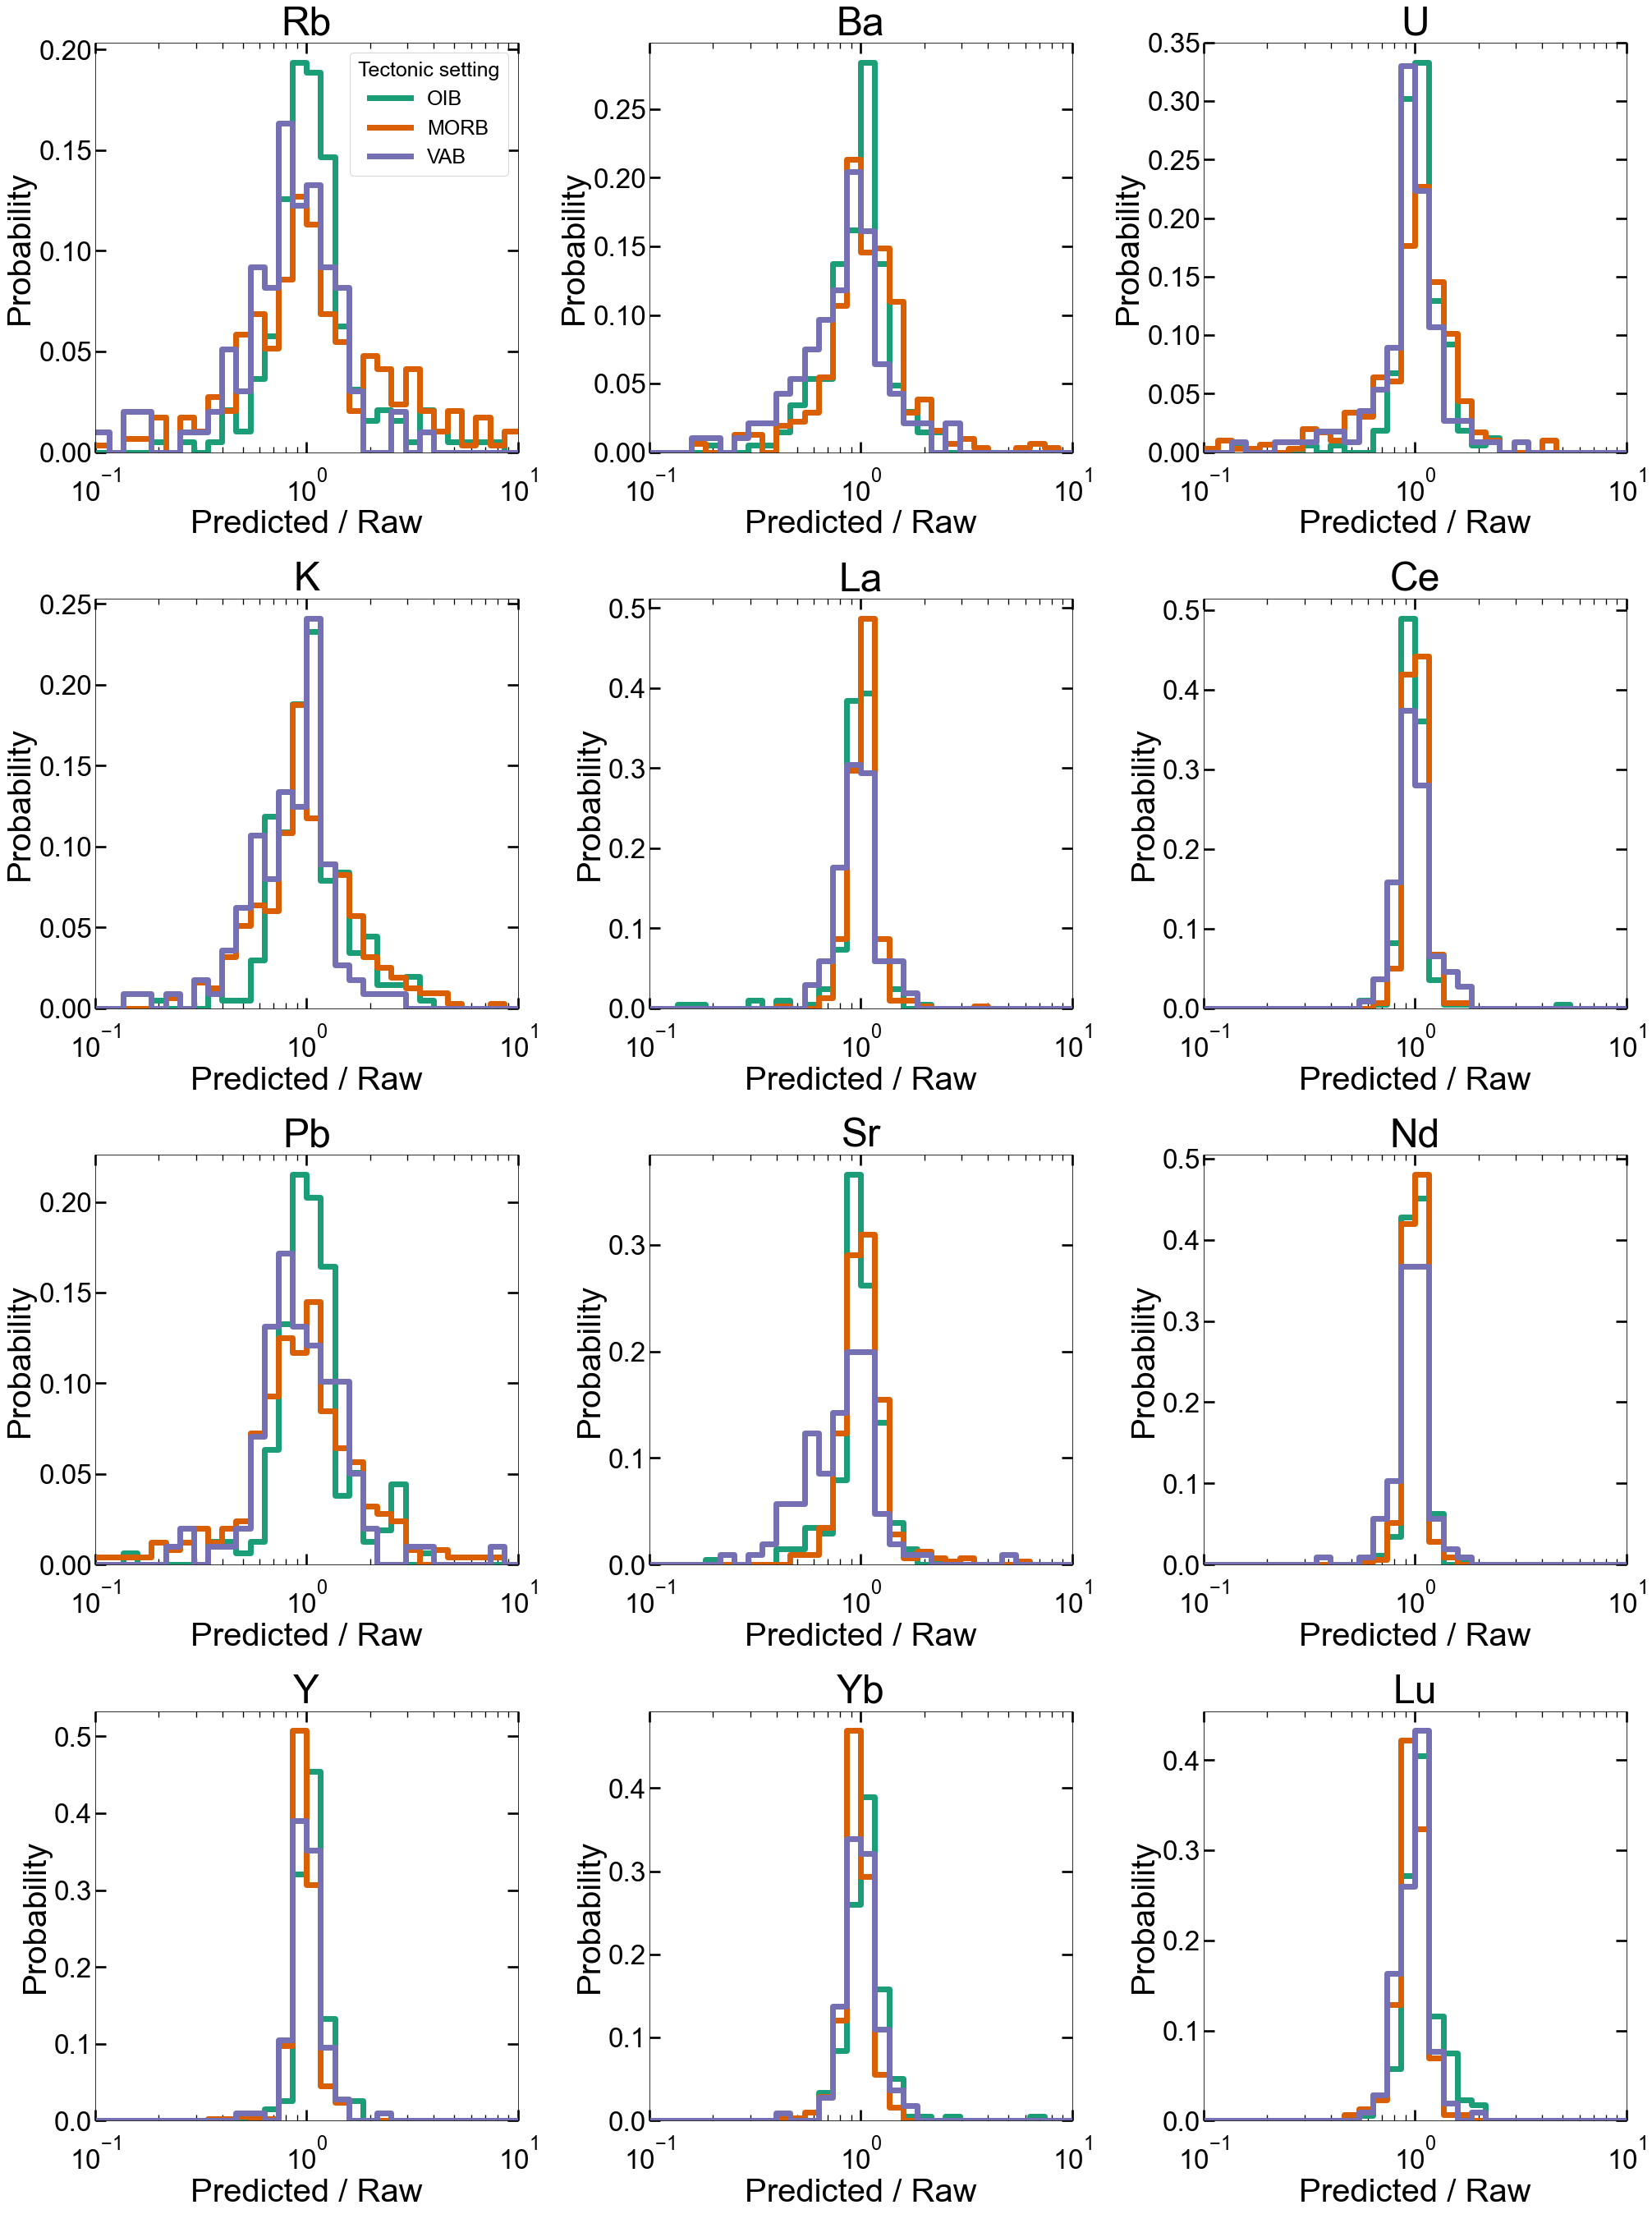

In [33]:
Error_Distribution_Figure(path, mobile_elem_all, good_range_elem, TECTONIC_list)

In [32]:
def Error_Distribution_Figure(path, mobile_elem_all, good_range_elem, TECTONIC_list):

    ################ fig setting
    # 表示するタイプ
    hist_family = ['count', 'frequency', 'density', 'probability']
    hist_family_label = ['Count', 'Frequency', 'Density', 'Probability']

    num_first = -1
    num = num_first

    # 表示の形を決める
    len_elem = len(mobile_elem_all)
    ncols = 3 # 選べる様にする
    nrows = len_elem//4 +1

    figsize_num = 9.5
    figsize=(ncols*figsize_num, nrows*figsize_num)
    font_size_label = 40
    ############### fig setting

    ################################################################ # hist name を変えてForループ
    for hist_name, hist_name_label in zip(hist_family, hist_family_label):
        #figureの形と数
        num = num + 1
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

        ##################################figure location listの作成
        loc_list = []
        loc_rows = -1
        for num in range(len(mobile_elem_all)):
            loc_cols = num%ncols
            if loc_cols == 0:
                loc_rows=loc_rows+1
            loc_list.append([loc_rows, loc_cols])
        ##################################figure location listの作成

        ###########移動元素ごとのスコアを求める
        for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
            # ax
            ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
            now_path = path+'/'+define_mobile_elem
            now_figure_path = path+'/5.model_explain'
            make_dirs(now_figure_path)
            print(now_path)
            print(define_mobile_elem)
            if define_mobile_elem in normalized_element :
                data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) * for_normalize_data[define_mobile_elem] ## mobile elemでPM→ppmに戻す
            data['Error'] = data['predict'] / data['RAW']
            data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
            data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)

            # 相関係数を求める
            corr_each_elem = data[['RAW', 'predict']].apply(lambda x : np.log10(x)).corr().loc['RAW']['predict']

            ################################################################ Setting
            #元素によって範囲を変更 histgram
            if define_mobile_elem in good_range_elem:
                binrange_x = [0.1, 10]
                binrange_sns = [-1, 1]# log表記
                set_xticks = [0.1, 1.0, 10.0]
            else:
                binrange_x = [0.1, 10]
                binrange_sns = [-1, 1]# log表記
                set_xticks = [0.1, 1.0, 10.0]
            # only Rb display legend
            legend_flag = False
            if define_mobile_elem == 'Rb':
                legend_flag = True
            ################################################################ Setting
            ################################################################ PLOT
            print(data.shape)
            #plt.figure(figsize=(10, 10))

            for tec_setting in TECTONIC_list:
                index = data[data['Tectonic setting'] == tec_setting].index
                print(index.shape)
                sns.histplot(data = data.loc[index], x='Error', hue = 'Tectonic setting', log_scale=True, stat=hist_name,\
                            hue_order=TECTONIC_list, palette='Dark2', element='step', fill=False, linewidth=7, legend=legend_flag, bins=30, binrange=binrange_sns, ax=ax)

            # Setting
            ax.set_xlabel('Predicted / Raw', fontsize=font_size_label)
            ax.set_ylabel(hist_name_label, fontsize=font_size_label)
            ax.set_xlim(binrange_x)
            ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
            ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
            ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
            ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
            ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
            ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
            ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
            ax.get_xaxis().set_tick_params(pad=font_size_label/2)
            ax.xaxis.set_ticks(set_xticks)
        plt.tight_layout()
        plt.savefig(now_figure_path+'/0_test_error_distribution_' + hist_name + '.pdf', bbox_inches='tight')
        plt.show()
    ######################

### Usual scatter plot

In [39]:
def Usual_Scatter_Plot(path, mobile_elem_all, good_range_elem, TECTONIC_list):

    ################ fig setting
    num_first = -1
    num = num_first

    # 表示の形を決める
    len_elem = len(mobile_elem_all)
    ncols = 3 # 選べる様にする
    nrows = len_elem//4 +1

    figsize_num = 9.5
    figsize=(ncols*figsize_num, nrows*figsize_num)
    font_size_label = 40
    ############### fig setting

    ###################################################################################### #scatter
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ### corr^2
    corr_compile = pd.DataFrame(index=['R2_score'], columns=mobile_elem_all)
    ##################################figure location listの作成
    loc_list = []
    loc_rows = -1
    for num in range(len(mobile_elem_all)):
        loc_cols = num%ncols
        if loc_cols == 0:
            loc_rows=loc_rows+1
        loc_list.append([loc_rows, loc_cols])
    ##################################figure location listの作成

    ###########移動元素ごとのスコアを求める
    for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
        # ax
        ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
        now_path = path+'/'+define_mobile_elem
        now_figure_path = path+'/Model_explain'
        make_dirs(now_figure_path)
        print(now_path)
        print(define_mobile_elem)
        data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 

        if define_mobile_elem in trace_all:
            data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
        data['Error'] = data['predict'] / data['RAW']
        data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
        data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)

        # 相関係数を求める
        corr_each_elem = r2_score(data['RAW'].apply(lambda x : np.log10(x)), data['predict'].apply(lambda x : np.log10(x)))
        corr_compile.loc['R2_score',define_mobile_elem]=corr_each_elem*corr_each_elem
        print(corr_compile.loc['R2_score',define_mobile_elem])
        ################################################################ Setting
        legend_flag = False
        if define_mobile_elem == 'Rb':
            #legend_flag = True
            legend_flag = False
        ################################################################ Setting

        ################################################################ # scatter plot
        min = np.log10(data['RAW'].min()) - 0.3
        max = np.log10(data['RAW'].max()) + 0.3
        # -5～5まで1刻みのデータを作成
        x = np.arange(10**min, 10**max)
        # 直線の式を定義
        y = x
        ax.plot(x,y, linestyle = ":", c = '#63b9af')

        sns.scatterplot(data=data, x='RAW', y='predict', hue='Tectonic setting',\
                           hue_order=TECTONIC_list, palette='Dark2', style='Tectonic setting', s=200, alpha=1, edgecolor="none", legend=legend_flag, ax=ax)
        ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
        ax.set_xlabel('Raw [ppm]', fontsize=font_size_label)
        ax.set_ylabel('Predicted [ppm]', fontsize=font_size_label)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
        ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
        ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
        ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
        ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
        ax.get_xaxis().set_tick_params(pad=font_size_label/2)

        ax.text(0.95, 0.05, 'R={:.3f}'.format(corr_each_elem), horizontalalignment='right', transform=ax.transAxes, fontsize = 50)

    plt.tight_layout()
    plt.savefig(now_figure_path+'/0_raw_vs_predict.pdf', bbox_inches='tight')
    plt.show()

    ##output corr
    corr_compile.to_excel(now_figure_path+'/0_corr_compile.xlsx')
    display(corr_compile)
    ######################################################################################## #scatter

In [46]:
Raw_Protolith_location["SAMPLE_INFO"].unique()

array(['SPREADING_CENTER', 'OCEAN_ISLAND', 'VOLCANIC_ARC'], dtype=object)

### Scatter plot with STD

Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Rb
Rb
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Ba
Ba
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/U
U
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/K
K
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/La
La
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Ce
Ce
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL/Zr', 'Th', 'Ti', 'Nb/Pb
Pb
Already exist or fail to make dirs
0_PRM_Model_Folder/NGBoost/2023-11-26_Normal_NGBoost_Mincomb_4_ALL

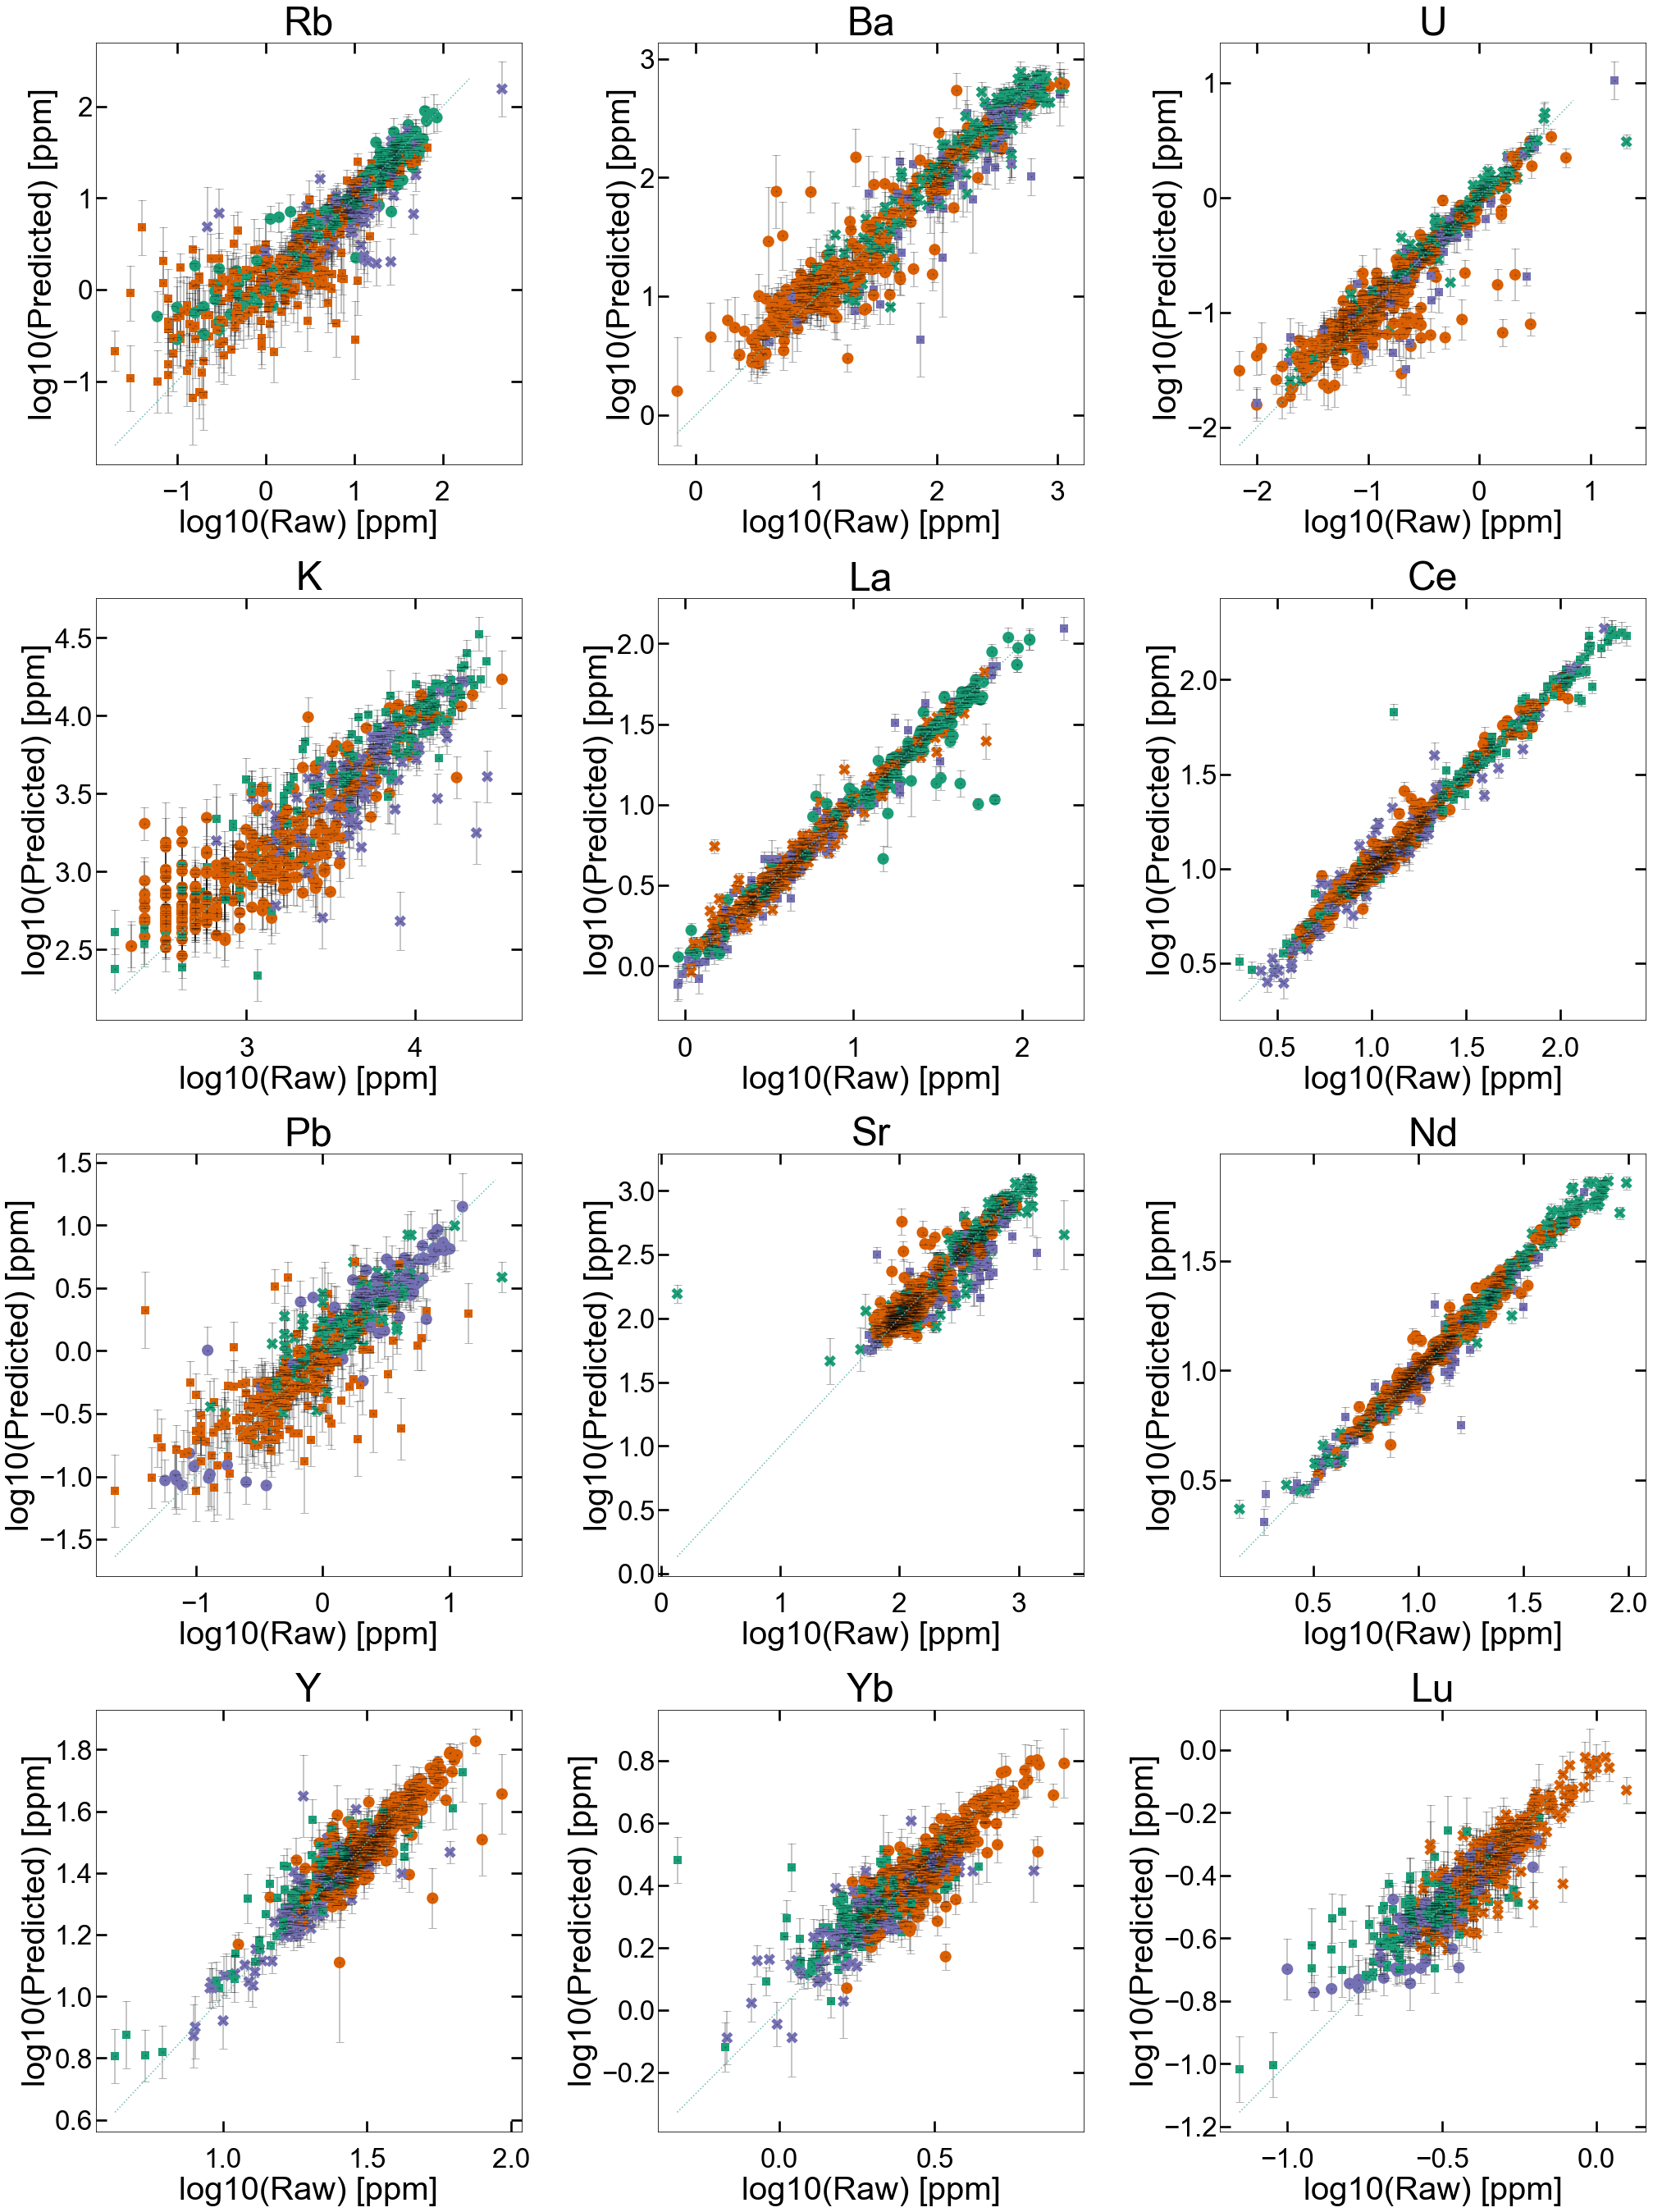

In [43]:
NGBoost_Scatter_Plot(path, mobile_elem_all, good_range_elem, TECTONIC_list)

In [42]:
def NGBoost_Scatter_Plot(path, mobile_elem_all, good_range_elem, TECTONIC_list):
    ################ fig setting
    num_first = -1
    num = num_first

    # 表示の形を決める
    len_elem = len(mobile_elem_all)
    ncols = 3 # 選べる様にする
    nrows = len_elem//4 +1

    figsize_num = 9.5
    figsize=(ncols*figsize_num, nrows*figsize_num)
    font_size_label = 40
    ############### fig setting

    ###################################################################################### #scatter
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ### corr^2
    corr_compile = pd.DataFrame(index=['R2_score'], columns=mobile_elem_all)
    ##################################figure location listの作成
    loc_list = []
    loc_rows = -1
    for num in range(len(mobile_elem_all)):
        loc_cols = num%ncols
        if loc_cols == 0:
            loc_rows=loc_rows+1
        loc_list.append([loc_rows, loc_cols])
    ##################################figure location listの作成

    ###########移動元素ごとのスコアを求める
    for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
        # ax
        ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
        now_path = path+'/'+define_mobile_elem
        now_figure_path = path+'/Model_explain'
        make_dirs(now_figure_path)
        print(now_path)
        print(define_mobile_elem)
        data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0)
        if define_mobile_elem in trace_all:
            data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
        data['Error'] = data['predict'] / data['RAW']
        data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
        data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
        data['Tectonic setting_num'] = data['SAMPLE_INFO'].replace(TECTONIC_replace_num)
        data["RAW"] = data["RAW"].apply(lambda x : np.log10(x))
        data["predict"] = data["predict"].apply(lambda x : np.log10(x))
        ################################################################ Setting
        legend_flag = False
        if define_mobile_elem == 'Rb':
            #legend_flag = True
            legend_flag = False
        ################################################################ Setting

        ################################################################ # scatter plot
        min = data['RAW'].min()
        max = data['RAW'].max()
        # -5～5まで1刻みのデータを作成
        x = np.arange(min, max)
        # 直線の式を定義
        y = x
        ax.plot(x,y, linestyle = ":", c = '#63b9af')

        ax.errorbar(x=data["RAW"], y=data["predict"],\
                    yerr = data["predict_Dist"], capsize=5, fmt='o', markersize=1, ecolor='black', markeredgecolor = "black", alpha=0.3, zorder=1)
        sns.scatterplot(data=data, x='RAW', y='predict', hue='Tectonic setting',\
                           hue_order=TECTONIC_list, palette='Dark2', style='Tectonic setting', s=200, alpha=1, edgecolor="none", legend=legend_flag, ax=ax)

        ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
        ax.set_xlabel('log10(Raw) [ppm]', fontsize=font_size_label)
        ax.set_ylabel('log10(Predicted) [ppm]', fontsize=font_size_label)
        ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
        ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
        ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
        ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
        ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
        ax.get_xaxis().set_tick_params(pad=font_size_label/2)
    plt.tight_layout()
    plt.savefig(now_figure_path+'/0_raw_vs_predict_std_color.pdf', bbox_inches='tight')
    plt.savefig(now_figure_path+'/0_raw_vs_predict_std_color.jpg', bbox_inches='tight')
    plt.show()

## Evaluation for each tectonic setting

### Error and predict_dist bar plot

Already exist or fail to make dirs
Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.297265      0.232119
OIB               0.161808      0.155236
VAB               0.219659      0.166294

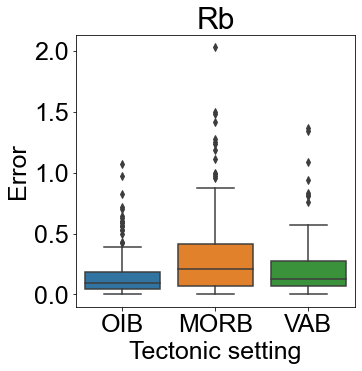

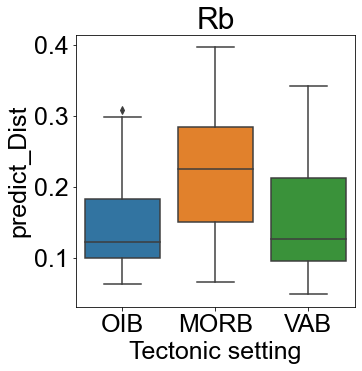

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.151318      0.129472
OIB               0.107545      0.106420
VAB               0.168676      0.169596

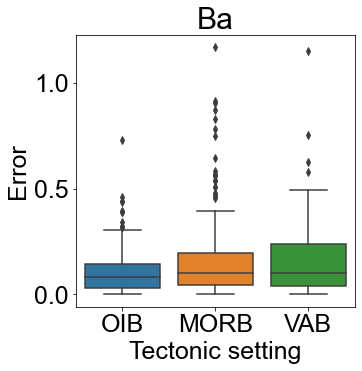

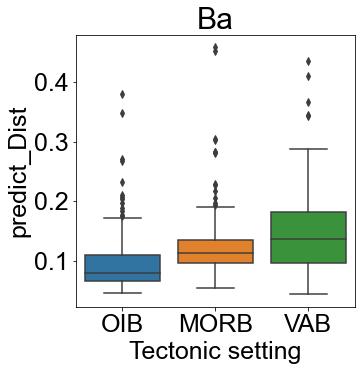

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.155256      0.123435
OIB               0.076346      0.079083
VAB               0.122277      0.116150

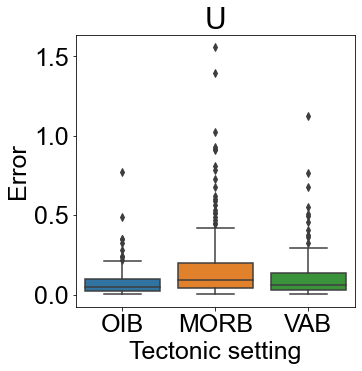

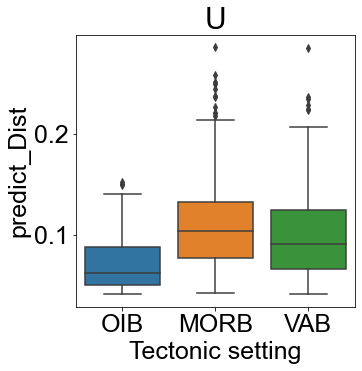

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.175766      0.178911
OIB               0.135708      0.137253
VAB               0.172256      0.174217

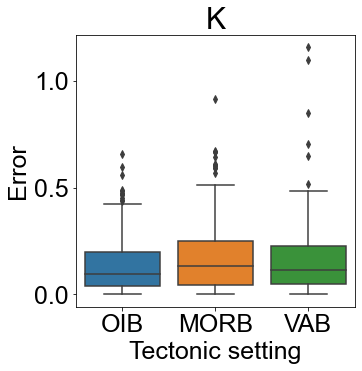

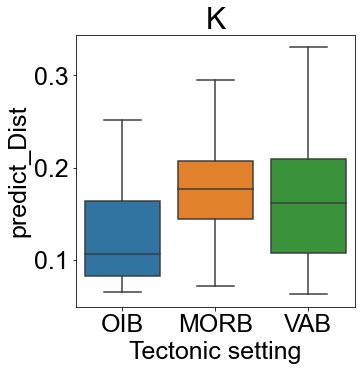

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049161      0.050959
OIB               0.059386      0.054328
VAB               0.074807      0.077303

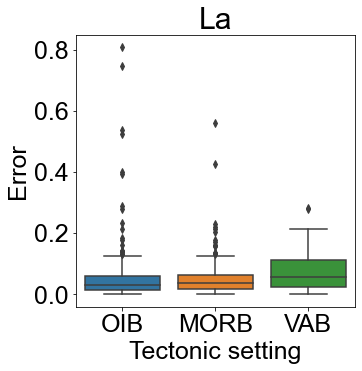

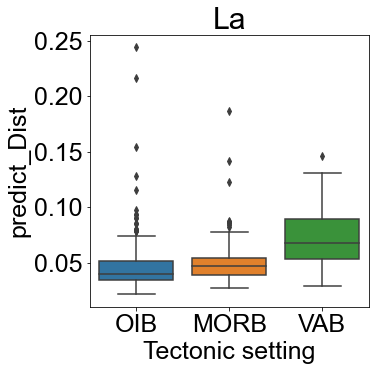

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.035177      0.034672
OIB               0.042140      0.033538
VAB               0.062006      0.052636

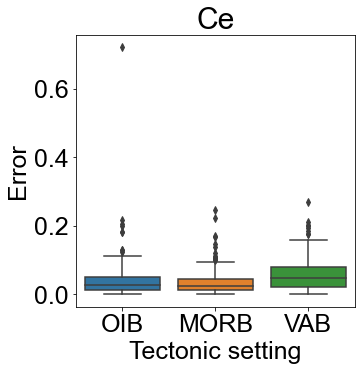

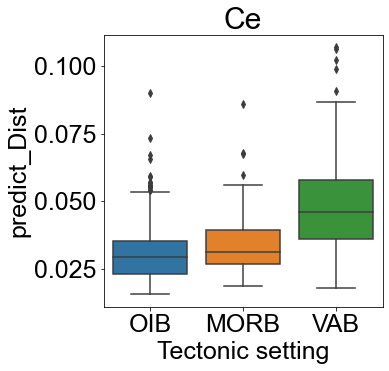

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.210124      0.170505
OIB               0.124668      0.130045
VAB               0.161488      0.153694

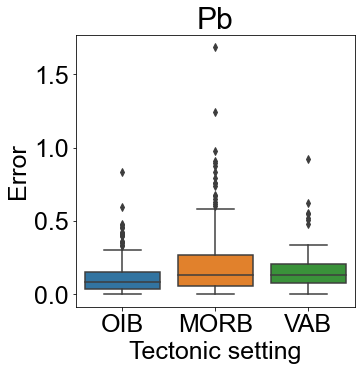

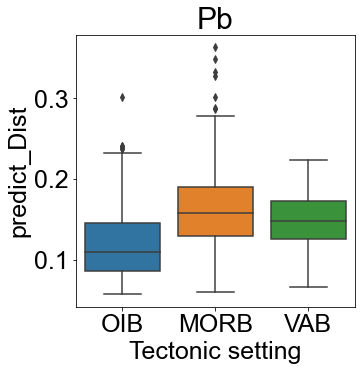

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.074820      0.076742
OIB               0.090583      0.076792
VAB               0.150915      0.120799

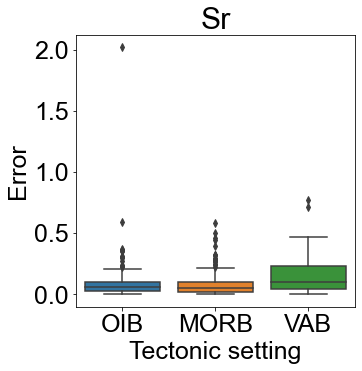

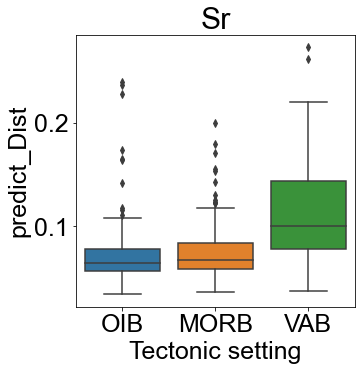

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.029817      0.029184
OIB               0.034113      0.033406
VAB               0.054285      0.050106

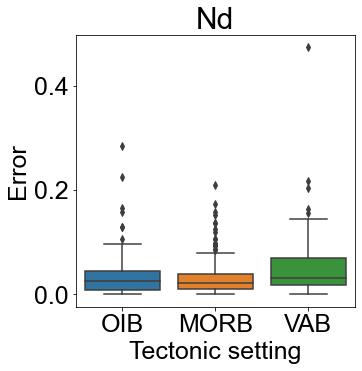

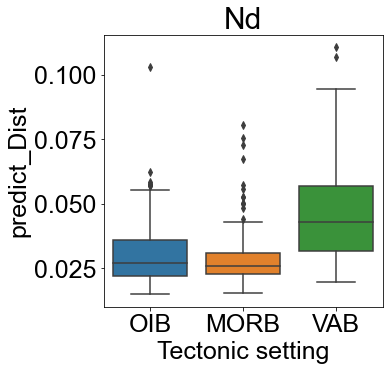

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.045011      0.043866
OIB               0.048309      0.048649
VAB               0.054108      0.049373

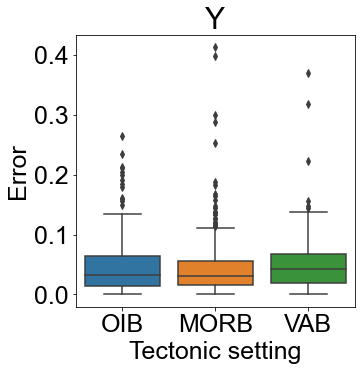

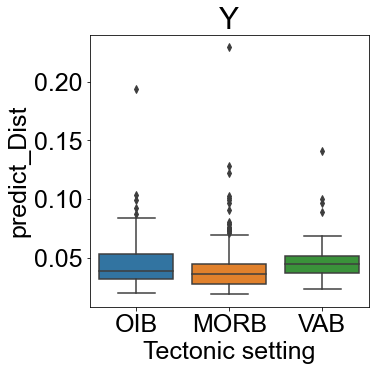

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049539      0.040390
OIB               0.064220      0.049891
VAB               0.060772      0.047631

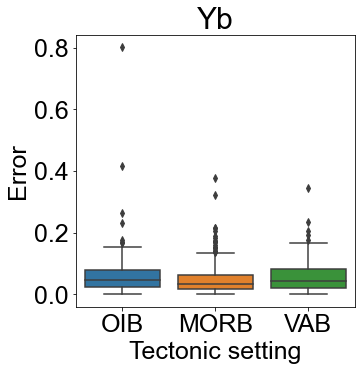

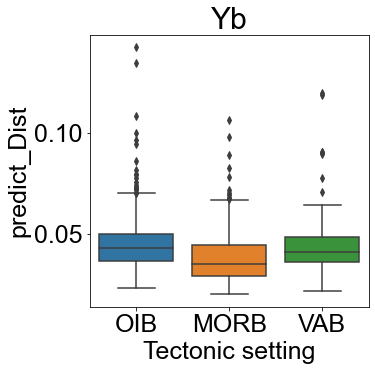

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.050444      0.052577
OIB               0.068606      0.066116
VAB               0.062691      0.061994

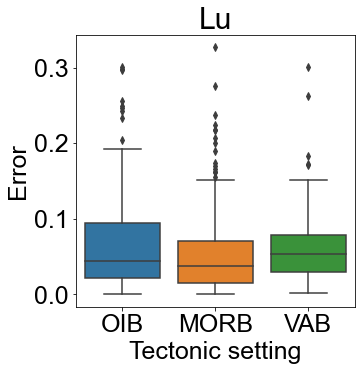

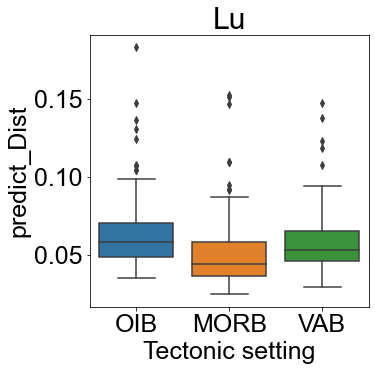

In [9]:
error_compile = pd.DataFrame()
std_compile = pd.DataFrame()
score_compile = pd.DataFrame(columns=mobile_elem_all, index=['Error','Error_median', 'predict_Dist', 'predict_Dist_median'])
ERR_fig_path = now_figure_path+'/Error_STD/'
make_dirs(ERR_fig_path)

for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
    data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
    data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
    score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
    display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))
    
    error_compile[define_mobile_elem] = score_data['Error']
    std_compile[define_mobile_elem] = score_data['predict_Dist']
    
    score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
    score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
    score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
    score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
    
    ##########
    plt.figure(figsize=(5, 5))
    plt.title(define_mobile_elem)
    sns.boxplot(x='Tectonic setting', y='Error', data=data, order=TECTONIC_list)
    plt.savefig(ERR_fig_path+define_mobile_elem+'_ERROR.pdf', bbox_inches='tight')
    plt.show()
    plt.figure(figsize=(5, 5))
    plt.title(define_mobile_elem)
    sns.boxplot(x='Tectonic setting', y='predict_Dist', data=data, order=TECTONIC_list)
    plt.savefig(ERR_fig_path+define_mobile_elem+'_STD.pdf', bbox_inches='tight')
    plt.show()

### KDE distribution

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.297265      0.232119
OIB               0.161808      0.155236
VAB               0.219659      0.166294

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.151318      0.129472
OIB               0.107545      0.106420
VAB               0.168676      0.169596

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.155256      0.123435
OIB               0.076346      0.079083
VAB               0.122277      0.116150

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.175766      0.178911
OIB               0.135708      0.137253
VAB               0.172256      0.174217

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049161      0.050959
OIB               0.059386      0.054328
VAB               0.074807      0.077303

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.035177      0.034672
OIB               0.042140      0.033538
VAB               0.062006      0.052636

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.210124      0.170505
OIB               0.124668      0.130045
VAB               0.161488      0.153694

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.074820      0.076742
OIB               0.090583      0.076792
VAB               0.150915      0.120799

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.029817      0.029184
OIB               0.034113      0.033406
VAB               0.054285      0.050106

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.045011      0.043866
OIB               0.048309      0.048649
VAB               0.054108      0.049373

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049539      0.040390
OIB               0.064220      0.049891
VAB               0.060772      0.047631

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.050444      0.052577
OIB               0.068606      0.066116
VAB               0.062691      0.061994

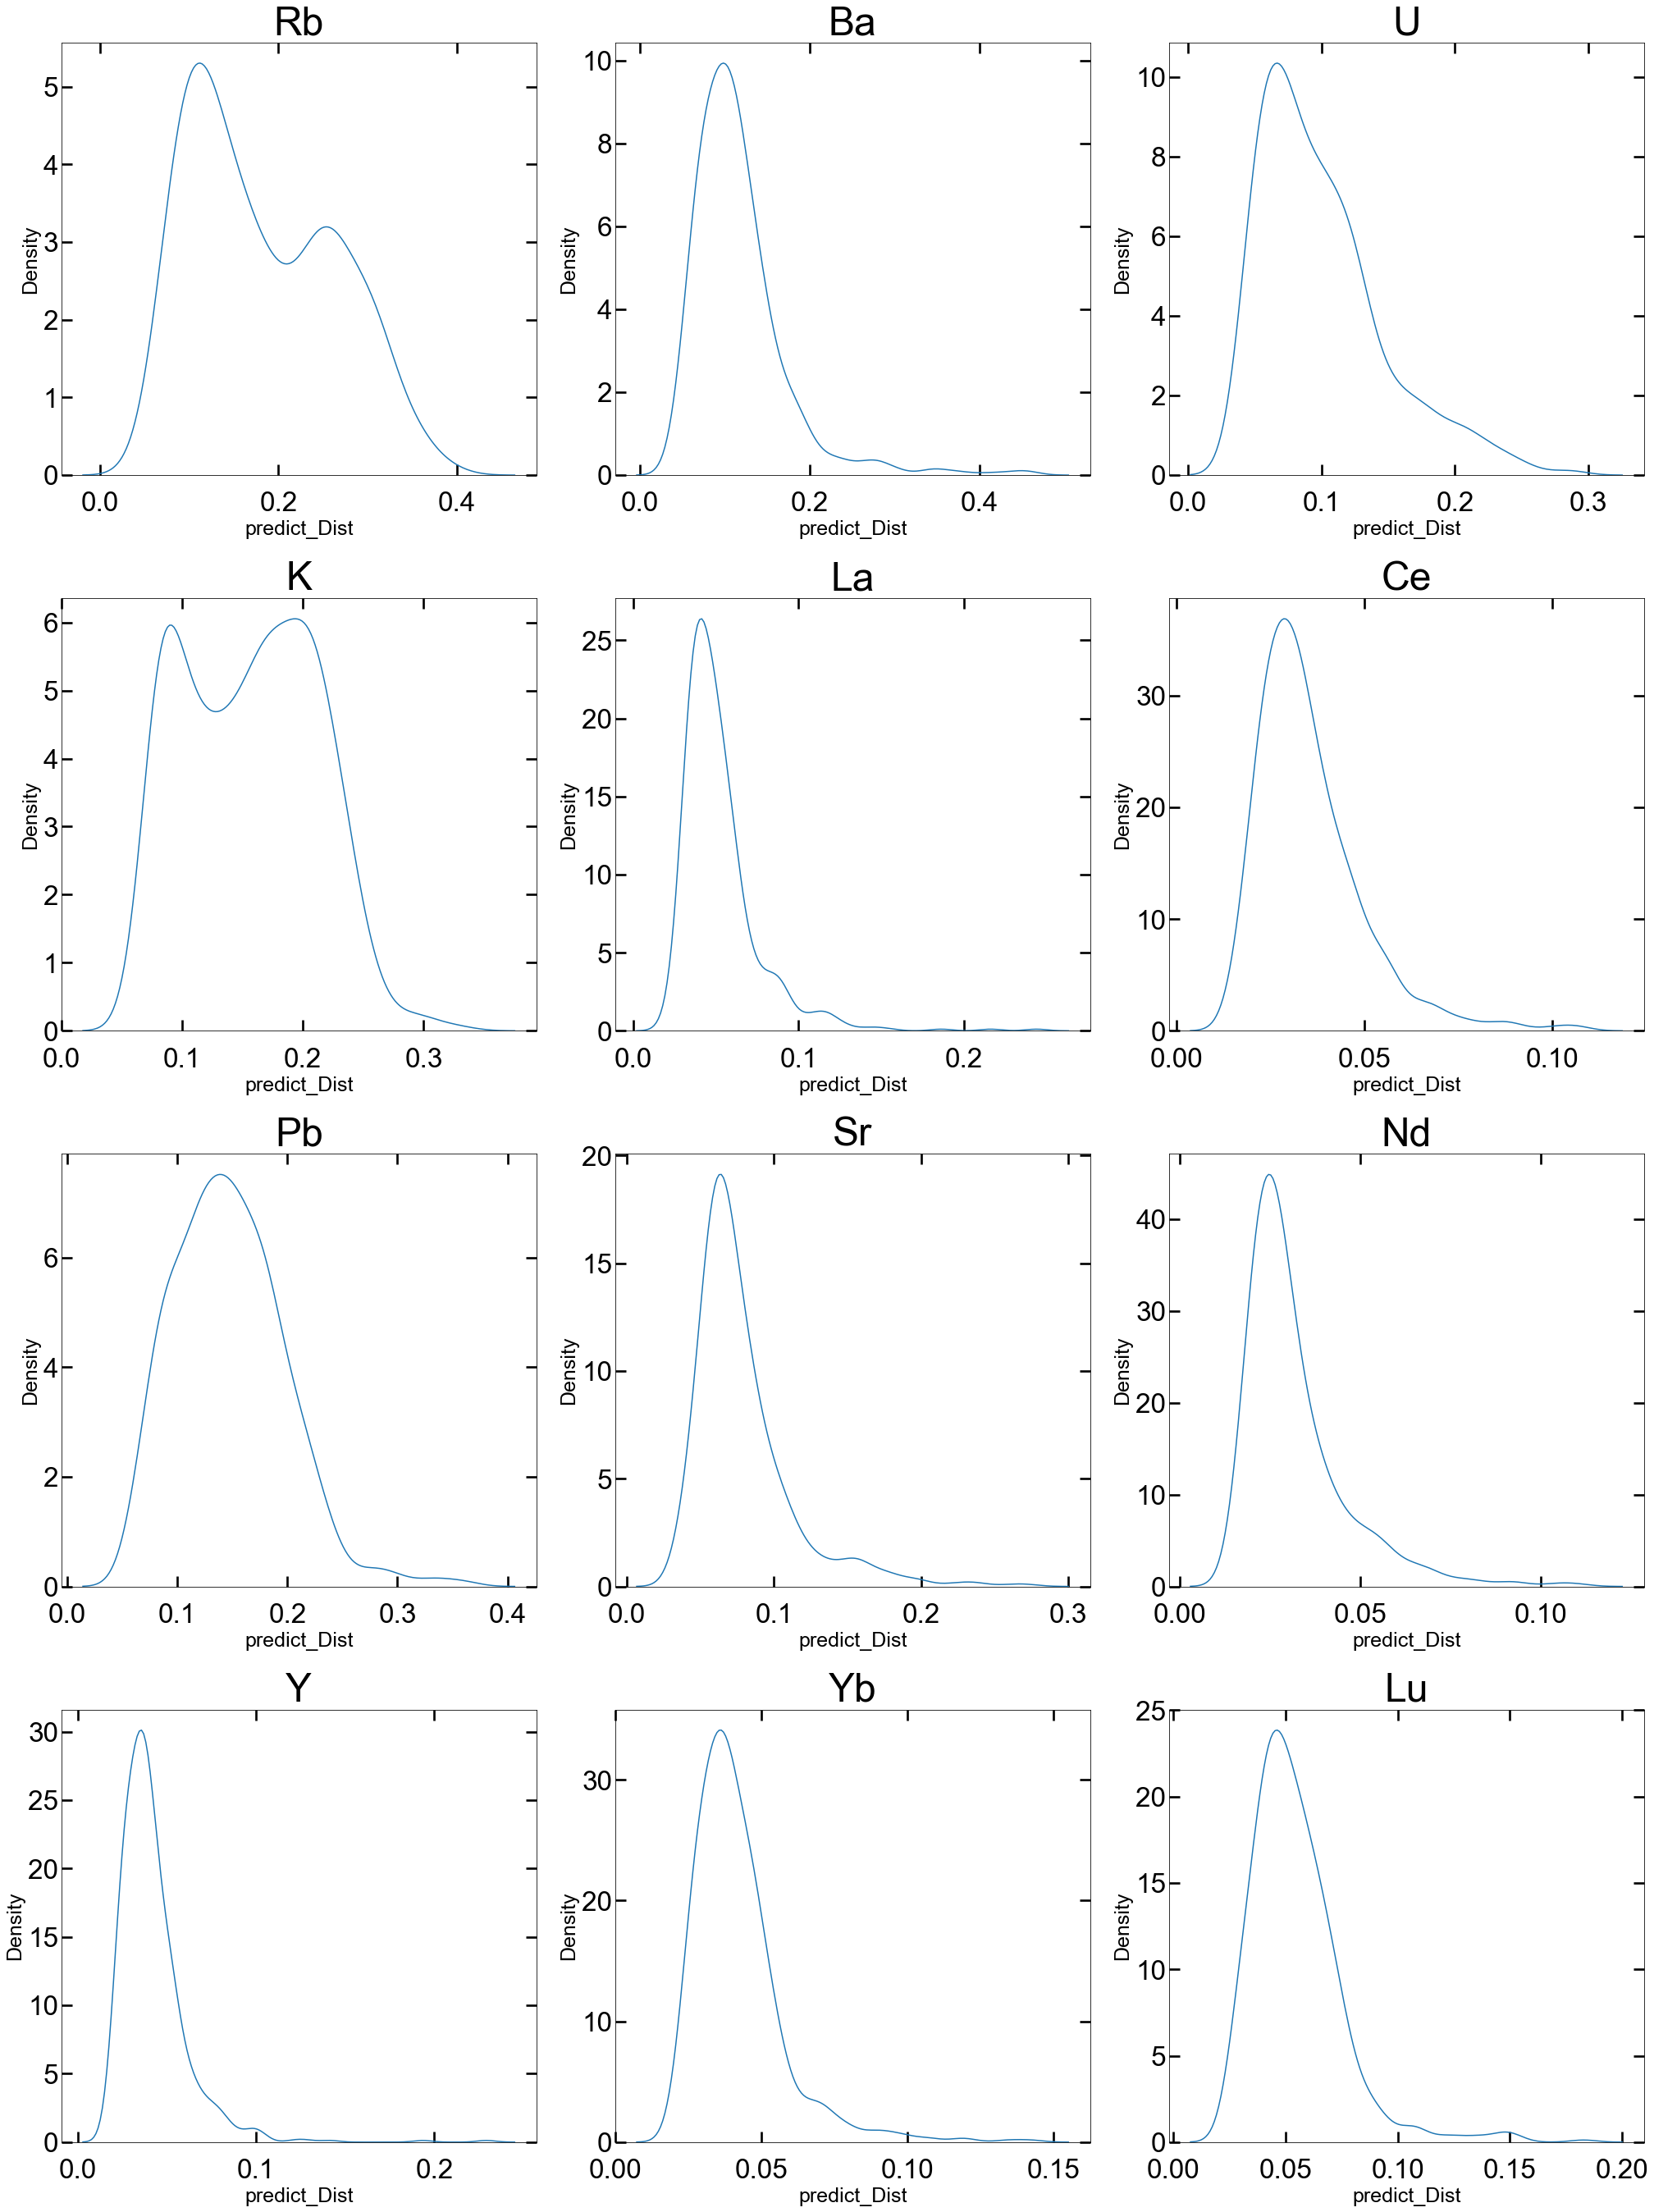

In [10]:
# figの位置
num_first = -1
num = num_first
nrows = 4
ncols = 3
len_elem = len(mobile_elem_all)
figsize_num = 9.5
figsize=(ncols*figsize_num, nrows*figsize_num)
font_size_label = 40

###################################################################################### #scatter
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
##################################figure location listの作成
loc_list = []
loc_rows = -1
for num in range(len(mobile_elem_all)):
    loc_cols = num%ncols
    if loc_cols == 0:
        loc_rows=loc_rows+1
    loc_list.append([loc_rows, loc_cols])
##################################figure location listの作成

###########移動元素ごとのスコアを求める
for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
    data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
    data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
    score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
    display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))
    
    error_compile[define_mobile_elem] = score_data['Error']
    std_compile[define_mobile_elem] = score_data['predict_Dist']
    
    score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
    score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
    score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
    score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
    ################################################################ Setting
    legend_flag = False
    if define_mobile_elem == 'Rb':
        #legend_flag = True
        legend_flag = False
    ################################################################ Setting

    ################################################################ # scatter plot
    min = np.log10(data['RAW'].min())
    max = np.log10(data['RAW'].max())
    # -5～5まで1刻みのデータを作成
    sns.kdeplot( x='predict_Dist', data=data, ax=ax)
    ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
    #ax.set_xlabel('log10(Raw) [ppm]', fontsize=font_size_label)
    #ax.set_ylabel('log10(Predicted) [ppm]', fontsize=font_size_label)
    ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
    ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
    ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
    ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
    ax.get_xaxis().set_tick_params(pad=font_size_label/2)
plt.tight_layout()
plt.savefig(now_figure_path+'/0_predict_Dist.pdf', bbox_inches='tight')
plt.show()

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.297265      0.232119
OIB               0.161808      0.155236
VAB               0.219659      0.166294

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.151318      0.129472
OIB               0.107545      0.106420
VAB               0.168676      0.169596

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.155256      0.123435
OIB               0.076346      0.079083
VAB               0.122277      0.116150

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.175766      0.178911
OIB               0.135708      0.137253
VAB               0.172256      0.174217

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049161      0.050959
OIB               0.059386      0.054328
VAB               0.074807      0.077303

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.035177      0.034672
OIB               0.042140      0.033538
VAB               0.062006      0.052636

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.210124      0.170505
OIB               0.124668      0.130045
VAB               0.161488      0.153694

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.074820      0.076742
OIB               0.090583      0.076792
VAB               0.150915      0.120799

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.029817      0.029184
OIB               0.034113      0.033406
VAB               0.054285      0.050106

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.045011      0.043866
OIB               0.048309      0.048649
VAB               0.054108      0.049373

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049539      0.040390
OIB               0.064220      0.049891
VAB               0.060772      0.047631

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.050444      0.052577
OIB               0.068606      0.066116
VAB               0.062691      0.061994

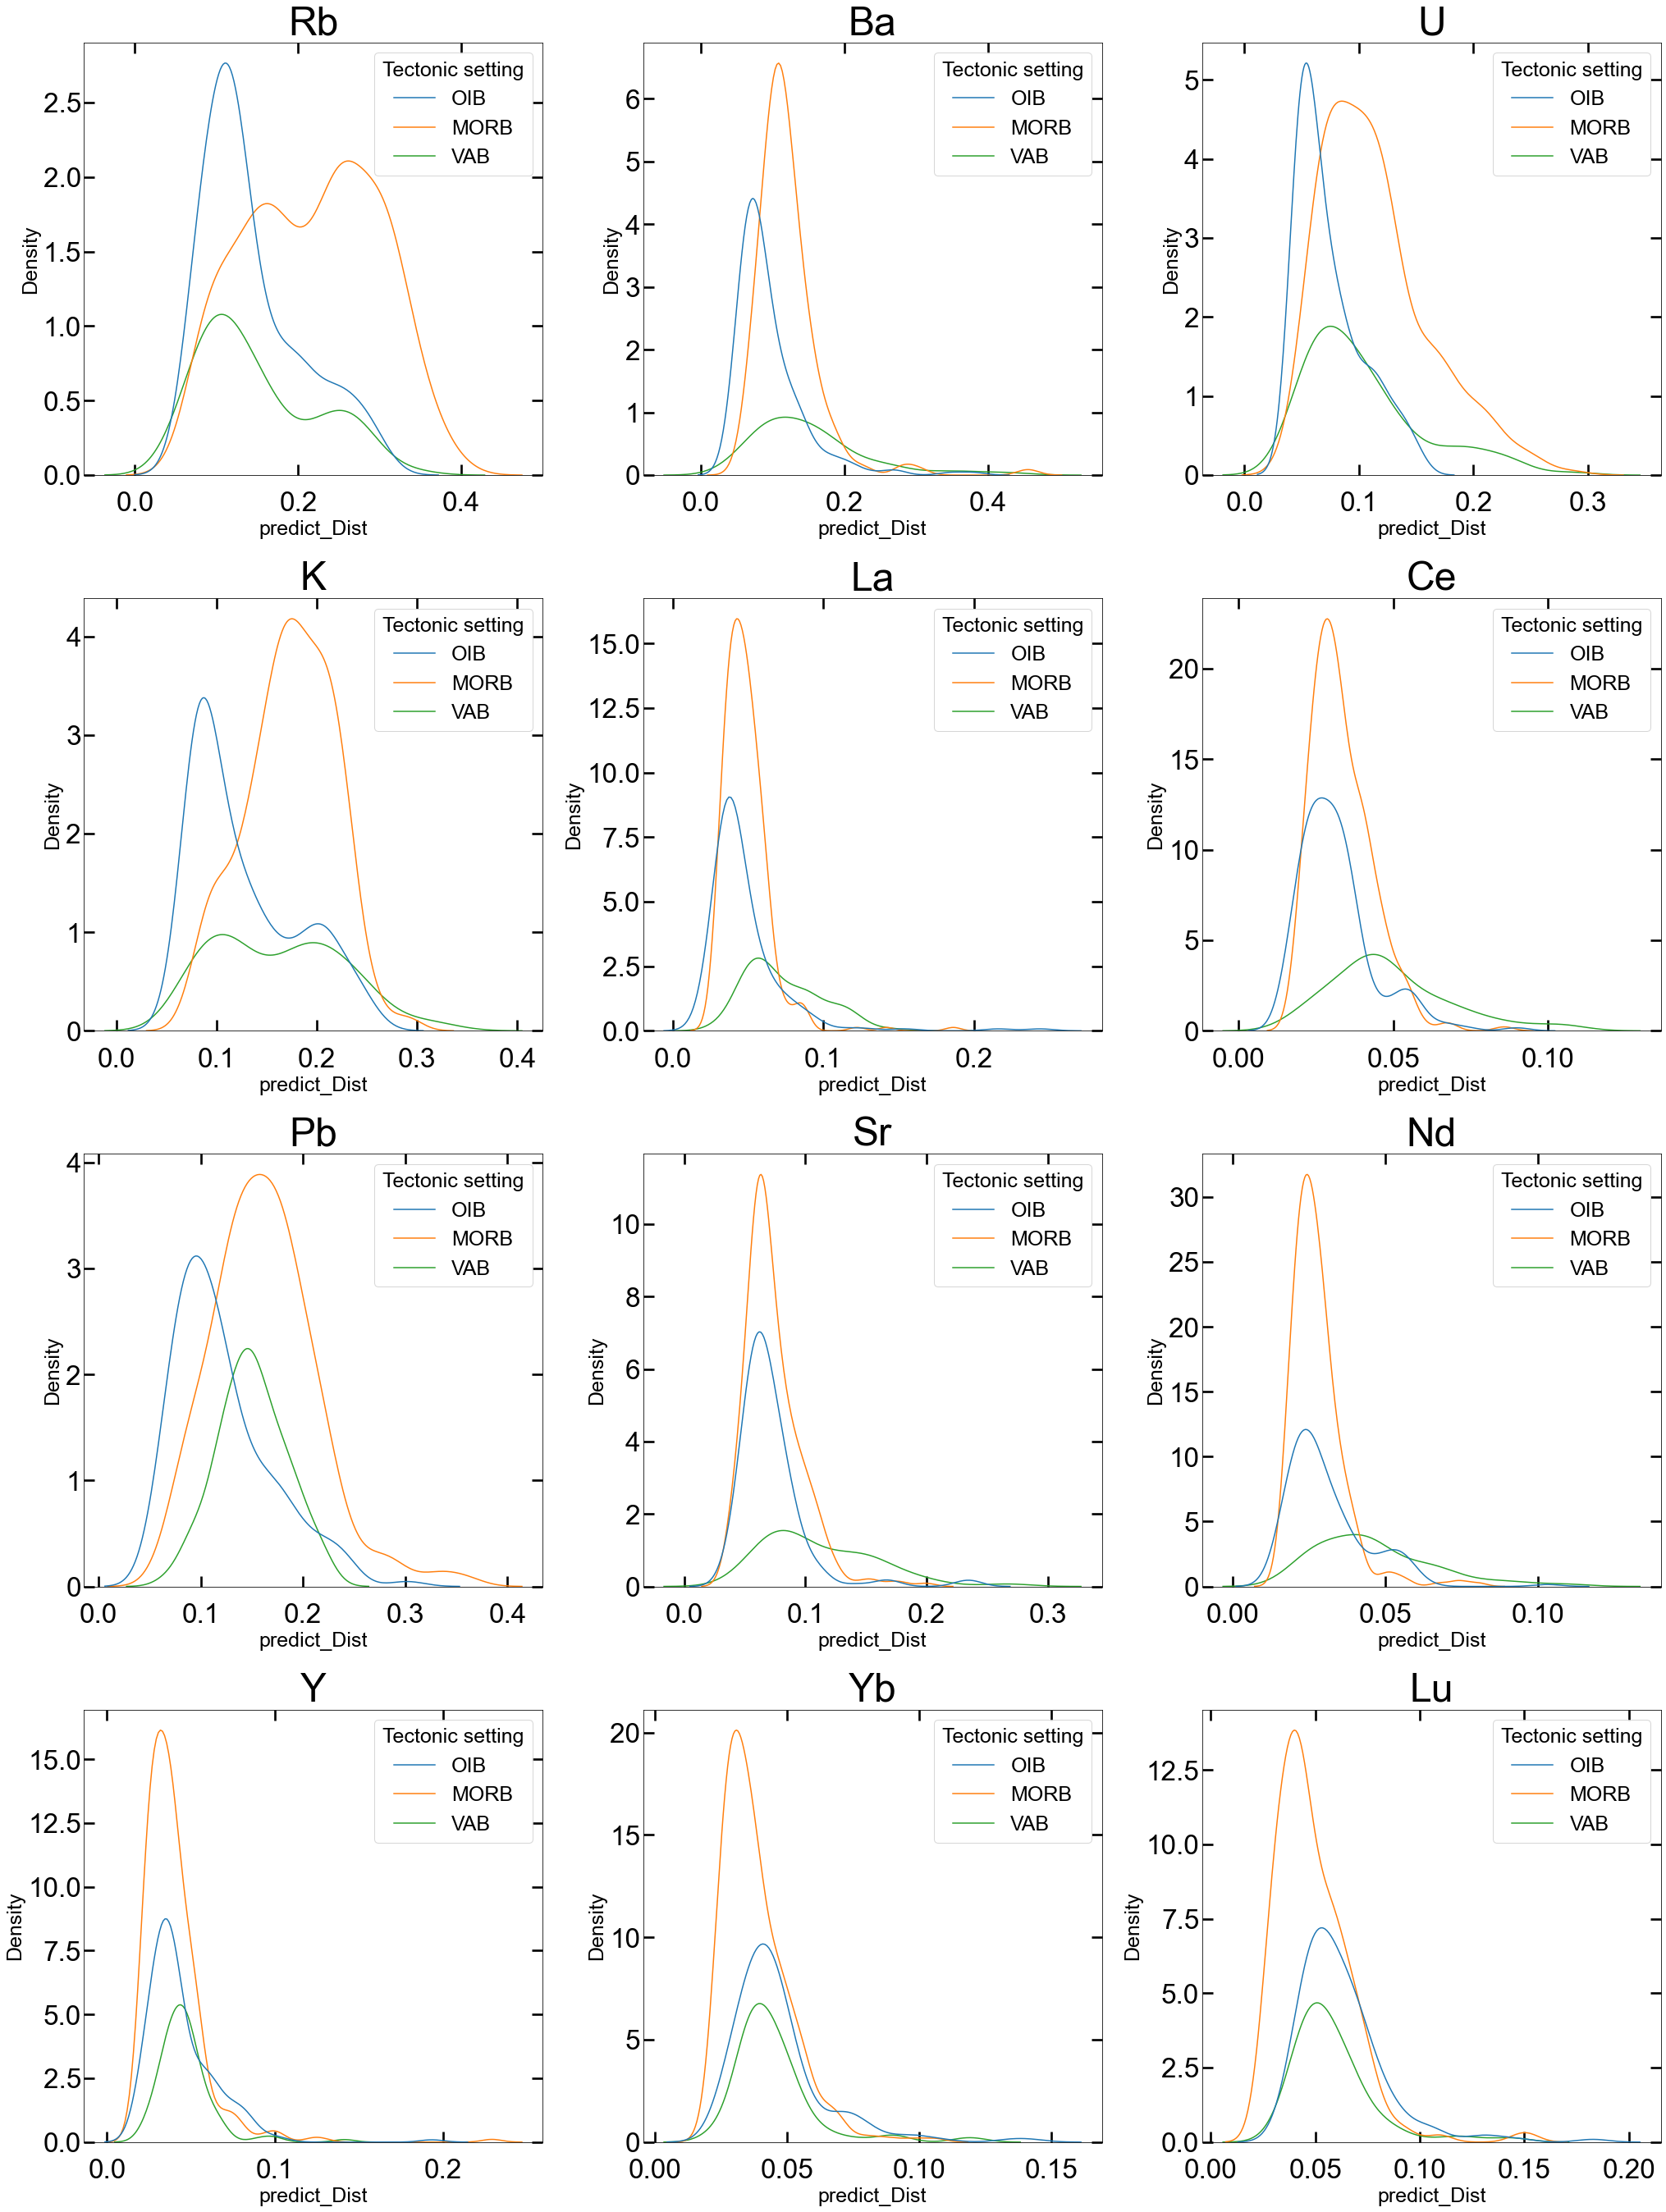

In [11]:
# figの位置
num_first = -1
num = num_first
nrows = 4
ncols = 3
len_elem = len(mobile_elem_all)
figsize_num = 9.5
figsize=(ncols*figsize_num, nrows*figsize_num)
font_size_label = 40

###################################################################################### #scatter
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
##################################figure location listの作成
loc_list = []
loc_rows = -1
for num in range(len(mobile_elem_all)):
    loc_cols = num%ncols
    if loc_cols == 0:
        loc_rows=loc_rows+1
    loc_list.append([loc_rows, loc_cols])
##################################figure location listの作成

###########移動元素ごとのスコアを求める
for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
    data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
    data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
    score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
    display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))
    
    error_compile[define_mobile_elem] = score_data['Error']
    std_compile[define_mobile_elem] = score_data['predict_Dist']
    
    score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
    score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
    score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
    score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
    ################################################################ Setting
    legend_flag = False
    if define_mobile_elem == 'Rb':
        #legend_flag = True
        legend_flag = False
    ################################################################ Setting

    ################################################################ # scatter plot
    min = np.log10(data['RAW'].min())
    max = np.log10(data['RAW'].max())
    # -5～5まで1刻みのデータを作成
    sns.kdeplot( x='predict_Dist', hue='Tectonic setting', hue_order=TECTONIC_list, data=data, ax=ax)
    ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
    ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    #ax.set_xlabel('log10(Raw) [ppm]', fontsize=font_size_label)
    #ax.set_ylabel('log10(Predicted) [ppm]', fontsize=font_size_label)
    ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
    ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
    ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
    ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
    ax.get_xaxis().set_tick_params(pad=font_size_label/2)
plt.tight_layout()
plt.savefig(now_figure_path+'/0_predict_Dist_Each.pdf', bbox_inches='tight')
plt.show()

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.297265      0.232119
OIB               0.161808      0.155236
VAB               0.219659      0.166294

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.151318      0.129472
OIB               0.107545      0.106420
VAB               0.168676      0.169596

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.155256      0.123435
OIB               0.076346      0.079083
VAB               0.122277      0.116150

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.175766      0.178911
OIB               0.135708      0.137253
VAB               0.172256      0.174217

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049161      0.050959
OIB               0.059386      0.054328
VAB               0.074807      0.077303

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.035177      0.034672
OIB               0.042140      0.033538
VAB               0.062006      0.052636

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.210124      0.170505
OIB               0.124668      0.130045
VAB               0.161488      0.153694

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.074820      0.076742
OIB               0.090583      0.076792
VAB               0.150915      0.120799

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.029817      0.029184
OIB               0.034113      0.033406
VAB               0.054285      0.050106

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.045011      0.043866
OIB               0.048309      0.048649
VAB               0.054108      0.049373

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049539      0.040390
OIB               0.064220      0.049891
VAB               0.060772      0.047631

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.050444      0.052577
OIB               0.068606      0.066116
VAB               0.062691      0.061994

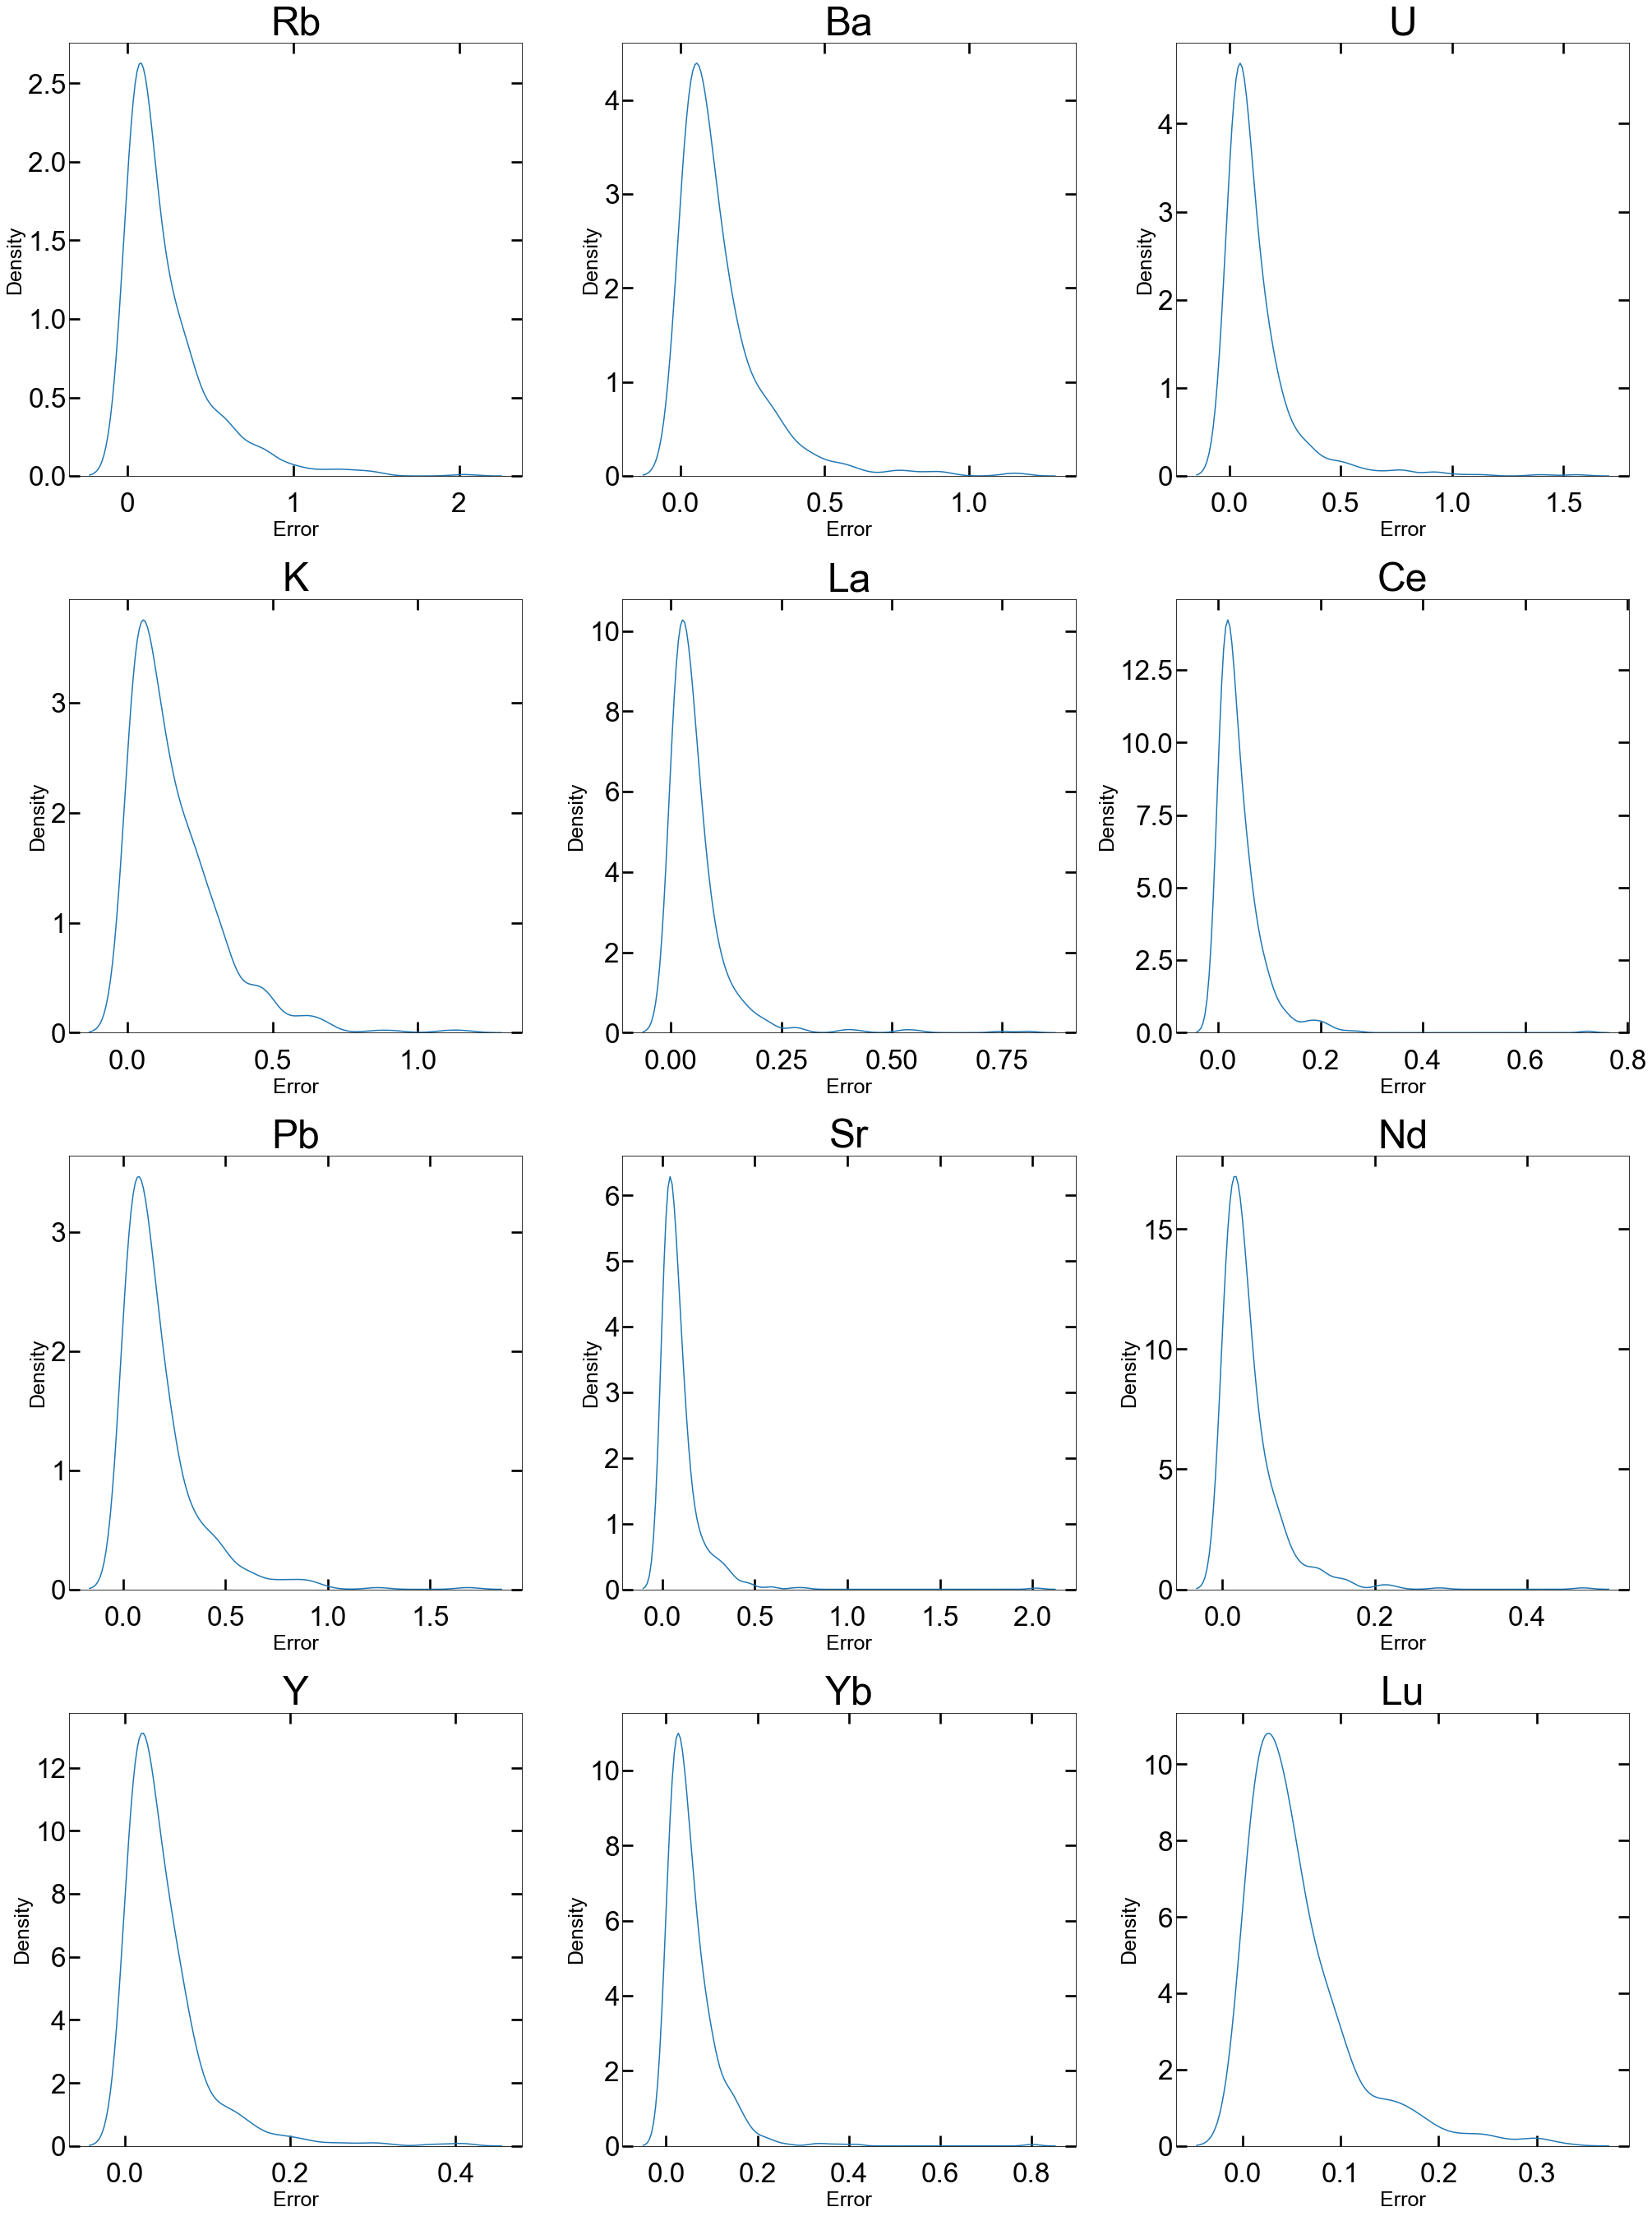

In [12]:
# figの位置
num_first = -1
num = num_first
nrows = 4
ncols = 3
len_elem = len(mobile_elem_all)
figsize_num = 9.5
figsize=(ncols*figsize_num, nrows*figsize_num)
font_size_label = 40

###################################################################################### #scatter
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
##################################figure location listの作成
loc_list = []
loc_rows = -1
for num in range(len(mobile_elem_all)):
    loc_cols = num%ncols
    if loc_cols == 0:
        loc_rows=loc_rows+1
    loc_list.append([loc_rows, loc_cols])
##################################figure location listの作成

###########移動元素ごとのスコアを求める
for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
    data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
    data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
    score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
    display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))
    
    error_compile[define_mobile_elem] = score_data['Error']
    std_compile[define_mobile_elem] = score_data['predict_Dist']
    
    score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
    score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
    score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
    score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
    ################################################################ Setting
    legend_flag = False
    if define_mobile_elem == 'Rb':
        #legend_flag = True
        legend_flag = False
    ################################################################ Setting

    ################################################################ # scatter plot
    min = np.log10(data['RAW'].min())
    max = np.log10(data['RAW'].max())
    # -5～5まで1刻みのデータを作成
    sns.kdeplot( x='Error', data=data, ax=ax)
    ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
    ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    #ax.set_xlabel('log10(Raw) [ppm]', fontsize=font_size_label)
    #ax.set_ylabel('log10(Predicted) [ppm]', fontsize=font_size_label)
    ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
    ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
    ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
    ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
    ax.get_xaxis().set_tick_params(pad=font_size_label/2)
plt.tight_layout()
plt.savefig(now_figure_path+'/0_Error.pdf', bbox_inches='tight')
plt.show()

In [ ]:
def  Error_Distribution_Each_Setting():
    # figの位置
    num_first = -1
    num = num_first
    nrows = 4
    ncols = 3
    len_elem = len(mobile_elem_all)
    figsize_num = 9.5
    figsize=(ncols*figsize_num, nrows*figsize_num)
    font_size_label = 40

    ###################################################################################### #scatter
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ##################################figure location listの作成
    loc_list = []
    loc_rows = -1
    for num in range(len(mobile_elem_all)):
        loc_cols = num%ncols
        if loc_cols == 0:
            loc_rows=loc_rows+1
        loc_list.append([loc_rows, loc_cols])
    ##################################figure location listの作成

    ###########移動元素ごとのスコアを求める
    for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
        # ax
        ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
        now_path = path+define_mobile_elem
        now_figure_path = path+'/5.model_explain'
        make_dirs(now_figure_path)
        data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
        data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
        data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
        data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
        data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
        score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
        display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))

        error_compile[define_mobile_elem] = score_data['Error']
        std_compile[define_mobile_elem] = score_data['predict_Dist']

        score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
        score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
        score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
        score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
        ################################################################ Setting
        legend_flag = False
        if define_mobile_elem == 'Rb':
            #legend_flag = True
            legend_flag = False
        ################################################################ Setting

        ################################################################ # scatter plot
        min = np.log10(data['RAW'].min())
        max = np.log10(data['RAW'].max())
        # -5～5まで1刻みのデータを作成
        sns.kdeplot( x='Error', hue='Tectonic setting', hue_order=TECTONIC_list, data=data, ax=ax)
        ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
        ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
        ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
        #ax.set_xlabel('log10(Raw) [ppm]', fontsize=font_size_label)
        #ax.set_ylabel('log10(Predicted) [ppm]', fontsize=font_size_label)
        ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
        ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
        ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
        ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
        ax.get_xaxis().set_tick_params(pad=font_size_label/2)
    plt.tight_layout()
    plt.savefig(now_figure_path+'/0_Error_Each.pdf', bbox_inches='tight')
    plt.show()

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.297265      0.232119
OIB               0.161808      0.155236
VAB               0.219659      0.166294

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.151318      0.129472
OIB               0.107545      0.106420
VAB               0.168676      0.169596

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.155256      0.123435
OIB               0.076346      0.079083
VAB               0.122277      0.116150

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.175766      0.178911
OIB               0.135708      0.137253
VAB               0.172256      0.174217

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049161      0.050959
OIB               0.059386      0.054328
VAB               0.074807      0.077303

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.035177      0.034672
OIB               0.042140      0.033538
VAB               0.062006      0.052636

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.210124      0.170505
OIB               0.124668      0.130045
VAB               0.161488      0.153694

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.074820      0.076742
OIB               0.090583      0.076792
VAB               0.150915      0.120799

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.029817      0.029184
OIB               0.034113      0.033406
VAB               0.054285      0.050106

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.045011      0.043866
OIB               0.048309      0.048649
VAB               0.054108      0.049373

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049539      0.040390
OIB               0.064220      0.049891
VAB               0.060772      0.047631

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.050444      0.052577
OIB               0.068606      0.066116
VAB               0.062691      0.061994

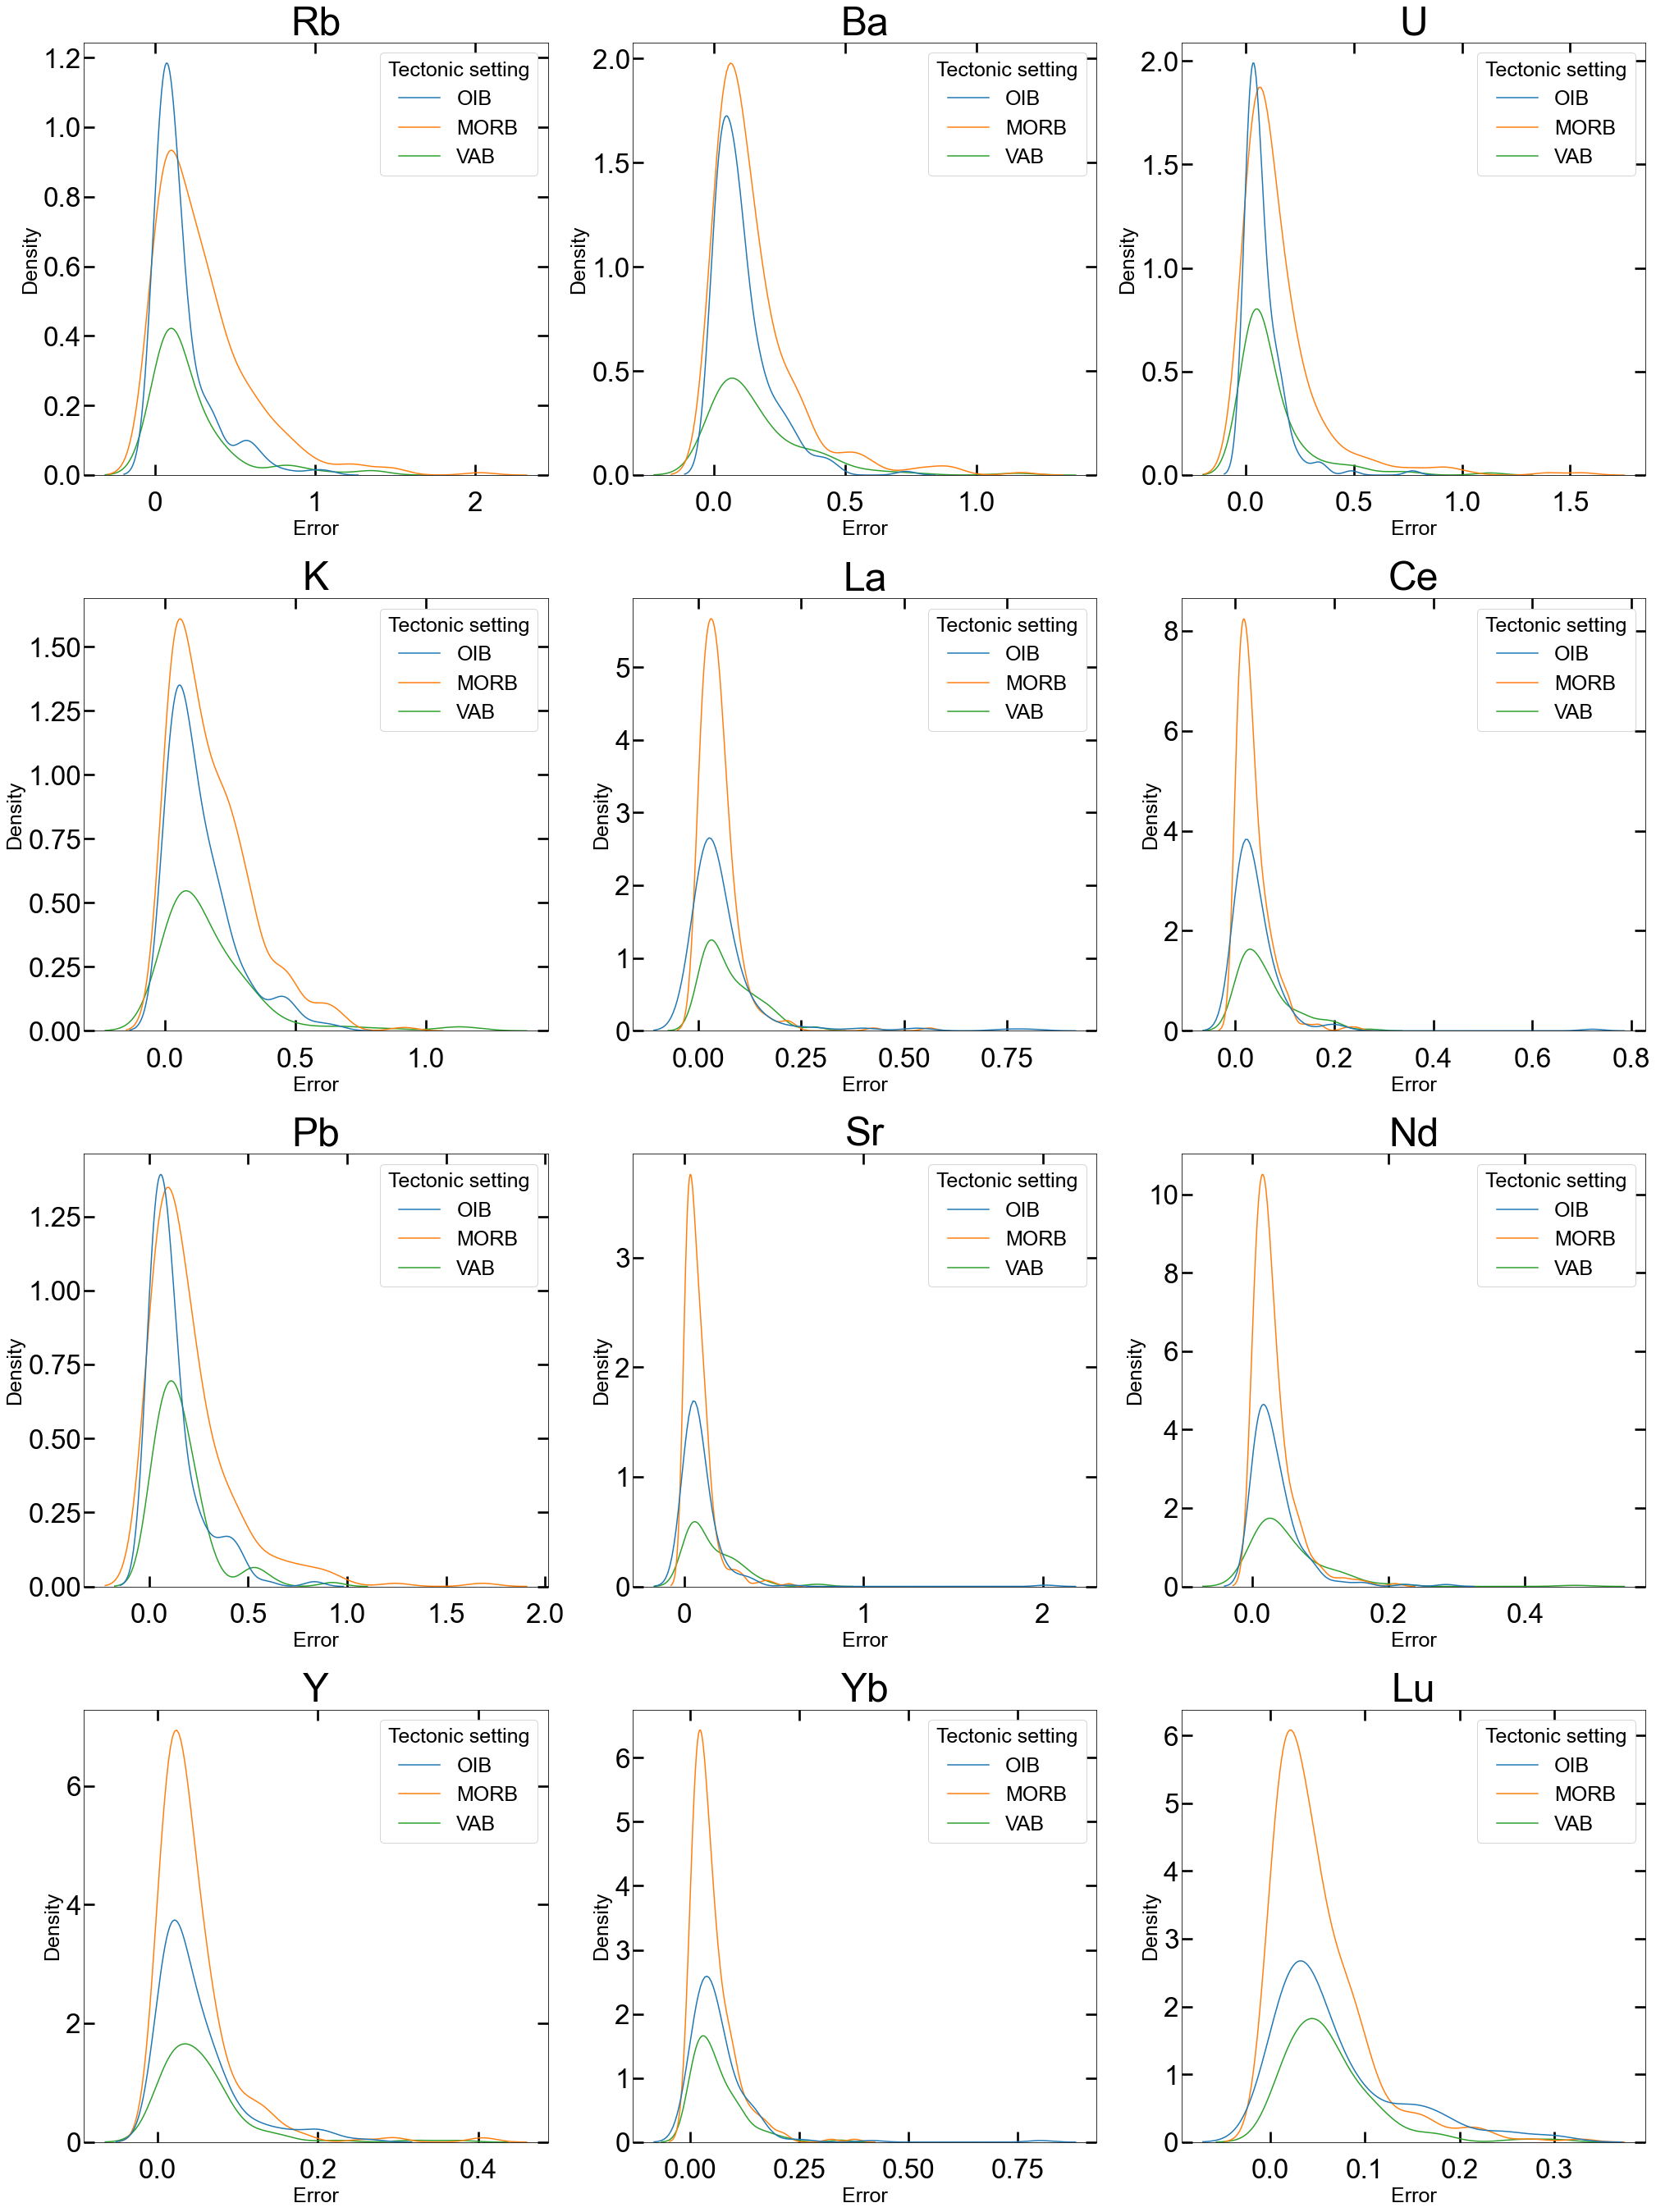

In [13]:
# figの位置
num_first = -1
num = num_first
nrows = 4
ncols = 3
len_elem = len(mobile_elem_all)
figsize_num = 9.5
figsize=(ncols*figsize_num, nrows*figsize_num)
font_size_label = 40

###################################################################################### #scatter
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
##################################figure location listの作成
loc_list = []
loc_rows = -1
for num in range(len(mobile_elem_all)):
    loc_cols = num%ncols
    if loc_cols == 0:
        loc_rows=loc_rows+1
    loc_list.append([loc_rows, loc_cols])
##################################figure location listの作成

###########移動元素ごとのスコアを求める
for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
    data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
    data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
    score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
    display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))
    
    error_compile[define_mobile_elem] = score_data['Error']
    std_compile[define_mobile_elem] = score_data['predict_Dist']
    
    score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
    score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
    score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
    score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
    ################################################################ Setting
    legend_flag = False
    if define_mobile_elem == 'Rb':
        #legend_flag = True
        legend_flag = False
    ################################################################ Setting

    ################################################################ # scatter plot
    min = np.log10(data['RAW'].min())
    max = np.log10(data['RAW'].max())
    # -5～5まで1刻みのデータを作成
    sns.kdeplot( x='Error', hue='Tectonic setting', hue_order=TECTONIC_list, data=data, ax=ax)
    ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
    ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    #ax.set_xlabel('log10(Raw) [ppm]', fontsize=font_size_label)
    #ax.set_ylabel('log10(Predicted) [ppm]', fontsize=font_size_label)
    ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
    ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
    ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
    ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
    ax.get_xaxis().set_tick_params(pad=font_size_label/2)
plt.tight_layout()
plt.savefig(now_figure_path+'/0_Error_Each.pdf', bbox_inches='tight')
plt.show()

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.297265      0.232119
OIB               0.161808      0.155236
VAB               0.219659      0.166294

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.151318      0.129472
OIB               0.107545      0.106420
VAB               0.168676      0.169596

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.155256      0.123435
OIB               0.076346      0.079083
VAB               0.122277      0.116150

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.175766      0.178911
OIB               0.135708      0.137253
VAB               0.172256      0.174217

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049161      0.050959
OIB               0.059386      0.054328
VAB               0.074807      0.077303

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.035177      0.034672
OIB               0.042140      0.033538
VAB               0.062006      0.052636

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.210124      0.170505
OIB               0.124668      0.130045
VAB               0.161488      0.153694

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.074820      0.076742
OIB               0.090583      0.076792
VAB               0.150915      0.120799

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.029817      0.029184
OIB               0.034113      0.033406
VAB               0.054285      0.050106

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.045011      0.043866
OIB               0.048309      0.048649
VAB               0.054108      0.049373

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049539      0.040390
OIB               0.064220      0.049891
VAB               0.060772      0.047631

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.050444      0.052577
OIB               0.068606      0.066116
VAB               0.062691      0.061994

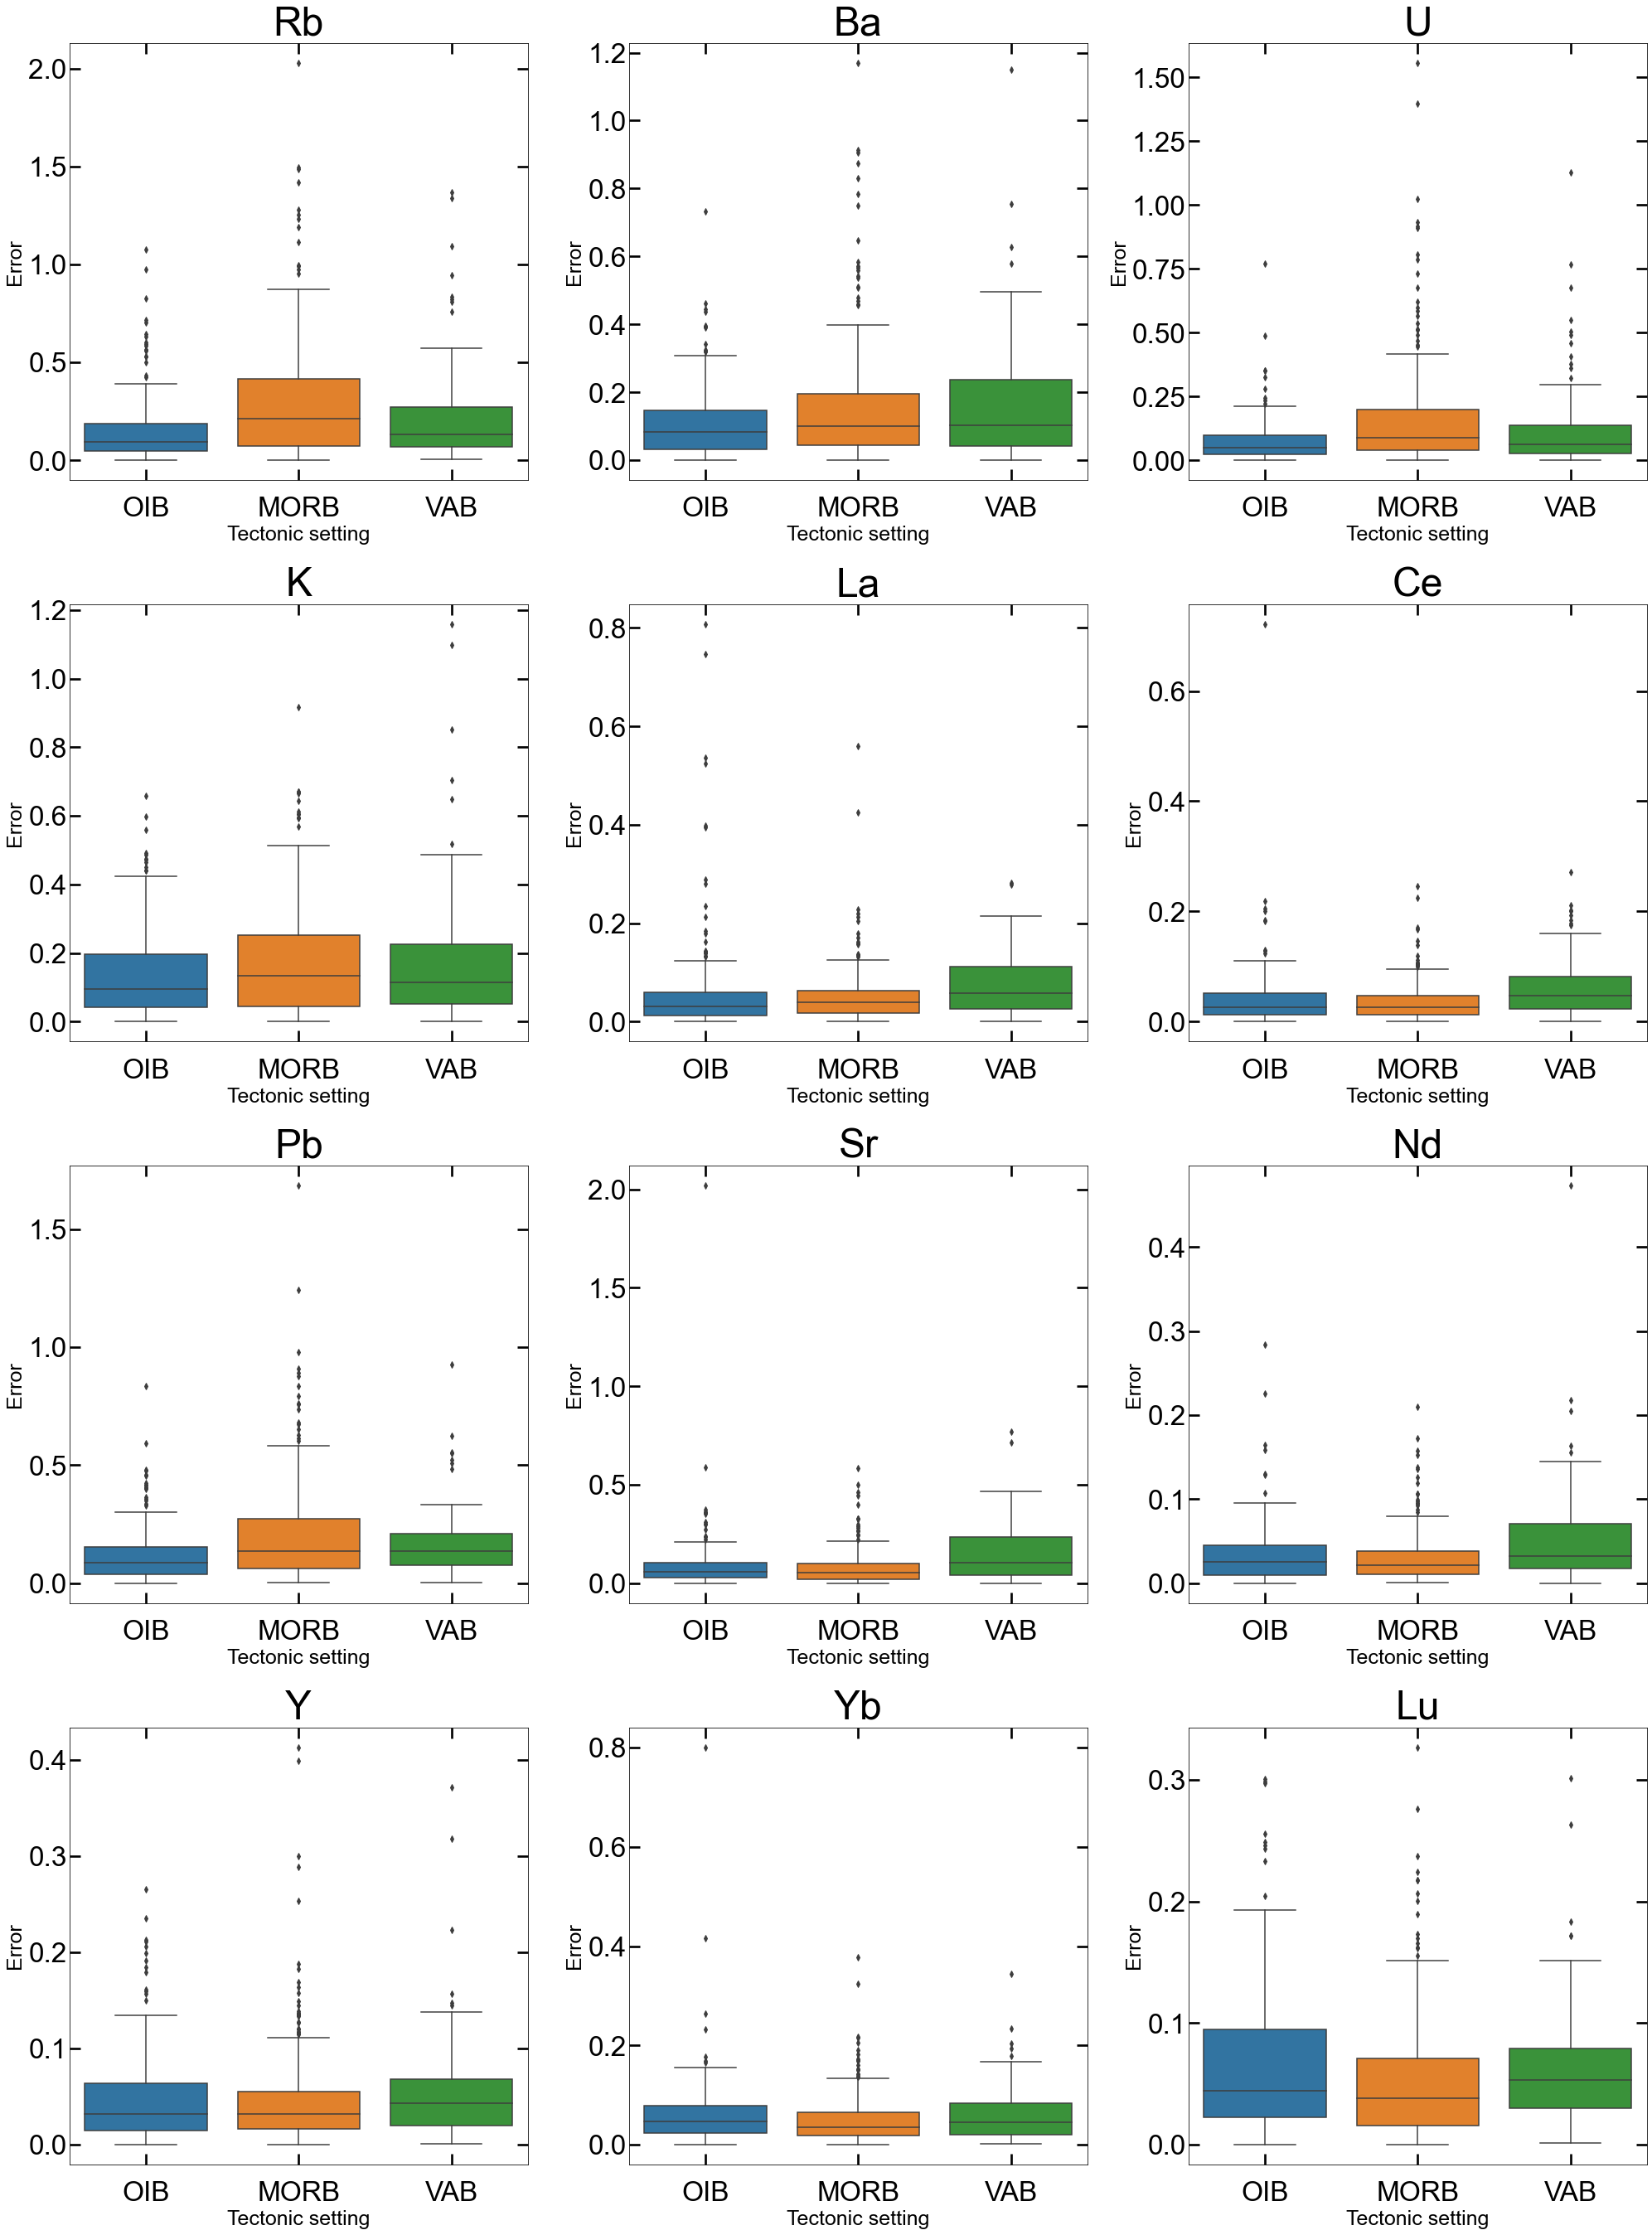

In [14]:
# figの位置
num_first = -1
num = num_first
nrows = 4
ncols = 3
len_elem = len(mobile_elem_all)
figsize_num = 9.5
figsize=(ncols*figsize_num, nrows*figsize_num)
font_size_label = 40

###################################################################################### #scatter
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
##################################figure location listの作成
loc_list = []
loc_rows = -1
for num in range(len(mobile_elem_all)):
    loc_cols = num%ncols
    if loc_cols == 0:
        loc_rows=loc_rows+1
    loc_list.append([loc_rows, loc_cols])
##################################figure location listの作成

###########移動元素ごとのスコアを求める
for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
    data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
    data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
    score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
    display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))
    
    error_compile[define_mobile_elem] = score_data['Error']
    std_compile[define_mobile_elem] = score_data['predict_Dist']
    
    score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
    score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
    score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
    score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
    ################################################################ Setting
    legend_flag = False
    if define_mobile_elem == 'Rb':
        #legend_flag = True
        legend_flag = False
    ################################################################ Setting

    ################################################################ # scatter plot
    min = np.log10(data['RAW'].min())
    max = np.log10(data['RAW'].max())
    # -5～5まで1刻みのデータを作成
    sns.boxplot(x='Tectonic setting', y='Error', data=data, order=TECTONIC_list, ax=ax)
    ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
    ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    #ax.set_xlabel('log10(Raw) [ppm]', fontsize=font_size_label)
    #ax.set_ylabel('log10(Predicted) [ppm]', fontsize=font_size_label)
    ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
    ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
    ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
    ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
    ax.get_xaxis().set_tick_params(pad=font_size_label/2)
plt.tight_layout()
plt.savefig(now_figure_path+'/0_Error_Each_BOX.pdf', bbox_inches='tight')
plt.show()

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.297265      0.232119
OIB               0.161808      0.155236
VAB               0.219659      0.166294

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.151318      0.129472
OIB               0.107545      0.106420
VAB               0.168676      0.169596

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.155256      0.123435
OIB               0.076346      0.079083
VAB               0.122277      0.116150

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.175766      0.178911
OIB               0.135708      0.137253
VAB               0.172256      0.174217

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049161      0.050959
OIB               0.059386      0.054328
VAB               0.074807      0.077303

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.035177      0.034672
OIB               0.042140      0.033538
VAB               0.062006      0.052636

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.210124      0.170505
OIB               0.124668      0.130045
VAB               0.161488      0.153694

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.074820      0.076742
OIB               0.090583      0.076792
VAB               0.150915      0.120799

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.029817      0.029184
OIB               0.034113      0.033406
VAB               0.054285      0.050106

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.045011      0.043866
OIB               0.048309      0.048649
VAB               0.054108      0.049373

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049539      0.040390
OIB               0.064220      0.049891
VAB               0.060772      0.047631

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.050444      0.052577
OIB               0.068606      0.066116
VAB               0.062691      0.061994

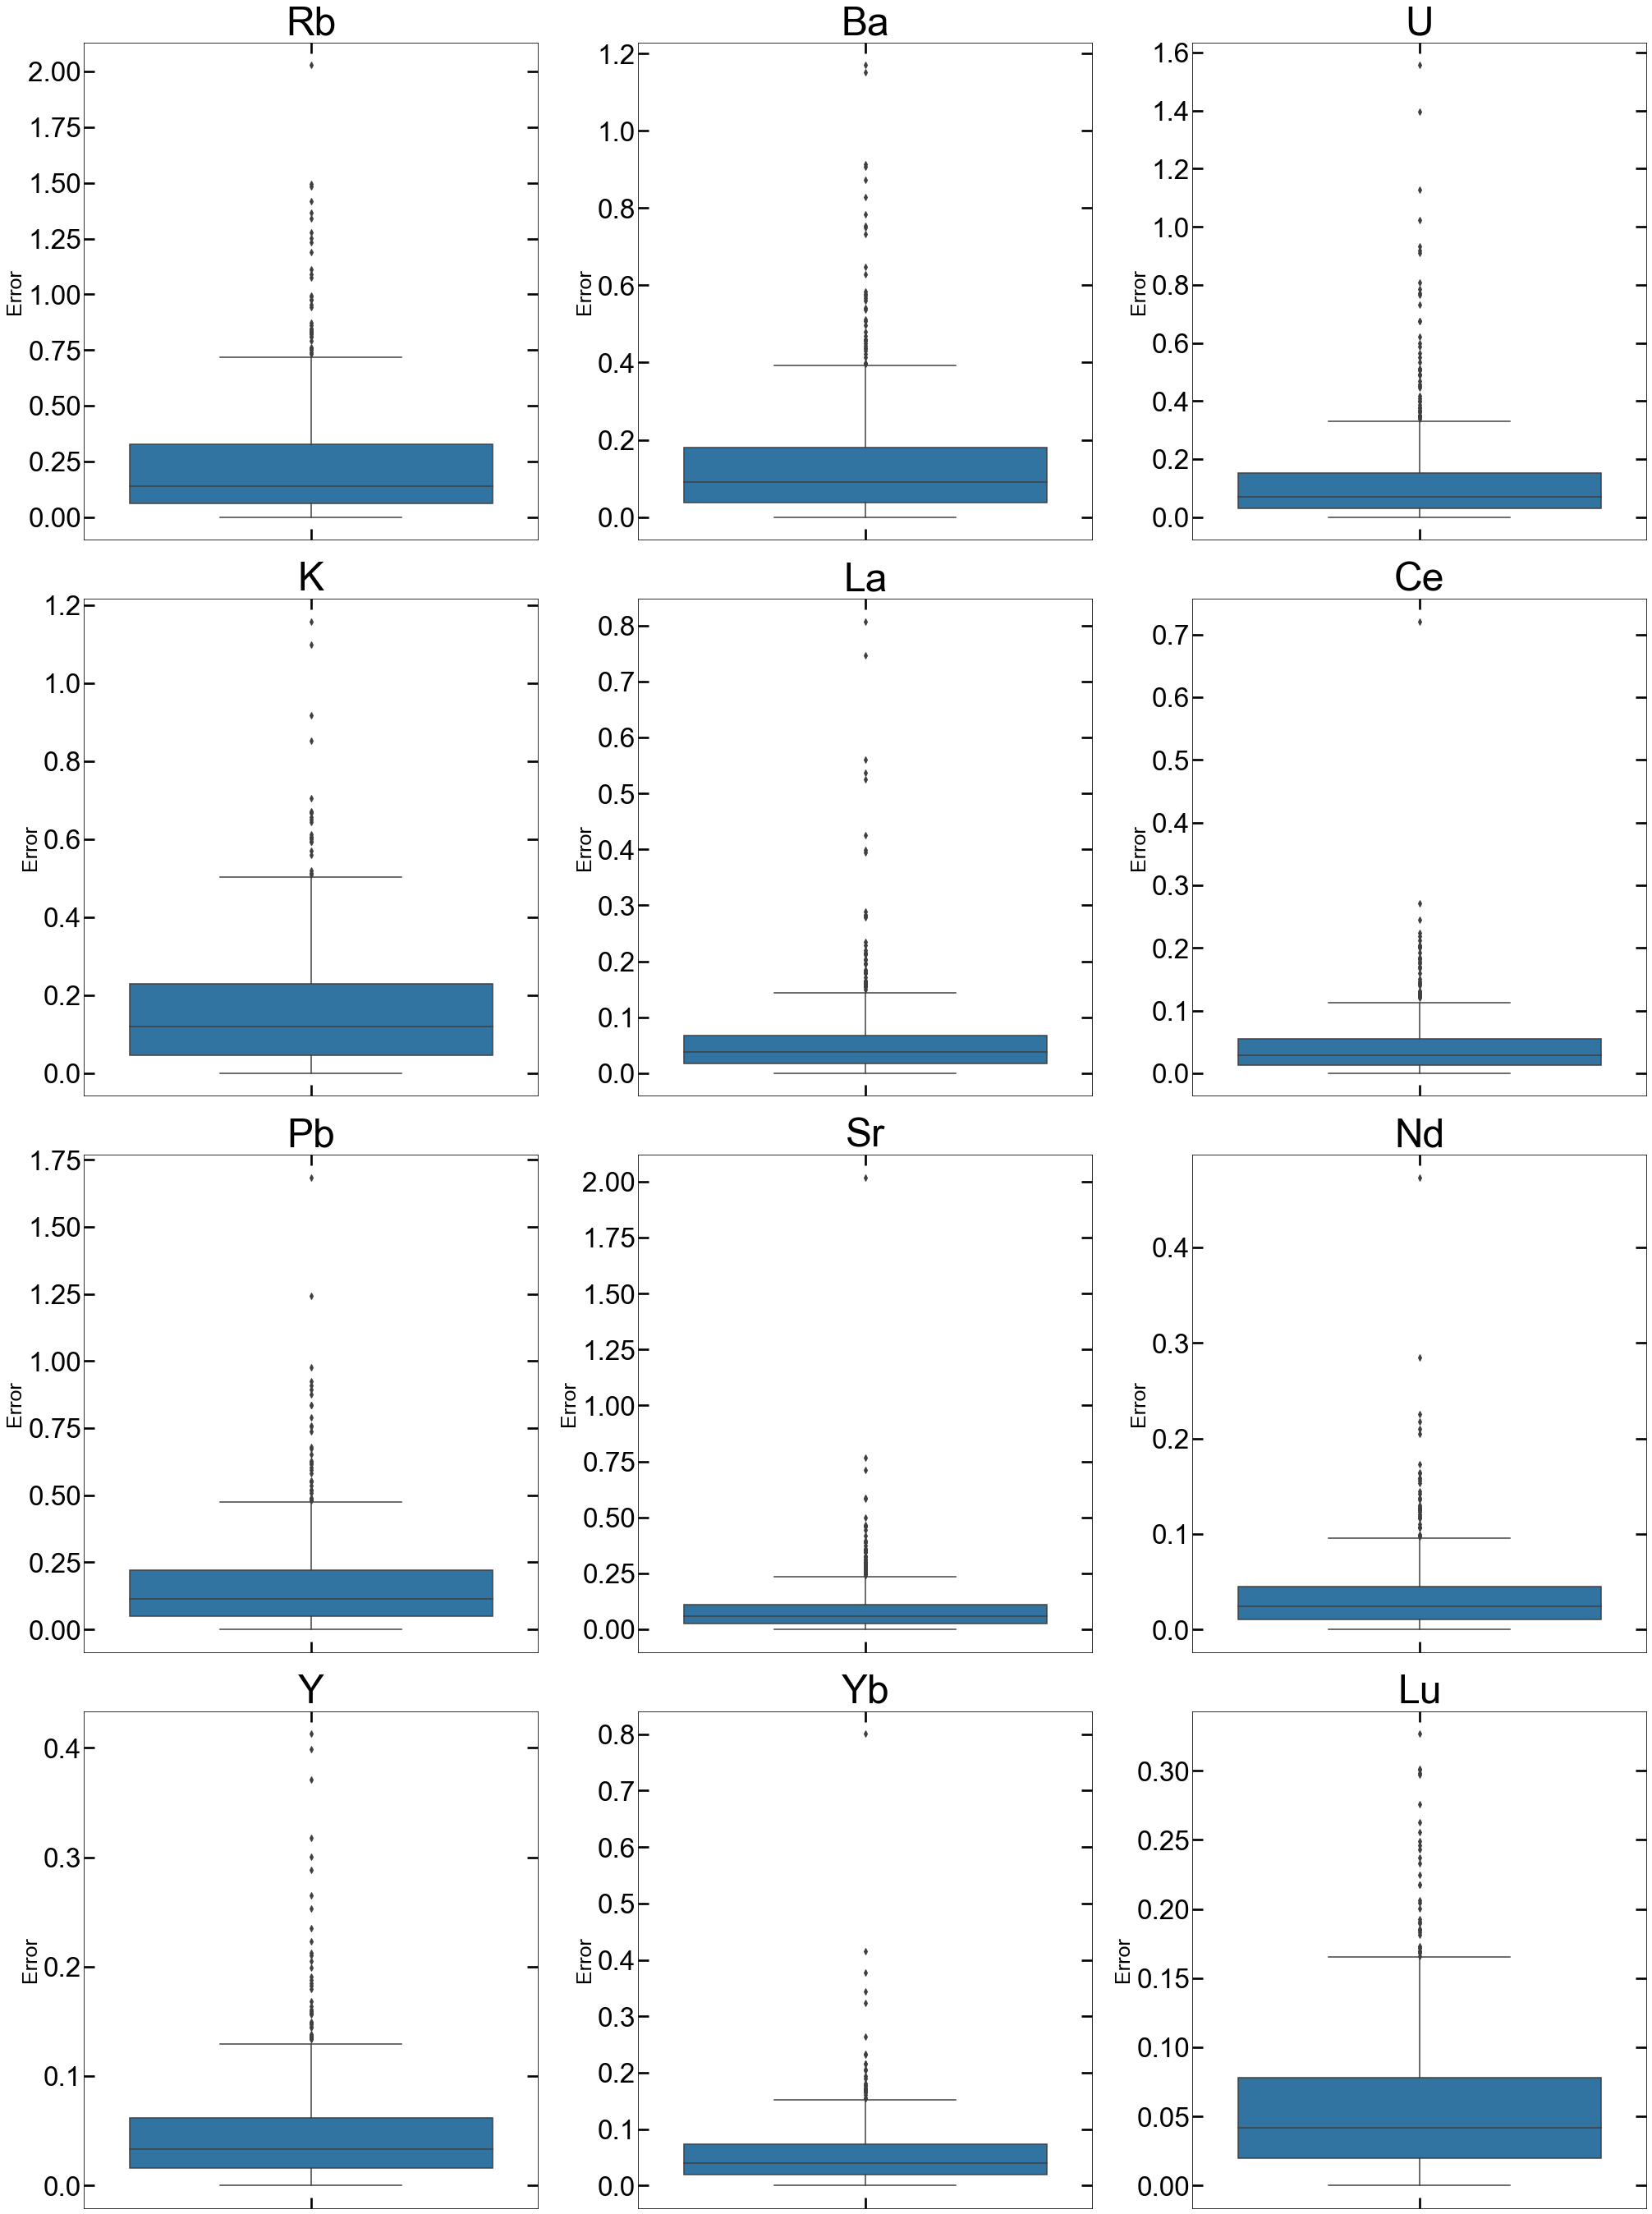

In [15]:
# figの位置
num_first = -1
num = num_first
nrows = 4
ncols = 3
len_elem = len(mobile_elem_all)
figsize_num = 9.5
figsize=(ncols*figsize_num, nrows*figsize_num)
font_size_label = 40

###################################################################################### #scatter
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
##################################figure location listの作成
loc_list = []
loc_rows = -1
for num in range(len(mobile_elem_all)):
    loc_cols = num%ncols
    if loc_cols == 0:
        loc_rows=loc_rows+1
    loc_list.append([loc_rows, loc_cols])
##################################figure location listの作成

###########移動元素ごとのスコアを求める
for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
    data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
    data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
    score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
    display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))
    
    error_compile[define_mobile_elem] = score_data['Error']
    std_compile[define_mobile_elem] = score_data['predict_Dist']
    
    score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
    score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
    score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
    score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
    ################################################################ Setting
    legend_flag = False
    if define_mobile_elem == 'Rb':
        #legend_flag = True
        legend_flag = False
    ################################################################ Setting

    ################################################################ # scatter plot
    min = np.log10(data['RAW'].min())
    max = np.log10(data['RAW'].max())
    # -5～5まで1刻みのデータを作成
    sns.boxplot(y='Error', data=data, order=TECTONIC_list, ax=ax)
    ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
    ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    #ax.set_xlabel('log10(Raw) [ppm]', fontsize=font_size_label)
    #ax.set_ylabel('log10(Predicted) [ppm]', fontsize=font_size_label)
    ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
    ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
    ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
    ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
    ax.get_xaxis().set_tick_params(pad=font_size_label/2)
plt.tight_layout()
plt.savefig(now_figure_path+'/0_Error_BOX.pdf', bbox_inches='tight')
plt.show()

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.297265      0.232119
OIB               0.161808      0.155236
VAB               0.219659      0.166294

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.151318      0.129472
OIB               0.107545      0.106420
VAB               0.168676      0.169596

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.155256      0.123435
OIB               0.076346      0.079083
VAB               0.122277      0.116150

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.175766      0.178911
OIB               0.135708      0.137253
VAB               0.172256      0.174217

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049161      0.050959
OIB               0.059386      0.054328
VAB               0.074807      0.077303

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.035177      0.034672
OIB               0.042140      0.033538
VAB               0.062006      0.052636

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.210124      0.170505
OIB               0.124668      0.130045
VAB               0.161488      0.153694

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.074820      0.076742
OIB               0.090583      0.076792
VAB               0.150915      0.120799

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.029817      0.029184
OIB               0.034113      0.033406
VAB               0.054285      0.050106

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.045011      0.043866
OIB               0.048309      0.048649
VAB               0.054108      0.049373

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049539      0.040390
OIB               0.064220      0.049891
VAB               0.060772      0.047631

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.050444      0.052577
OIB               0.068606      0.066116
VAB               0.062691      0.061994

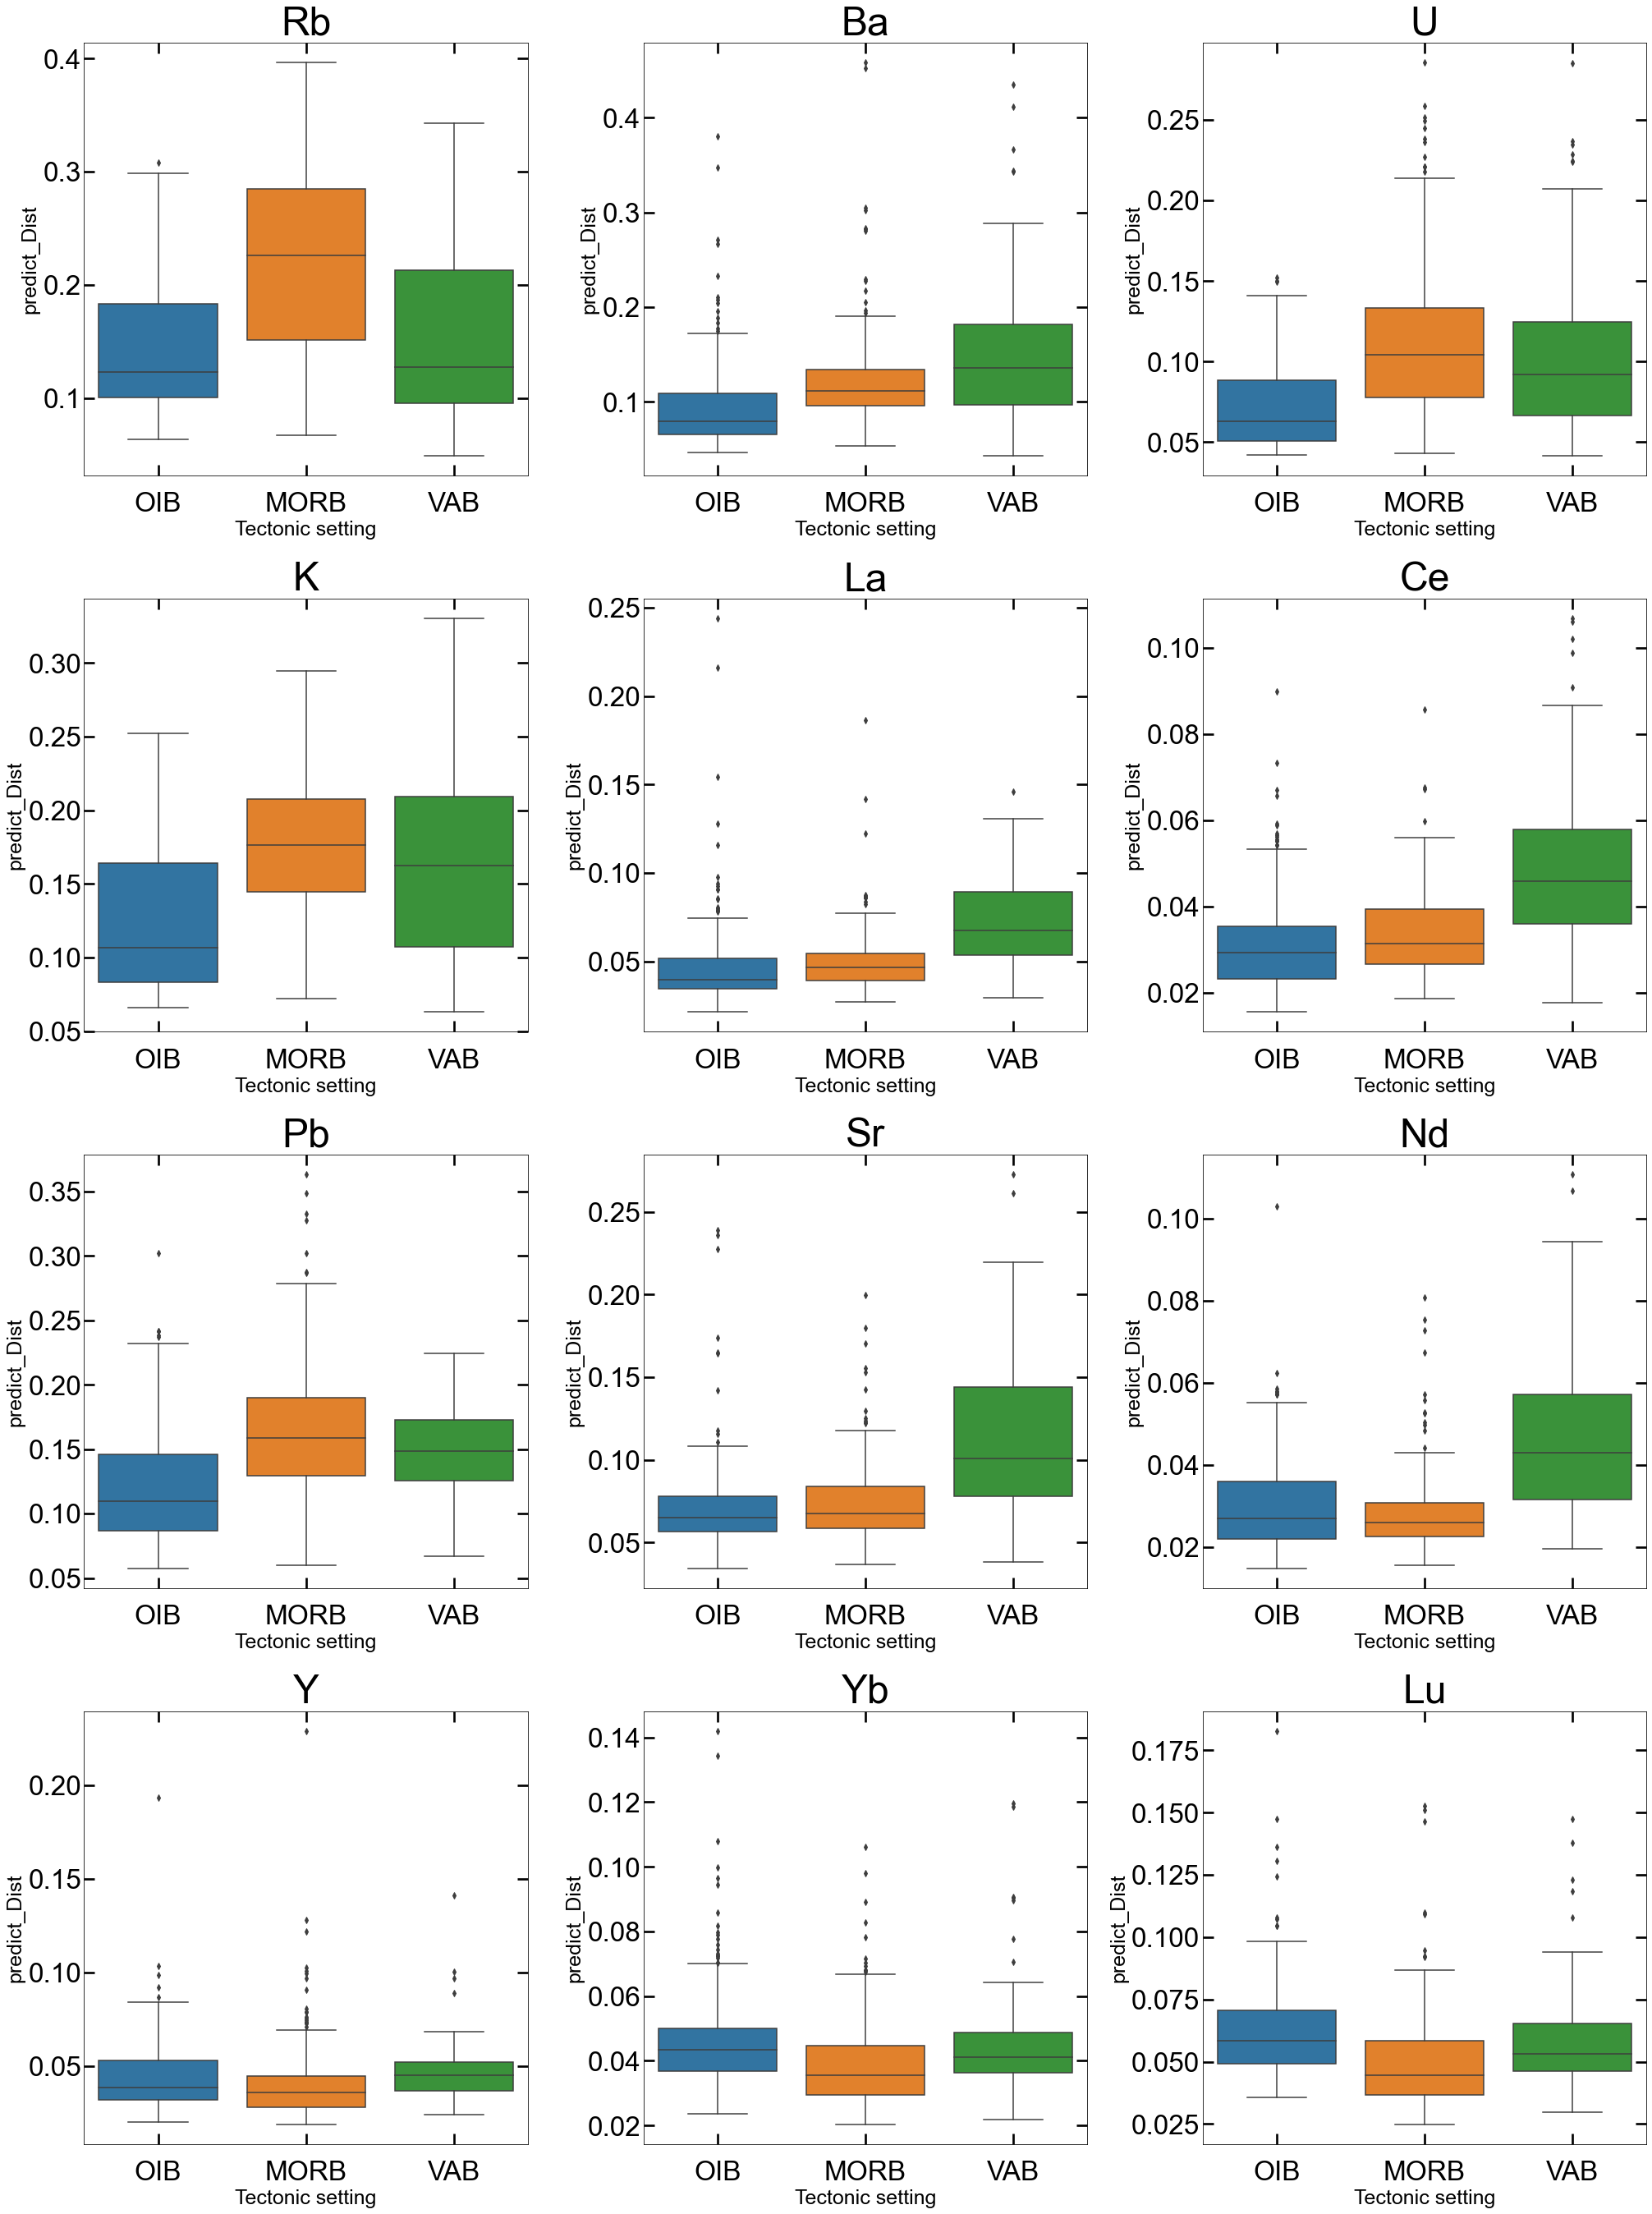

In [16]:
# figの位置
num_first = -1
num = num_first
nrows = 4
ncols = 3
len_elem = len(mobile_elem_all)
figsize_num = 9.5
figsize=(ncols*figsize_num, nrows*figsize_num)
font_size_label = 40

###################################################################################### #scatter
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
##################################figure location listの作成
loc_list = []
loc_rows = -1
for num in range(len(mobile_elem_all)):
    loc_cols = num%ncols
    if loc_cols == 0:
        loc_rows=loc_rows+1
    loc_list.append([loc_rows, loc_cols])
##################################figure location listの作成

###########移動元素ごとのスコアを求める
for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
    data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
    data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
    score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
    display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))
    
    error_compile[define_mobile_elem] = score_data['Error']
    std_compile[define_mobile_elem] = score_data['predict_Dist']
    
    score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
    score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
    score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
    score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
    ################################################################ Setting
    legend_flag = False
    if define_mobile_elem == 'Rb':
        #legend_flag = True
        legend_flag = False
    ################################################################ Setting

    ################################################################ # scatter plot
    min = np.log10(data['RAW'].min())
    max = np.log10(data['RAW'].max())
    # -5～5まで1刻みのデータを作成
    sns.boxplot(x='Tectonic setting', y='predict_Dist', data=data, order=TECTONIC_list, ax=ax)
    ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
    ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    #ax.set_xlabel('log10(Raw) [ppm]', fontsize=font_size_label)
    #ax.set_ylabel('log10(Predicted) [ppm]', fontsize=font_size_label)
    ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
    ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
    ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
    ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
    ax.get_xaxis().set_tick_params(pad=font_size_label/2)
plt.tight_layout()
plt.savefig(now_figure_path+'/0_predict_Dist_Each_BOX.pdf', bbox_inches='tight')
plt.show()

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.297265      0.232119
OIB               0.161808      0.155236
VAB               0.219659      0.166294

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.151318      0.129472
OIB               0.107545      0.106420
VAB               0.168676      0.169596

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.155256      0.123435
OIB               0.076346      0.079083
VAB               0.122277      0.116150

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.175766      0.178911
OIB               0.135708      0.137253
VAB               0.172256      0.174217

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049161      0.050959
OIB               0.059386      0.054328
VAB               0.074807      0.077303

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.035177      0.034672
OIB               0.042140      0.033538
VAB               0.062006      0.052636

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.210124      0.170505
OIB               0.124668      0.130045
VAB               0.161488      0.153694

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.074820      0.076742
OIB               0.090583      0.076792
VAB               0.150915      0.120799

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.029817      0.029184
OIB               0.034113      0.033406
VAB               0.054285      0.050106

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.045011      0.043866
OIB               0.048309      0.048649
VAB               0.054108      0.049373

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049539      0.040390
OIB               0.064220      0.049891
VAB               0.060772      0.047631

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.050444      0.052577
OIB               0.068606      0.066116
VAB               0.062691      0.061994

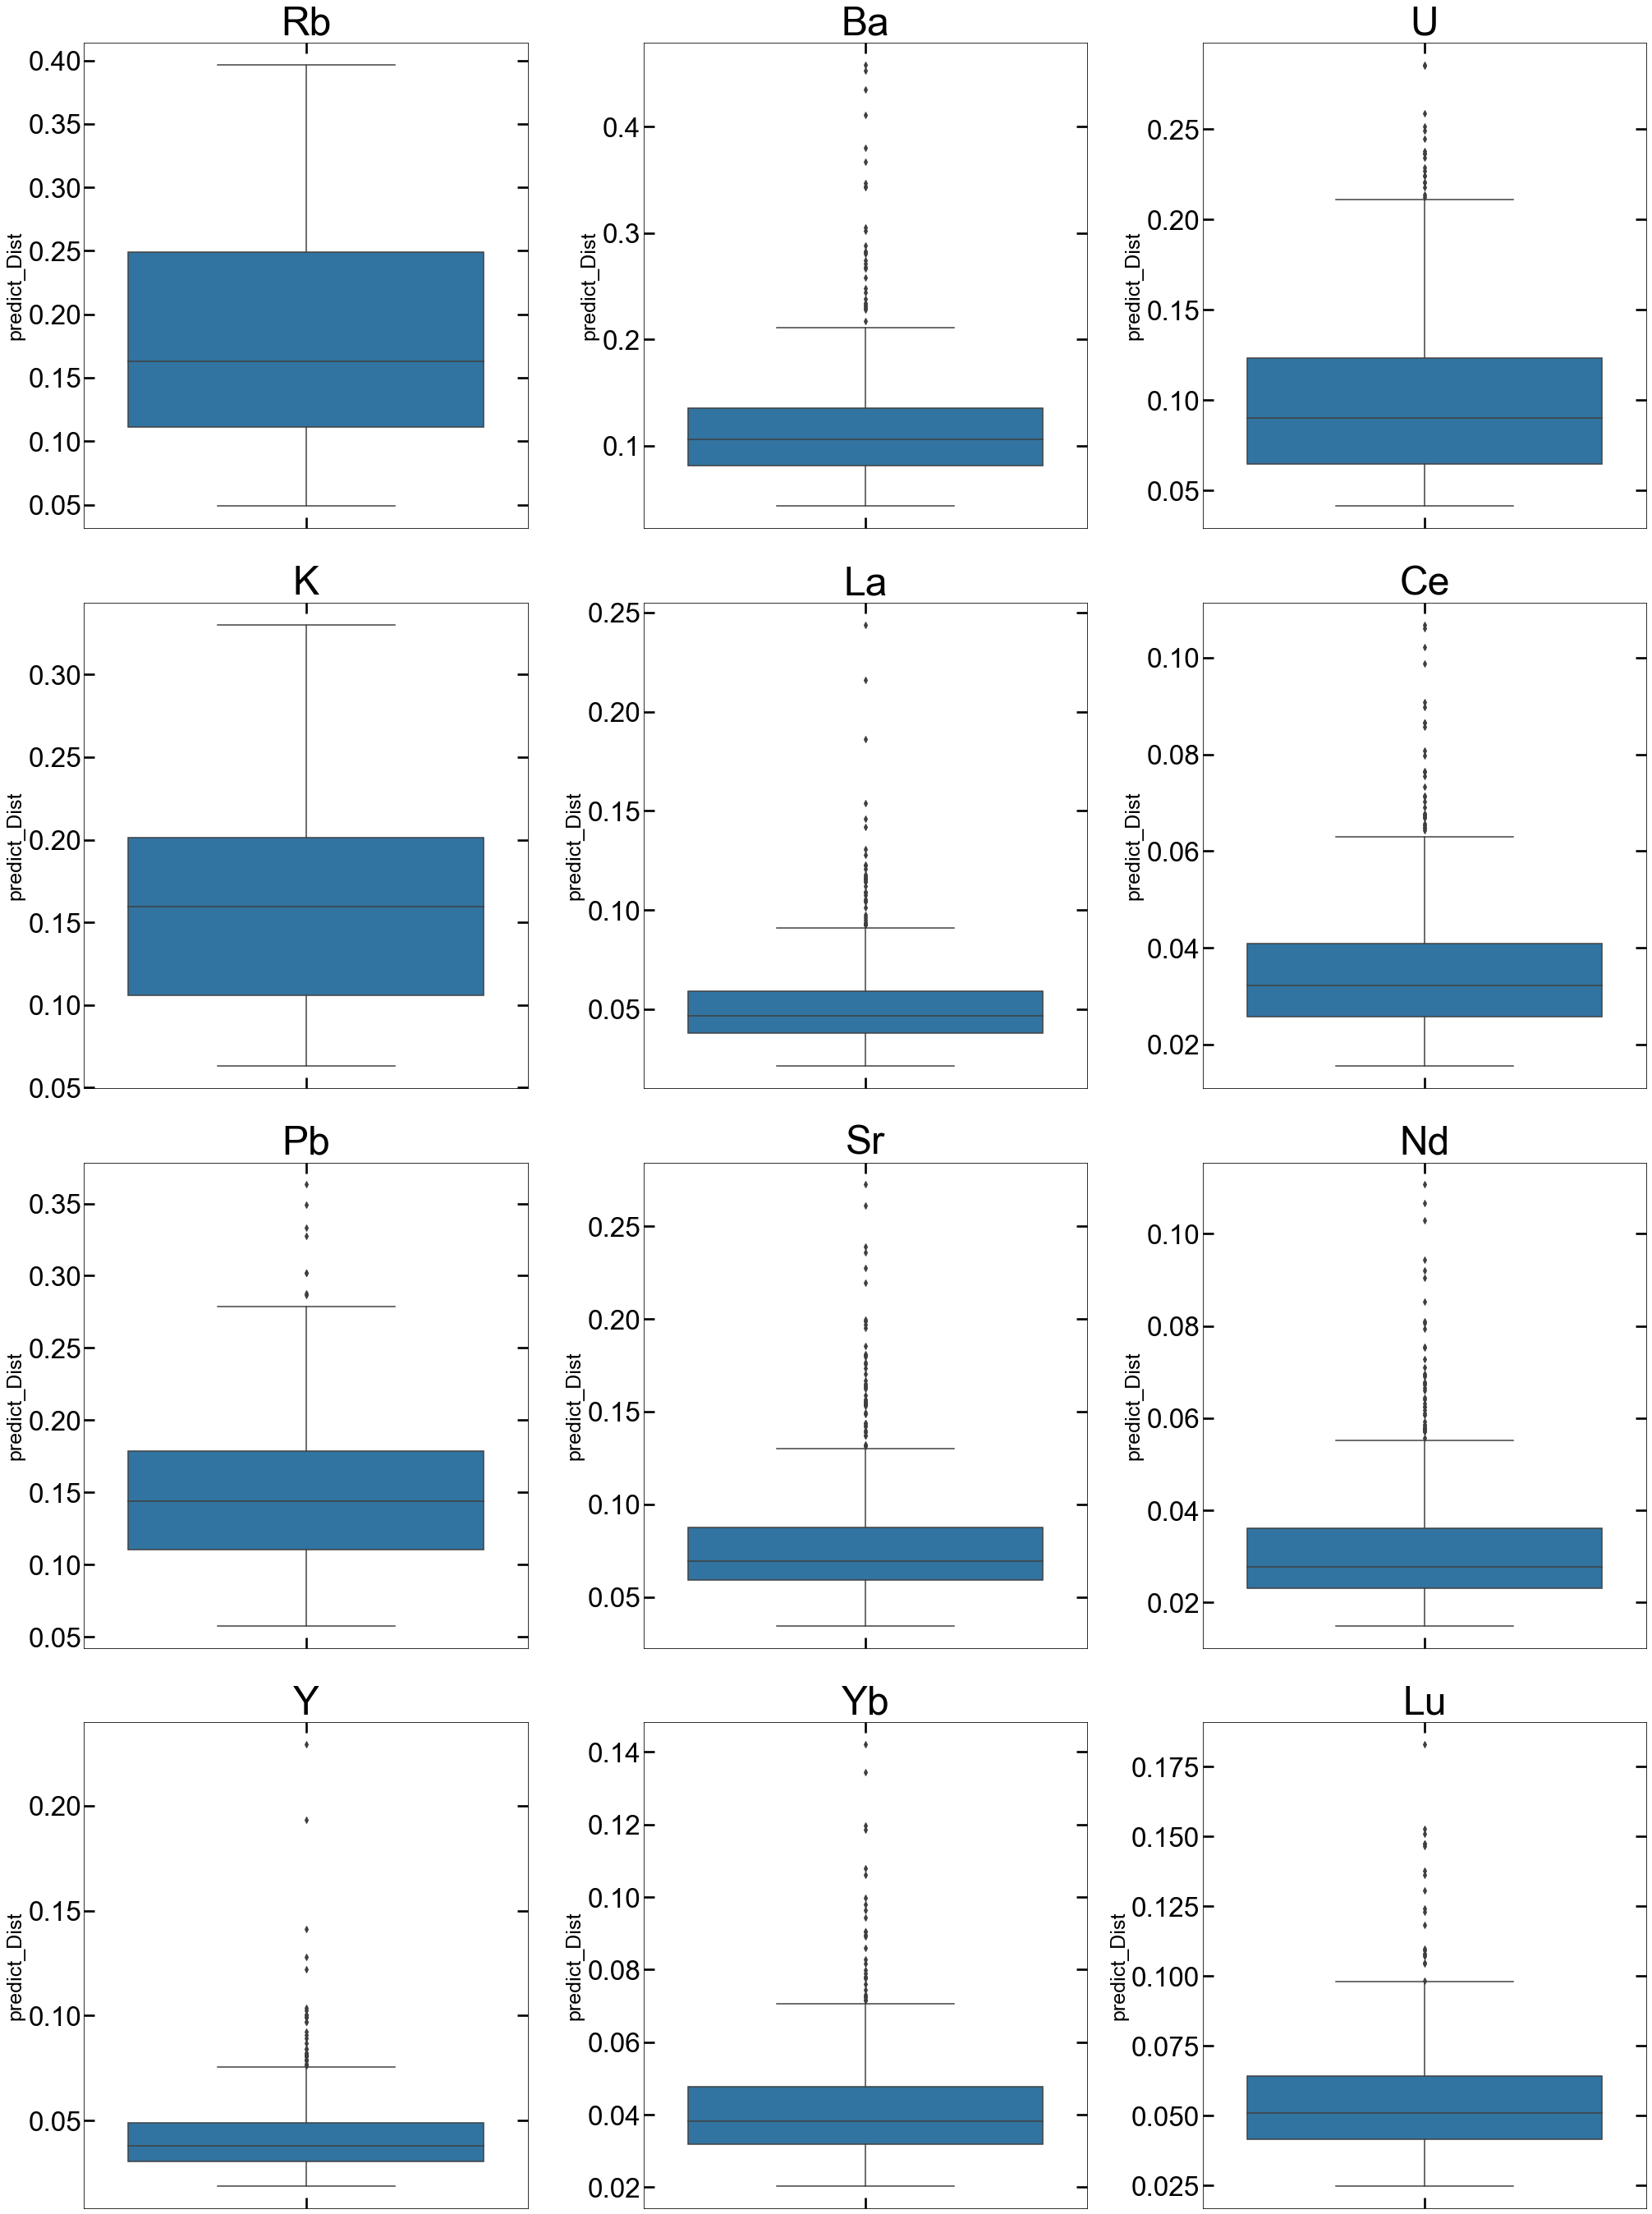

In [17]:
# figの位置
num_first = -1
num = num_first
nrows = 4
ncols = 3
len_elem = len(mobile_elem_all)
figsize_num = 9.5
figsize=(ncols*figsize_num, nrows*figsize_num)
font_size_label = 40

###################################################################################### #scatter
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
##################################figure location listの作成
loc_list = []
loc_rows = -1
for num in range(len(mobile_elem_all)):
    loc_cols = num%ncols
    if loc_cols == 0:
        loc_rows=loc_rows+1
    loc_list.append([loc_rows, loc_cols])
##################################figure location listの作成

###########移動元素ごとのスコアを求める
for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
    data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
    data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
    score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
    display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))
    
    error_compile[define_mobile_elem] = score_data['Error']
    std_compile[define_mobile_elem] = score_data['predict_Dist']
    
    score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
    score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
    score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
    score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
    ################################################################ Setting
    legend_flag = False
    if define_mobile_elem == 'Rb':
        #legend_flag = True
        legend_flag = False
    ################################################################ Setting

    ################################################################ # scatter plot
    min = np.log10(data['RAW'].min())
    max = np.log10(data['RAW'].max())
    # -5～5まで1刻みのデータを作成
    sns.boxplot(y='predict_Dist', data=data, order=TECTONIC_list, ax=ax)
    ax.set_title(define_mobile_elem, fontsize=font_size_label*1.2)
    ax.xaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    ax.yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
    #ax.set_xlabel('log10(Raw) [ppm]', fontsize=font_size_label)
    #ax.set_ylabel('log10(Predicted) [ppm]', fontsize=font_size_label)
    ax.tick_params(axis = 'x', labelsize=font_size_label/1.2)
    ax.tick_params(axis = 'y', labelsize=font_size_label/1.2)
    ax.tick_params(which = 'major', length = font_size_label/3, width = font_size_label/15)
    ax.tick_params(which = 'minor', length = font_size_label/6, width = font_size_label/30)
    ax.get_xaxis().set_tick_params(pad=font_size_label/2)
plt.tight_layout()
plt.savefig(now_figure_path+'/0_predict_Dist_BOX.pdf', bbox_inches='tight')
plt.show()

### １つずつ出力

Already exist or fail to make dirs
Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.297265      0.232119
OIB               0.161808      0.155236
VAB               0.219659      0.166294

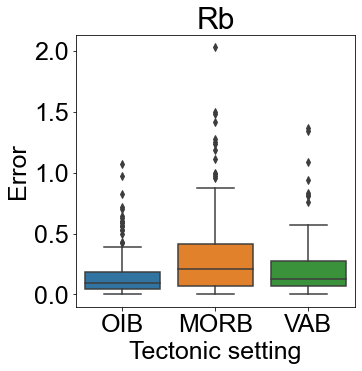

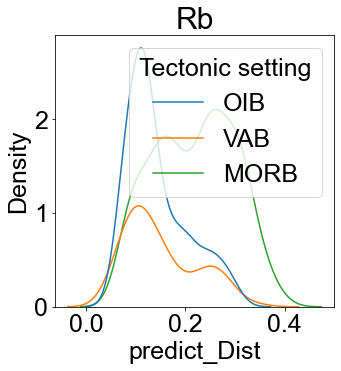

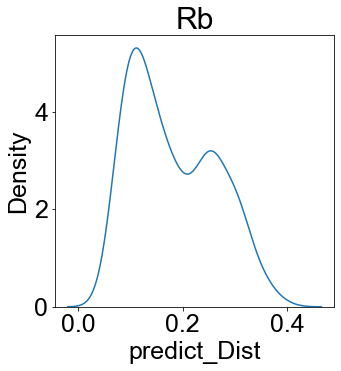

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.151318      0.129472
OIB               0.107545      0.106420
VAB               0.168676      0.169596

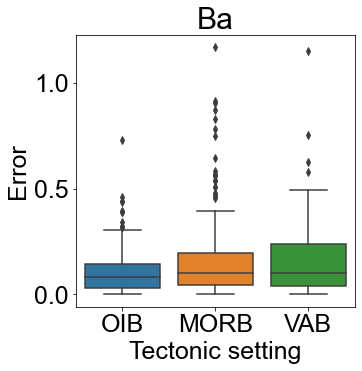

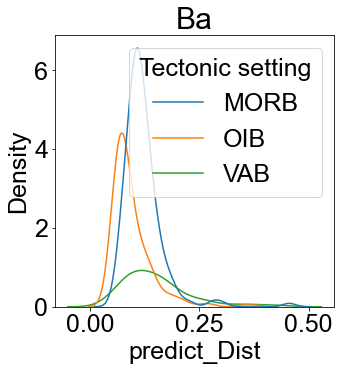

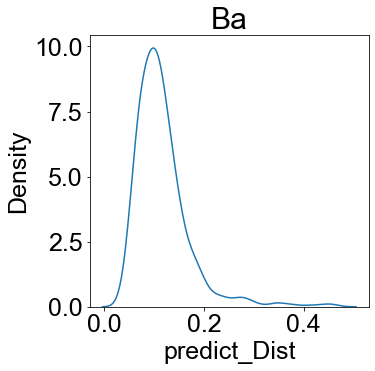

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.155256      0.123435
OIB               0.076346      0.079083
VAB               0.122277      0.116150

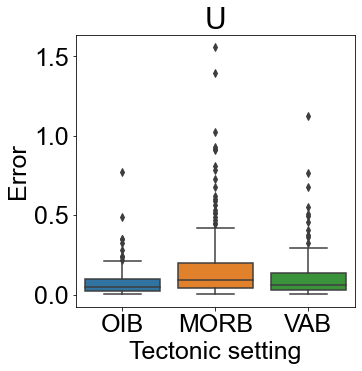

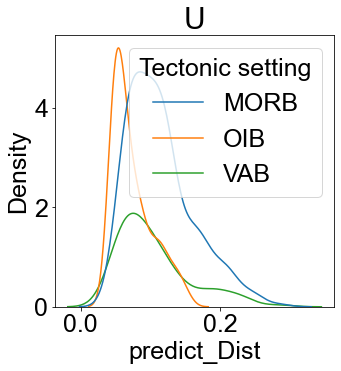

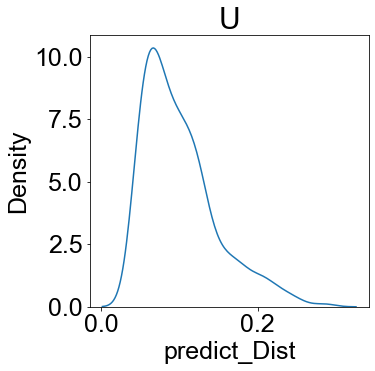

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.175766      0.178911
OIB               0.135708      0.137253
VAB               0.172256      0.174217

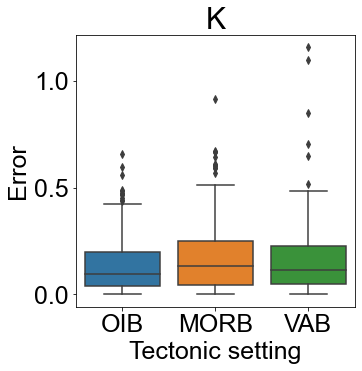

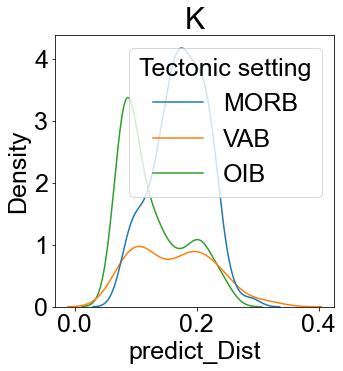

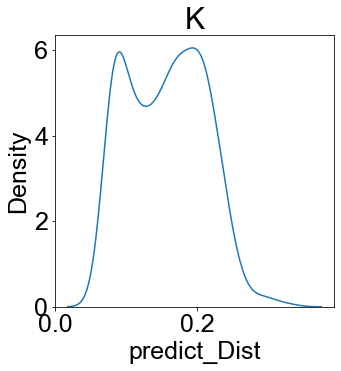

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049161      0.050959
OIB               0.059386      0.054328
VAB               0.074807      0.077303

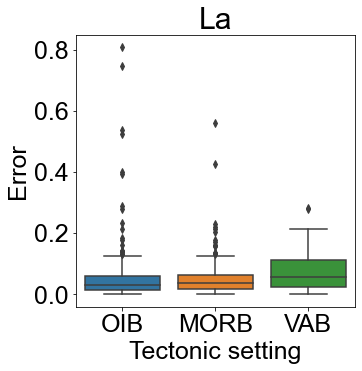

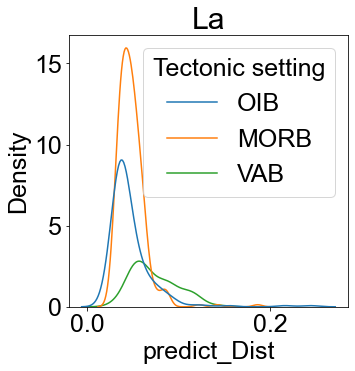

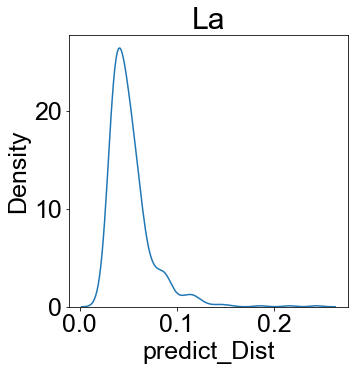

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.035177      0.034672
OIB               0.042140      0.033538
VAB               0.062006      0.052636

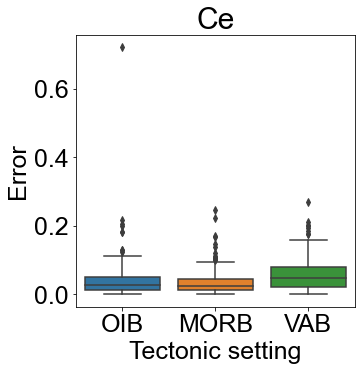

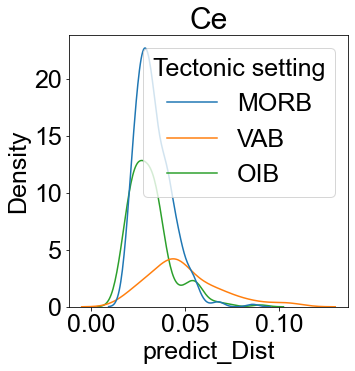

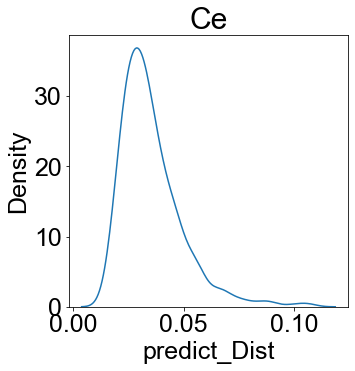

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.210124      0.170505
OIB               0.124668      0.130045
VAB               0.161488      0.153694

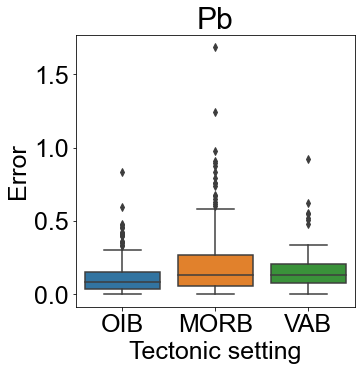

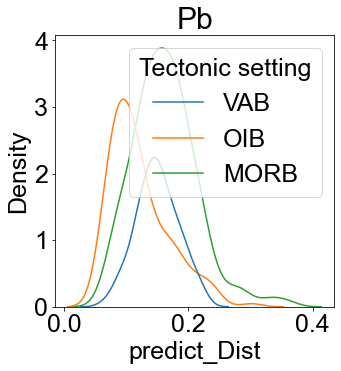

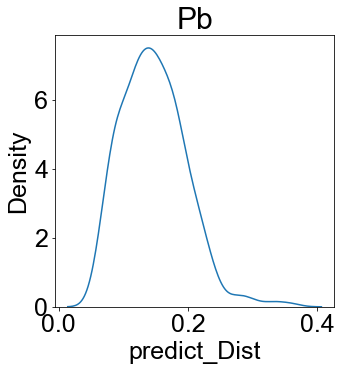

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.074820      0.076742
OIB               0.090583      0.076792
VAB               0.150915      0.120799

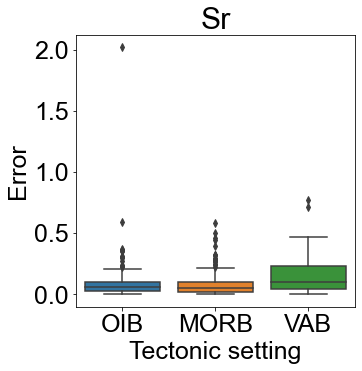

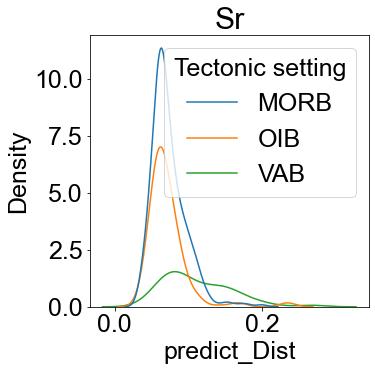

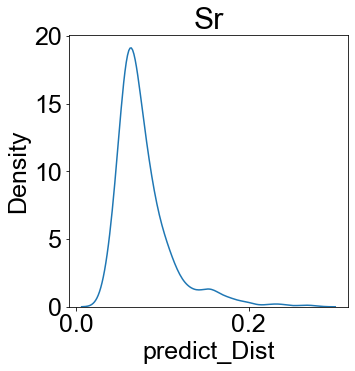

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.029817      0.029184
OIB               0.034113      0.033406
VAB               0.054285      0.050106

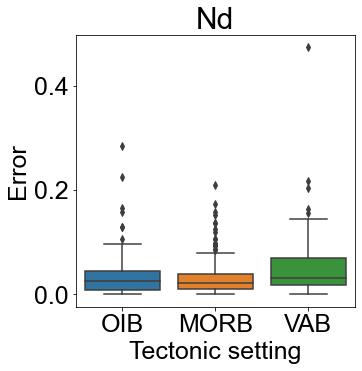

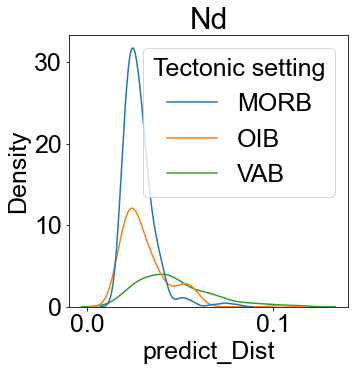

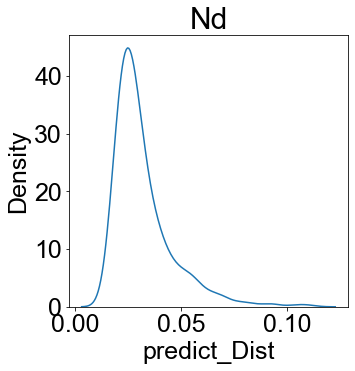

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.045011      0.043866
OIB               0.048309      0.048649
VAB               0.054108      0.049373

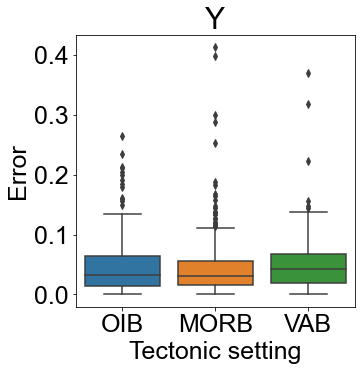

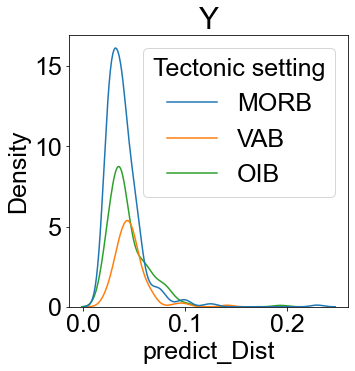

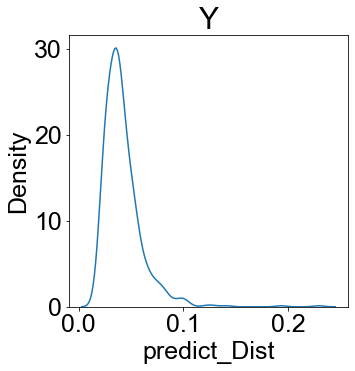

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.049539      0.040390
OIB               0.064220      0.049891
VAB               0.060772      0.047631

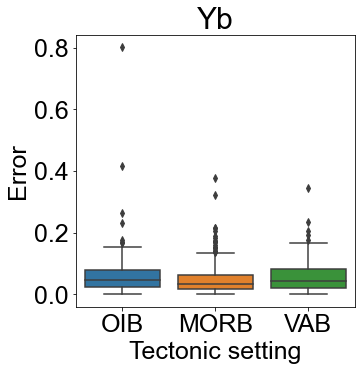

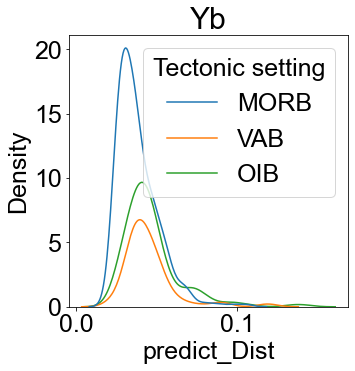

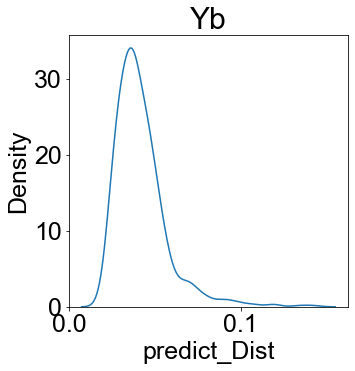

Already exist or fail to make dirs


Error  predict_Dist
Tectonic setting                        
MORB              0.050444      0.052577
OIB               0.068606      0.066116
VAB               0.062691      0.061994

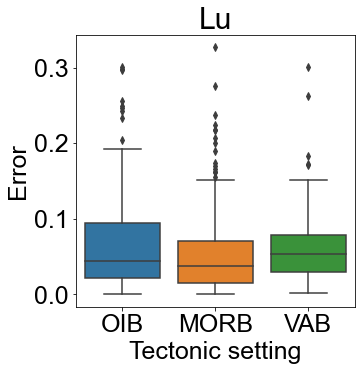

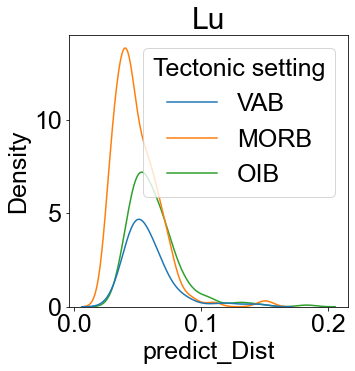

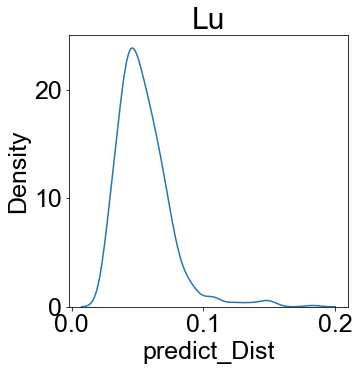

In [18]:
error_compile = pd.DataFrame()
std_compile = pd.DataFrame()
score_compile = pd.DataFrame(columns=mobile_elem_all, index=['Error','Error_median', 'predict_Dist', 'predict_Dist_median'])
ERR_fig_path = now_figure_path+'/Error_STD/'
make_dirs(ERR_fig_path)

for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) 
    data[[define_mobile_elem, 'predict', 'RAW']] = data[[define_mobile_elem, 'predict', 'RAW']]* for_normalize_data[define_mobile_elem]## mobile elemでPM→ppmに戻す
    data['Error'] = np.sqrt((data['predict'].apply(lambda x:np.log10(x)) - data['RAW'].apply(lambda x:np.log10(x)) )**2) 
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)
    score_data = data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean})
    display(data.groupby('Tectonic setting').agg({'Error': score_mean, 'predict_Dist': std_mean}))
    
    error_compile[define_mobile_elem] = score_data['Error']
    std_compile[define_mobile_elem] = score_data['predict_Dist']
    
    score_compile[define_mobile_elem].loc['Error'] = score_mean(data['Error'])
    score_compile[define_mobile_elem].loc['Error_median'] = data['Error'].median()
    score_compile[define_mobile_elem].loc['predict_Dist']  = std_mean(data['predict_Dist'])
    score_compile[define_mobile_elem].loc['predict_Dist_median']  = data['predict_Dist'].median()
    
    ##########
    plt.figure(figsize=(5, 5))
    plt.title(define_mobile_elem)
    sns.boxplot(x='Tectonic setting', y='Error', data=data, order=TECTONIC_list)
    plt.savefig(ERR_fig_path+define_mobile_elem+'_ERROR.pdf', bbox_inches='tight')
    plt.show()
    plt.figure(figsize=(5, 5))
    plt.title(define_mobile_elem)
    sns.kdeplot( x='predict_Dist', hue='Tectonic setting', data=data)
    plt.savefig(ERR_fig_path+define_mobile_elem+'_KDE_STD.pdf', bbox_inches='tight')
    plt.show()
    plt.figure(figsize=(5, 5))
    plt.title(define_mobile_elem)
    sns.kdeplot( x='predict_Dist', data=data)
    plt.savefig(ERR_fig_path+define_mobile_elem+'_KDE_STD_Single.pdf', bbox_inches='tight')
    plt.show()

### Compile

In [19]:
error_compile.to_excel(now_figure_path+"/error_compile.xlsx")
error_compile

Rb        Ba         U         K        La        Ce  \
Tectonic setting                                                               
MORB              0.297265  0.151318  0.155256  0.175766  0.049161  0.035177   
OIB               0.161808  0.107545  0.076346  0.135708  0.059386  0.042140   
VAB               0.219659  0.168676  0.122277  0.172256  0.074807  0.062006   

                        Pb        Sr        Nd         Y        Yb        Lu  
Tectonic setting                                                              
MORB              0.210124  0.074820  0.029817  0.045011  0.049539  0.050444  
OIB               0.124668  0.090583  0.034113  0.048309  0.064220  0.068606  
VAB               0.161488  0.150915  0.054285  0.054108  0.060772  0.062691

In [20]:
std_compile.to_excel(now_figure_path+"/pred_dist_compile.xlsx")
std_compile

Rb        Ba         U         K        La        Ce  \
Tectonic setting                                                               
MORB              0.232119  0.129472  0.123435  0.178911  0.050959  0.034672   
OIB               0.155236  0.106420  0.079083  0.137253  0.054328  0.033538   
VAB               0.166294  0.169596  0.116150  0.174217  0.077303  0.052636   

                        Pb        Sr        Nd         Y        Yb        Lu  
Tectonic setting                                                              
MORB              0.170505  0.076742  0.029184  0.043866  0.040390  0.052577  
OIB               0.130045  0.076792  0.033406  0.048649  0.049891  0.066116  
VAB               0.153694  0.120799  0.050106  0.049373  0.047631  0.061994

In [21]:
score_compile.to_excel(now_figure_path+"/score_compile.xlsx")
score_compile

Rb        Ba         U         K        La  \
Error                0.240189  0.139315  0.126392  0.162287   0.05679   
Error_median         0.140013  0.089899  0.070382  0.118783  0.038142   
predict_Dist         0.199424  0.129591   0.11112   0.16579  0.057221   
predict_Dist_median   0.16291  0.105845  0.090413  0.159766  0.046706   

                           Ce        Pb        Sr        Nd         Y  \
Error                0.042248  0.173996  0.092753  0.035459  0.047553   
Error_median          0.02861  0.114807  0.059457  0.024418  0.033037   
predict_Dist         0.038185  0.155622  0.085769  0.035018  0.046341   
predict_Dist_median  0.032278  0.144001  0.069279  0.027686  0.038052   

                           Yb        Lu  
Error                0.055986  0.058057  
Error_median         0.040385  0.042007  
predict_Dist         0.044772  0.058627  
predict_Dist_median  0.038313  0.051108

## Error correlation check with LOI and CIA

In [22]:
Whole_rock = pd.read_excel("../Data/Preprocessing/PetDB/Primitive_not_applied.xlsx", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '../Data/Preprocessing/PetDB/Primitive_not_applied.xlsx'

In [ ]:
mobile_elem_all = ['Rb', 'Ba', 'U', 'K', 'La', 'Ce', 'Pb', 'Sr', 'Nd', 'Y', 'Yb', 'Lu']#, 'SiO2', 'Al2O3', 'MgO', 'Na2O', 'P2O5', 'CaO', 'MnO', 'FeO', 'K2O'] 

###########移動元素ごとのスコアを求める
for define_mobile_elem in mobile_elem_all:
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0)
    data['Error'] = data['predict'] / data['RAW']
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)

    list_col = ['CIA', 'LOI', "100*K2O/(K2O+Na2O)", "K2O+Na2O"]
    data[list_col] = Whole_rock.loc[data.index][list_col]

    make_dirs(now_figure_path+'/Filtering_explain',)

    print(define_mobile_elem)
    print(data.shape)
    print(data[data['CIA']>52.5].shape)
    data.plot.scatter(x='CIA', y='Error')
    plt.title(define_mobile_elem)
    plt.hlines(1,data['CIA'].min(),data['CIA'].max(),color="green")
    plt.vlines(52.5,10**-2,10**2,color="green")
    plt.yscale('log')
    plt.savefig(now_figure_path+'/Filtering_explain/'+ define_mobile_elem + '_CIA.pdf' , bbox_inches='tight')
    plt.show()

    print(data.shape)
    print(data[data['LOI']>2.5].shape)
    data.plot.scatter(x='LOI', y='Error')
    plt.title(define_mobile_elem)
    plt.hlines(1,data['LOI'].min(),data['LOI'].max(),color="green")
    plt.vlines(2.5,10**-2,10**2,color="green")
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig(now_figure_path+'/Filtering_explain/'+ define_mobile_elem + '_LOI.pdf' , bbox_inches='tight')
    plt.show()

    data['Error_log'] = data['Error'].apply(lambda x: np.log10(x))
    sns.relplot(data=data, x="100*K2O/(K2O+Na2O)", y="K2O+Na2O", hue='Error_log', hue_order='Error_log', aspect=1.61, )
    plt.title(define_mobile_elem)
    plt.plot([0, 15, 20, 30, 38], [2.5, 4, 5, 8.5, 13.5], color='yellow')
    plt.plot([0, 20, 80, 85], [0.8, 2, 6.5, 13.5], color='yellow')
    plt.ylim(0, 15)
    plt.savefig(now_figure_path+'/Filtering_explain/'+ define_mobile_elem + '_Huges_diagram.pdf' , bbox_inches='tight')
    plt.show()

In [ ]:
data['Error']

In [ ]:
data['Error'][data['Error']>5]

In [ ]:
plt.rcParams["font.size"] = 21
plt.rcParams['font.family'] = 'Arial'

In [ ]:
mobile_elem_all = ['K']#, 'SiO2', 'Al2O3', 'MgO', 'Na2O', 'P2O5', 'CaO', 'MnO', 'FeO', 'K2O'] 

###########移動元素ごとのスコアを求める
for define_mobile_elem in mobile_elem_all:
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    print(now_path)
    print(define_mobile_elem)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0)
    data['Error'] = data['predict'] / data['RAW']
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)

num = 0.5

for index_name in data[data['Error'].apply(lambda x:np.log10(x))>num].index:
    print(np.log10(data['Error'][index_name]))
    Spidergram_simple(pd.DataFrame(Raw_metamorphic_rock_applied.loc[index_name]).T, "log", "off","#ec6f9b", "-", "off")
    plt.ylim(0.1, 1000)
    plt.show()

for index_name in data[data['Error'].apply(lambda x:np.log10(x))<-num].index:
    print(np.log10(data['Error'][index_name]))
    Spidergram_simple(pd.DataFrame(Raw_metamorphic_rock_applied.loc[index_name]).T, "log", "off","#ec6f9b", "-", "off")
    plt.ylim(0.1, 1000)
    plt.show()

In [ ]:
###########移動元素ごとのスコアを求める
for loc_num, define_mobile_elem in enumerate(mobile_elem_all):
    # ax
    ax=axes[loc_list[loc_num][0]][loc_list[loc_num][1]]
    now_path = path+define_mobile_elem
    now_figure_path = path+'/5.model_explain'
    make_dirs(now_figure_path)
    print(now_path)
    print(define_mobile_elem)
    data = pd.read_excel(now_path+'/test_data_all.xlsx', index_col=0) * for_normalize_data[define_mobile_elem] ## mobile elemでPM→ppmに戻す
    data['Error'] = data['predict'] / data['RAW']
    data['SAMPLE_INFO'] = Raw_Protolith_location.loc[data.index]['SAMPLE_INFO']
    data['Tectonic setting'] = data['SAMPLE_INFO'].replace(TECTONIC_replace)